In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load file into dataframe
data = pd.read_csv("final_crypto_data_scaled.csv", index_col=0)
data = data.rename(columns={'Date':'date'})
data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.180101 -0.269505   -0.235414    Algorand   
1  2019-06-22 -0.179815 -0.240548   -0.234446    Algorand   
2  2019-06-23 -0.180000 -0.227594   -0.234680    Algorand   
3  2019-06-24 -0.180048 -0.235517   -0.234777    Algorand   
4  2019-06-25 -0.180137 -0.244048   -0.234885    Algorand   

   name_price_attention     return  crypto_dummy  log_attention  log_return  
0             -0.364255  -0.045227             0       0.405465    0.000000  
1             -0.511961  11.153287             0       0.000000    4.581523  
2             -0.376071  -3.707394             0       0.322083    0.000000  
3             -0.511961  -1.423728             0       0.000000    0.000000  
4             -0.511961  -3.004727             0       0.000000    0.000000

In [3]:
# summary statistics
data.describe()

Price        Volume    Market_cap  name_price_attention  \
count  50427.000000  50427.000000  50427.000000          50427.000000   
mean       0.006753      0.006665      0.001447              0.018498   
std        1.018506      1.011442      1.003094              1.013322   
min       -0.180395     -0.269613     -0.235414             -0.511961   
25%       -0.180375     -0.262695     -0.229976             -0.511961   
50%       -0.180003     -0.238067     -0.205587             -0.393796   
75%       -0.175722     -0.143415     -0.151431              0.072956   
max       12.195147     28.772585     12.003043              9.335121   

             return  crypto_dummy  log_attention    log_return  
count  50427.000000  50427.000000   50427.000000  50427.000000  
mean      -0.001837     12.225633       0.876769      0.393754  
std        0.994486      7.103828       1.224623      1.013377  
min      -10.474799      0.000000      -3.912023     -6.907755  
25%       -0.333724      6.000000       0.000000      0.000000  
50%       -0.045227     12.000000       0.182322      0.000000  
75%        0.243900     18.000000       1.781709      0.924854  
max       65.707619     25.000000       4.605170      6.351645

In [4]:
#adding the dummy variable for covid. 

split_date = '2020-01-01'
data['Post-covid'] = (data['date'] >= split_date).astype(int)
#data['Post-covid'] = (df_lag.index >= split_date).astype(int)

data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.180101 -0.269505   -0.235414    Algorand   
1  2019-06-22 -0.179815 -0.240548   -0.234446    Algorand   
2  2019-06-23 -0.180000 -0.227594   -0.234680    Algorand   
3  2019-06-24 -0.180048 -0.235517   -0.234777    Algorand   
4  2019-06-25 -0.180137 -0.244048   -0.234885    Algorand   

   name_price_attention     return  crypto_dummy  log_attention  log_return  \
0             -0.364255  -0.045227             0       0.405465    0.000000   
1             -0.511961  11.153287             0       0.000000    4.581523   
2             -0.376071  -3.707394             0       0.322083    0.000000   
3             -0.511961  -1.423728             0       0.000000    0.000000   
4             -0.511961  -3.004727             0       0.000000    0.000000   

   Post-covid  
0           0  
1           0  
2           0  
3           0  
4           0

# Correlation

In [5]:
data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.180101 -0.269505   -0.235414    Algorand   
1  2019-06-22 -0.179815 -0.240548   -0.234446    Algorand   
2  2019-06-23 -0.180000 -0.227594   -0.234680    Algorand   
3  2019-06-24 -0.180048 -0.235517   -0.234777    Algorand   
4  2019-06-25 -0.180137 -0.244048   -0.234885    Algorand   

   name_price_attention     return  crypto_dummy  log_attention  log_return  \
0             -0.364255  -0.045227             0       0.405465    0.000000   
1             -0.511961  11.153287             0       0.000000    4.581523   
2             -0.376071  -3.707394             0       0.322083    0.000000   
3             -0.511961  -1.423728             0       0.000000    0.000000   
4             -0.511961  -3.004727             0       0.000000    0.000000   

   Post-covid  
0           0  
1           0  
2           0  
3           0  
4           0

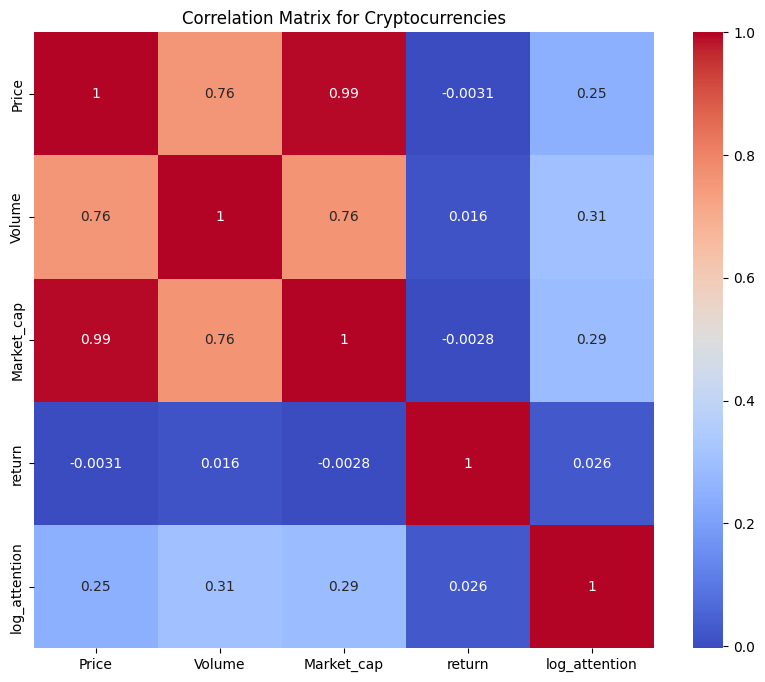

In [6]:
# Correlation Analysis
#setting numerical variables:
numerical = ['Price', 'Volume', 'Market_cap', 'return', 'log_attention']
correlation_matrix = data[numerical].corr()

#plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Cryptocurrencies')
plt.show()

In [7]:
#Checking the correlation between 
correlation_value = data['return'].corr(data['log_attention'])

print(f"Correlation between return and attention: {correlation_value}")


Correlation between return and attention: 0.026057157113469998


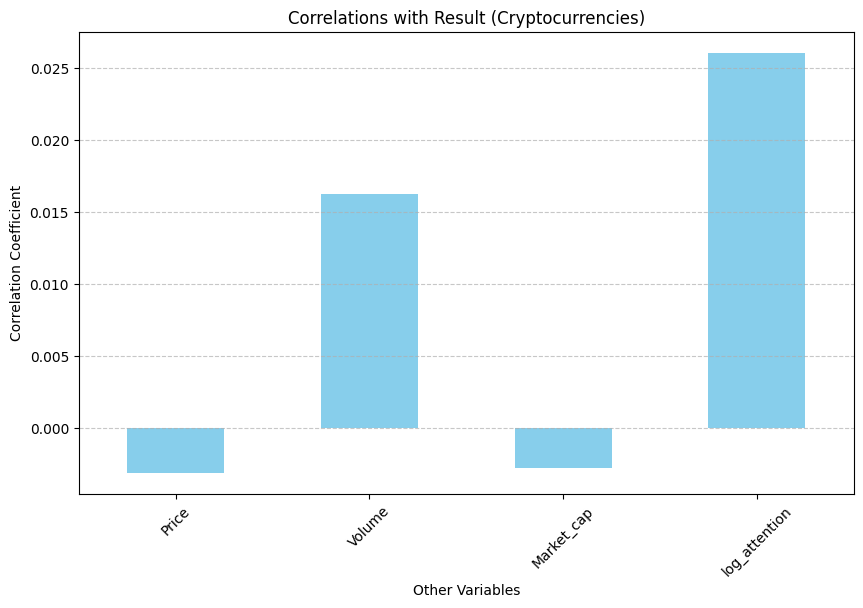

In [8]:
correlations = data[numerical].corr()['return'].drop(['return'])

# Plot bar graph
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations with Result (Cryptocurrencies)')
plt.xlabel('Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Visualizations

1. Time series of price and attention proxies
    * Time series for each stock 
    * Time series pre and post covid
    * Time series per industry
    * Quarterly and Monthly look
2. Distributions of dependend and independent variables 
3. Scatter plots with the Relationships 
4. Boxplots for unscaled and scaled data

### 1. Time Series Analysis

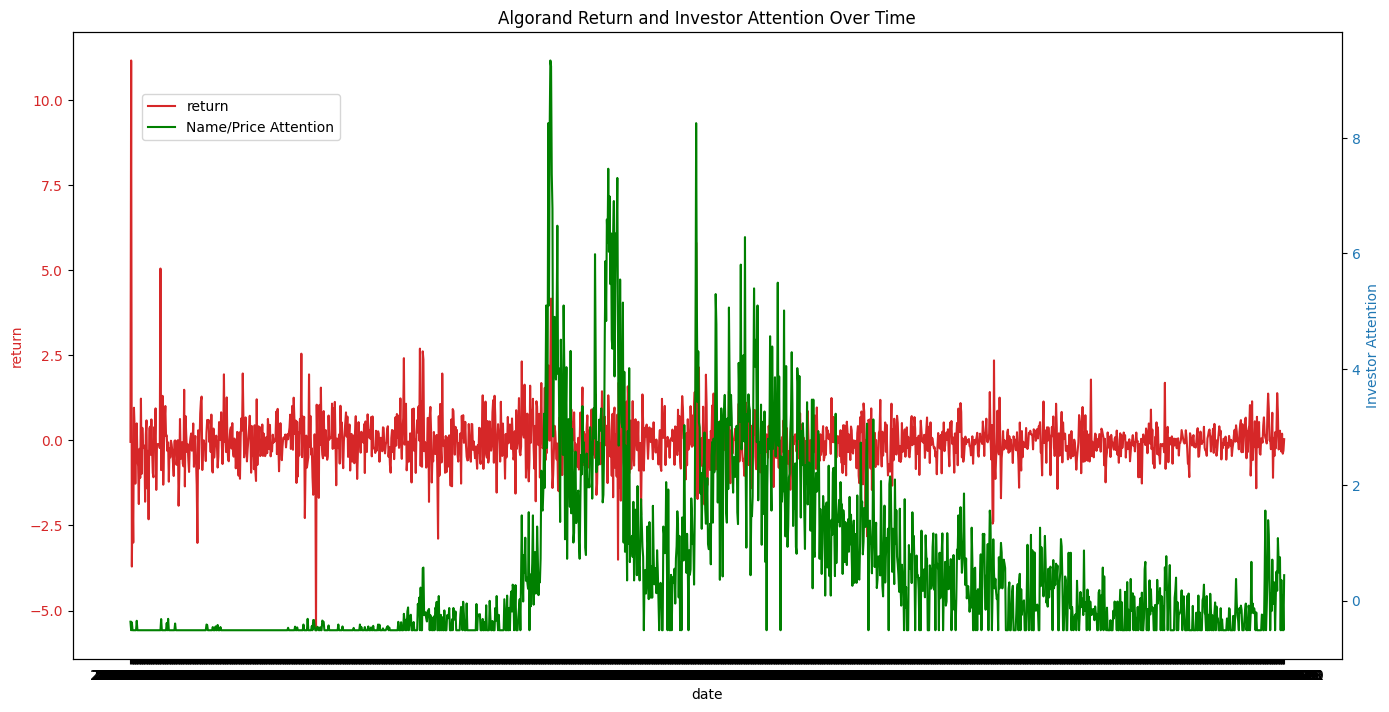

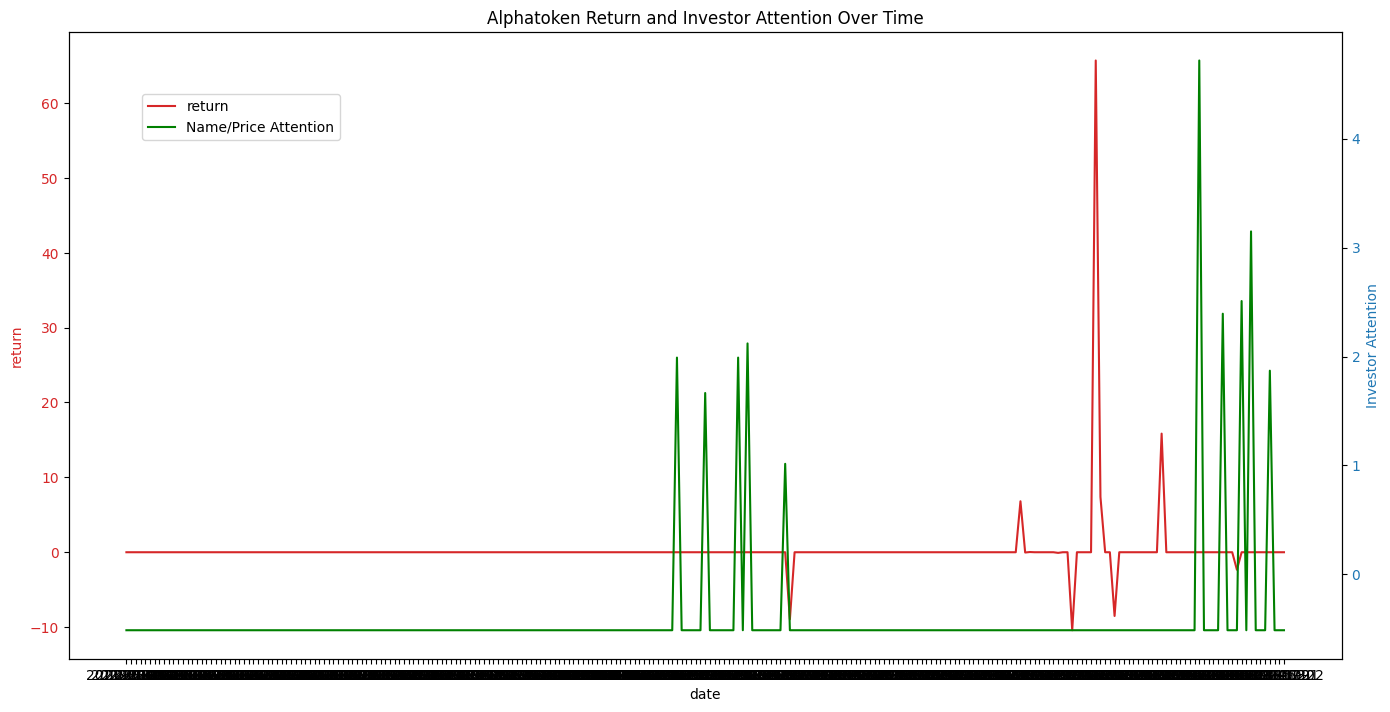

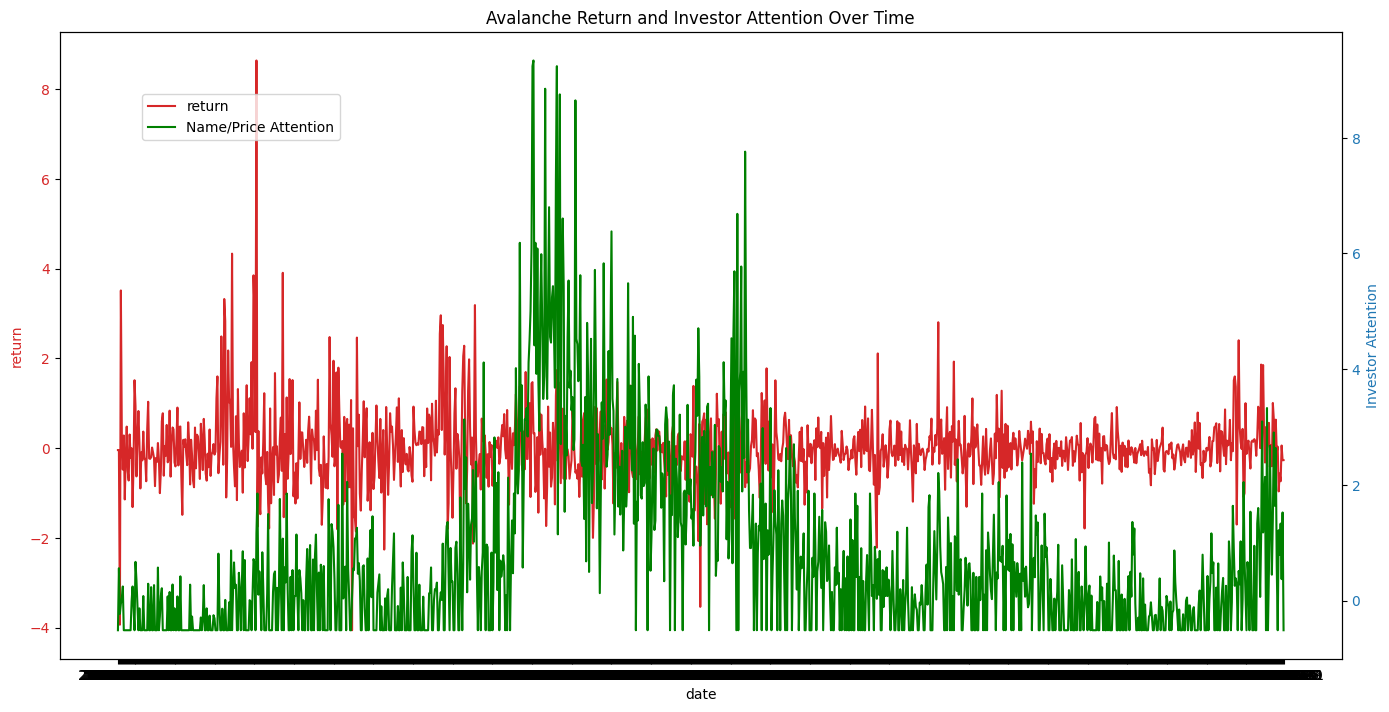

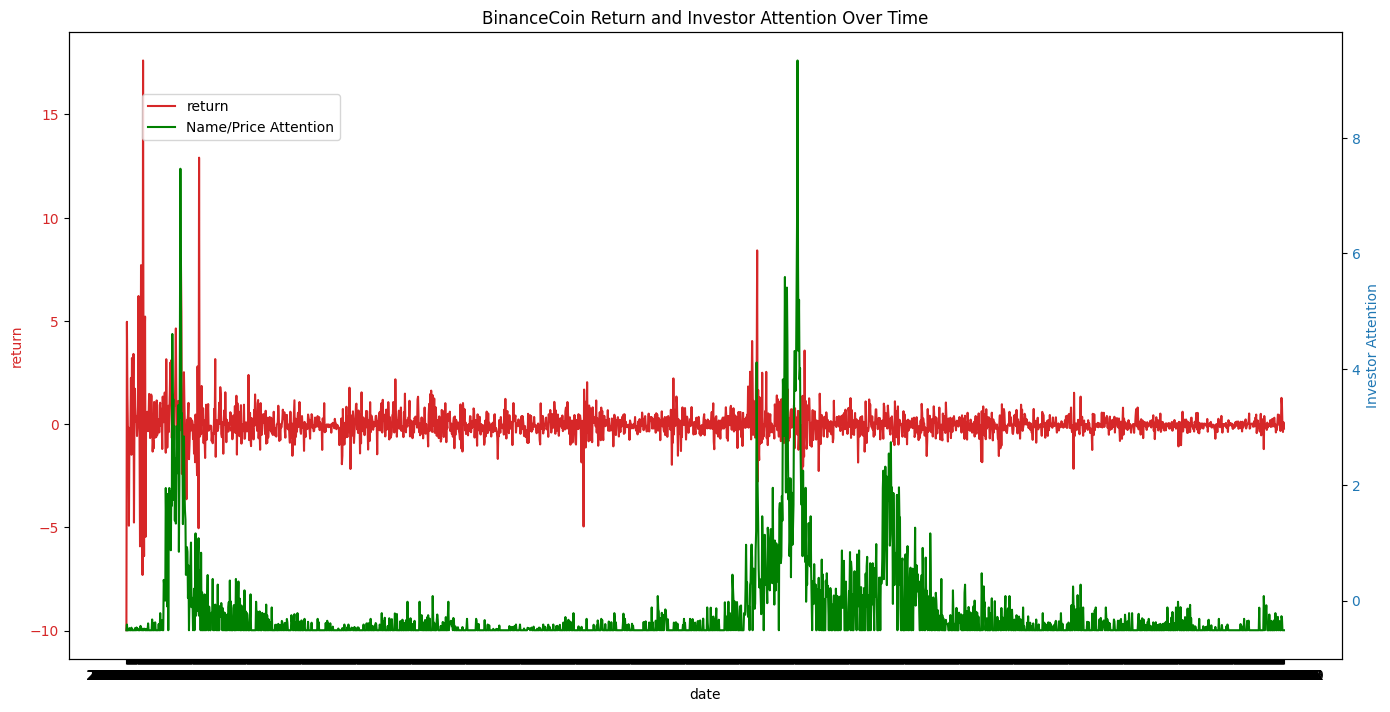

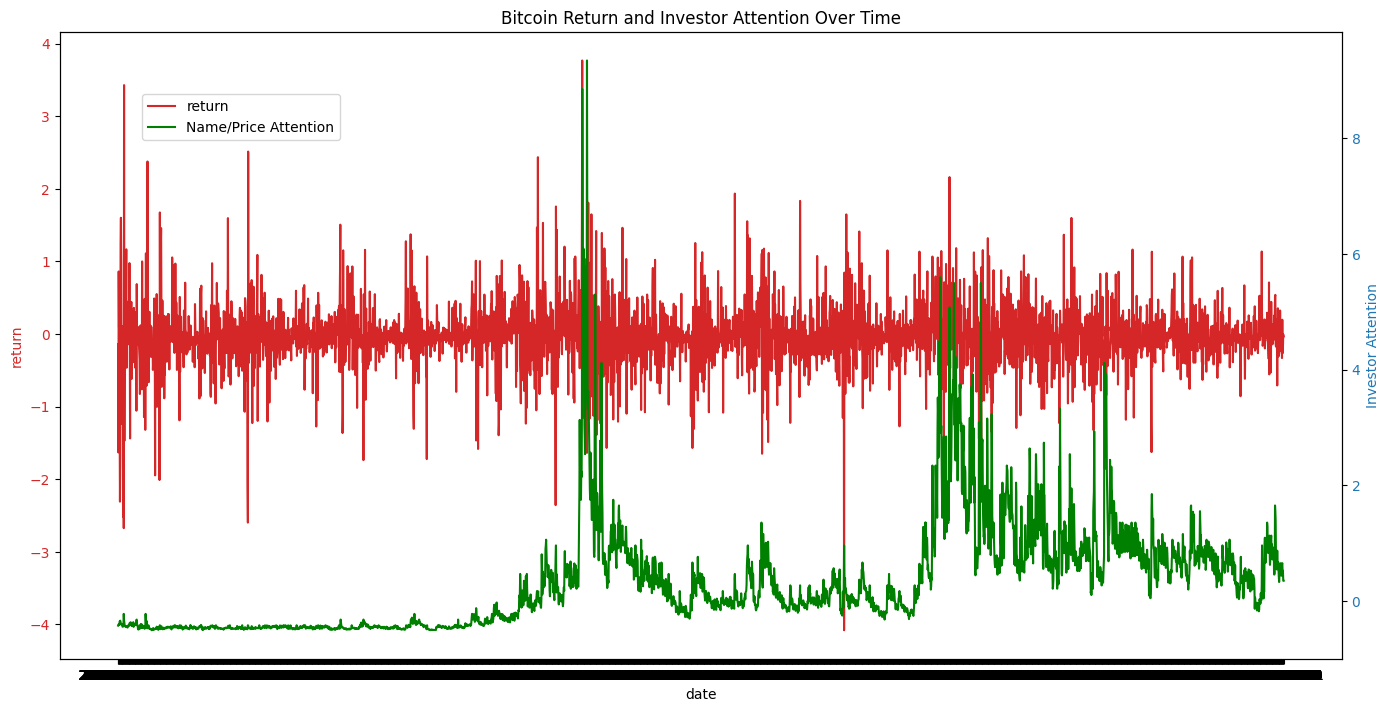

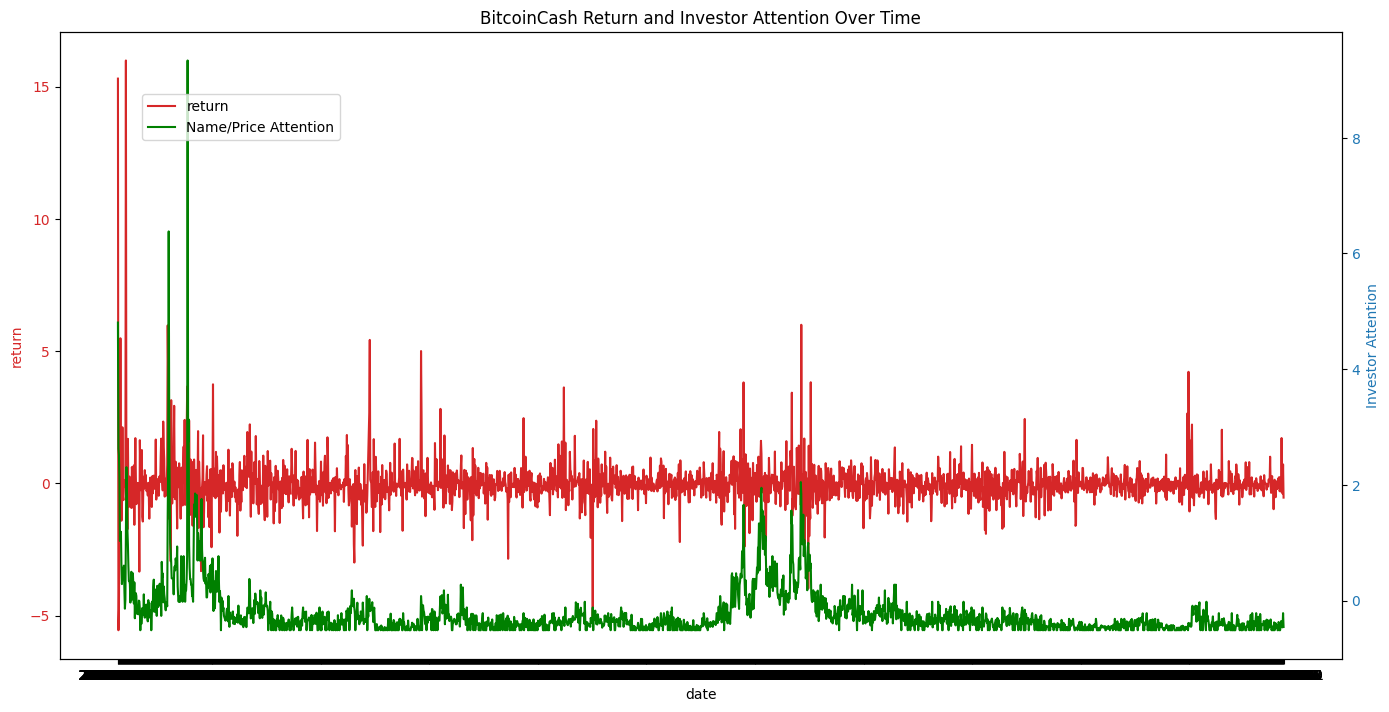

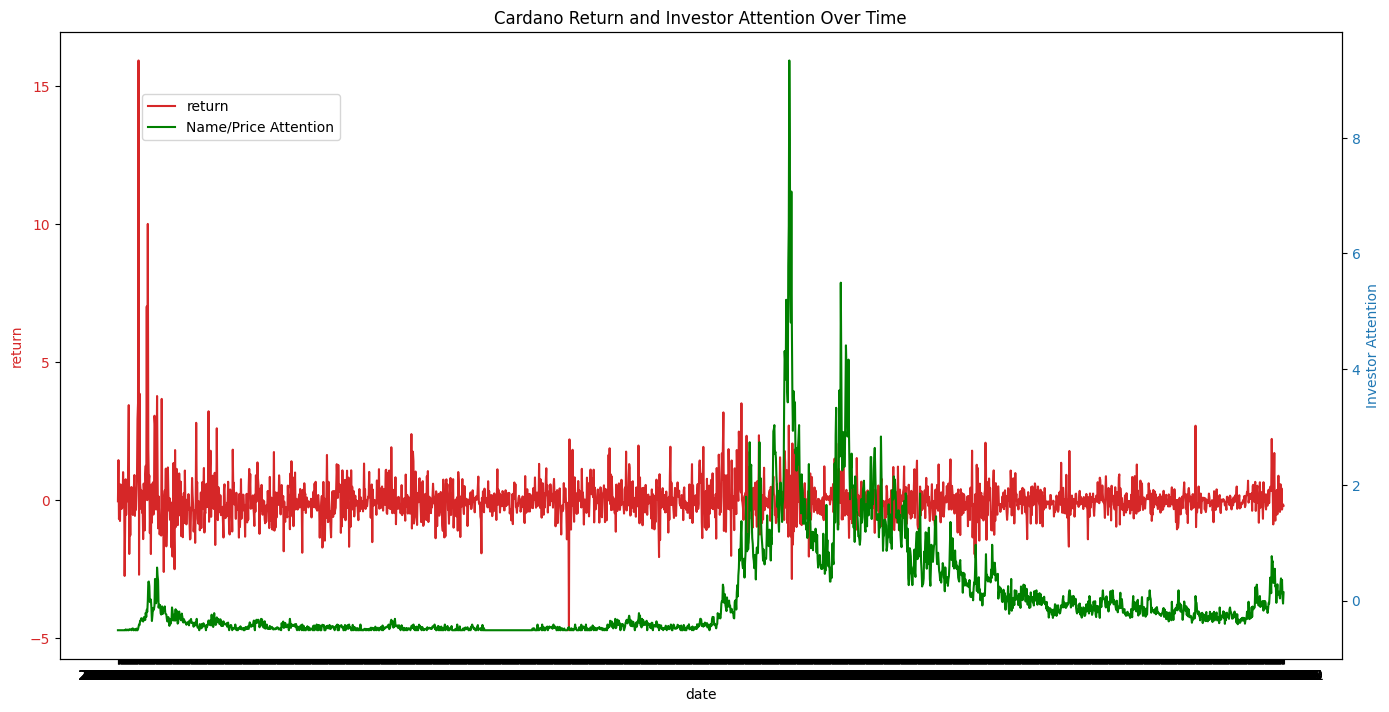

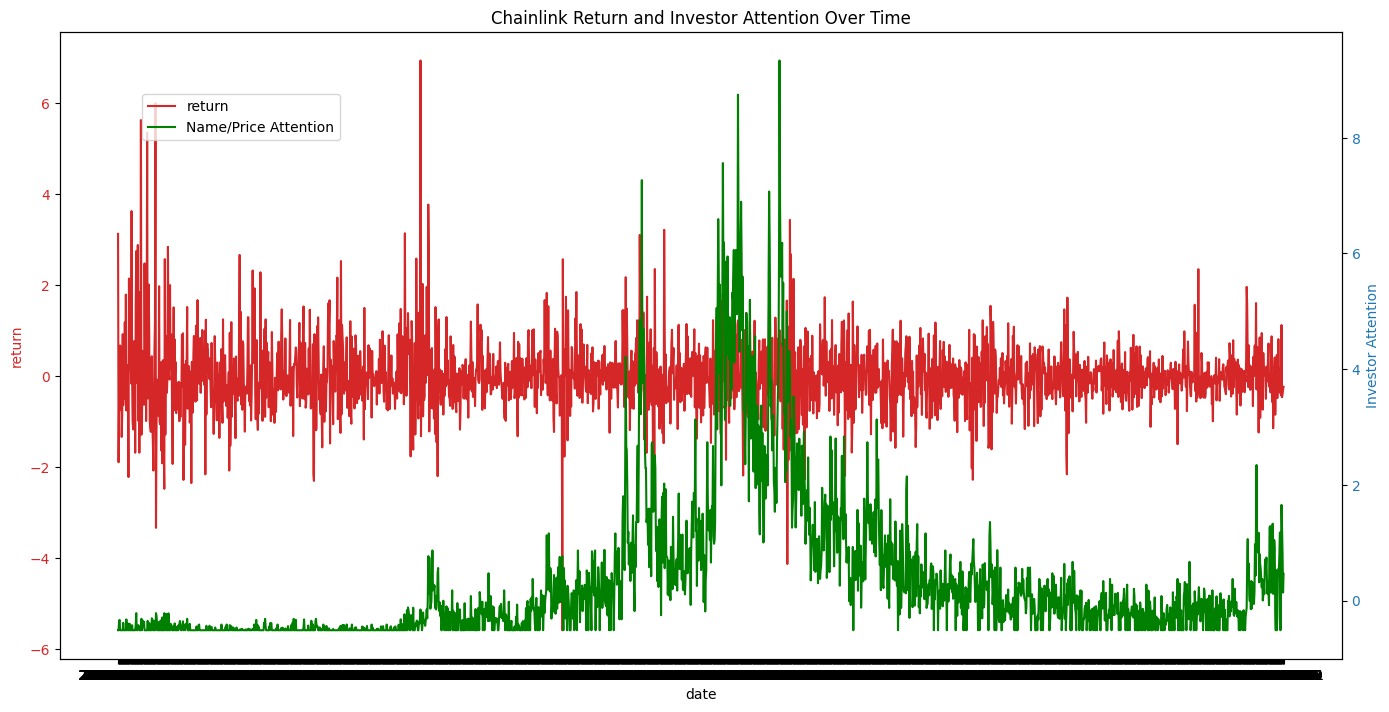

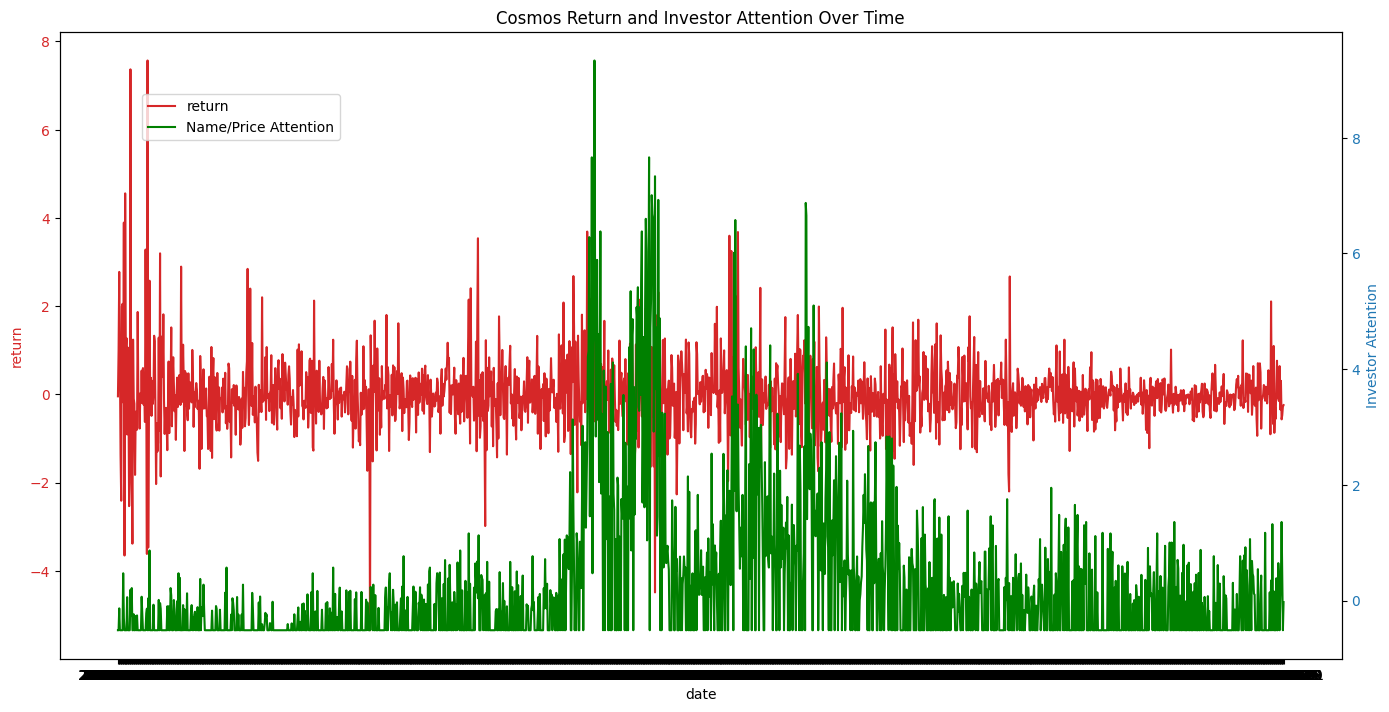

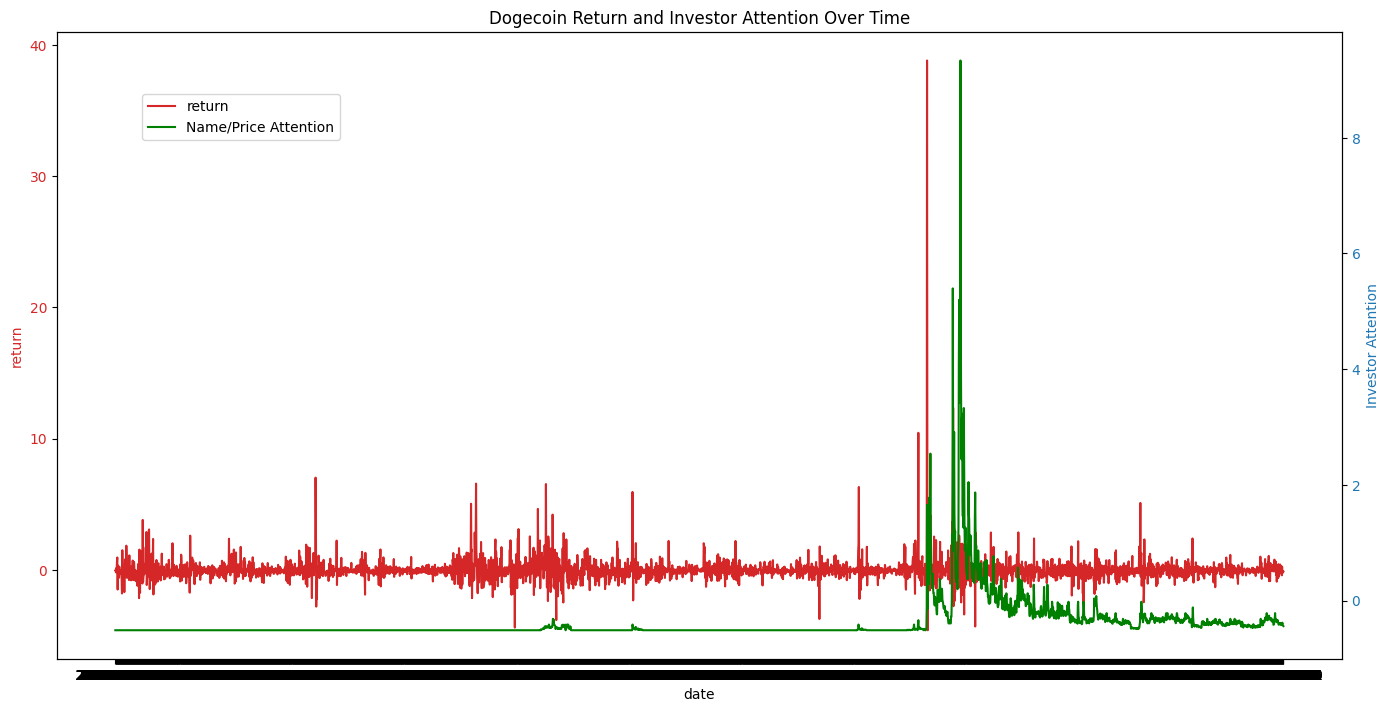

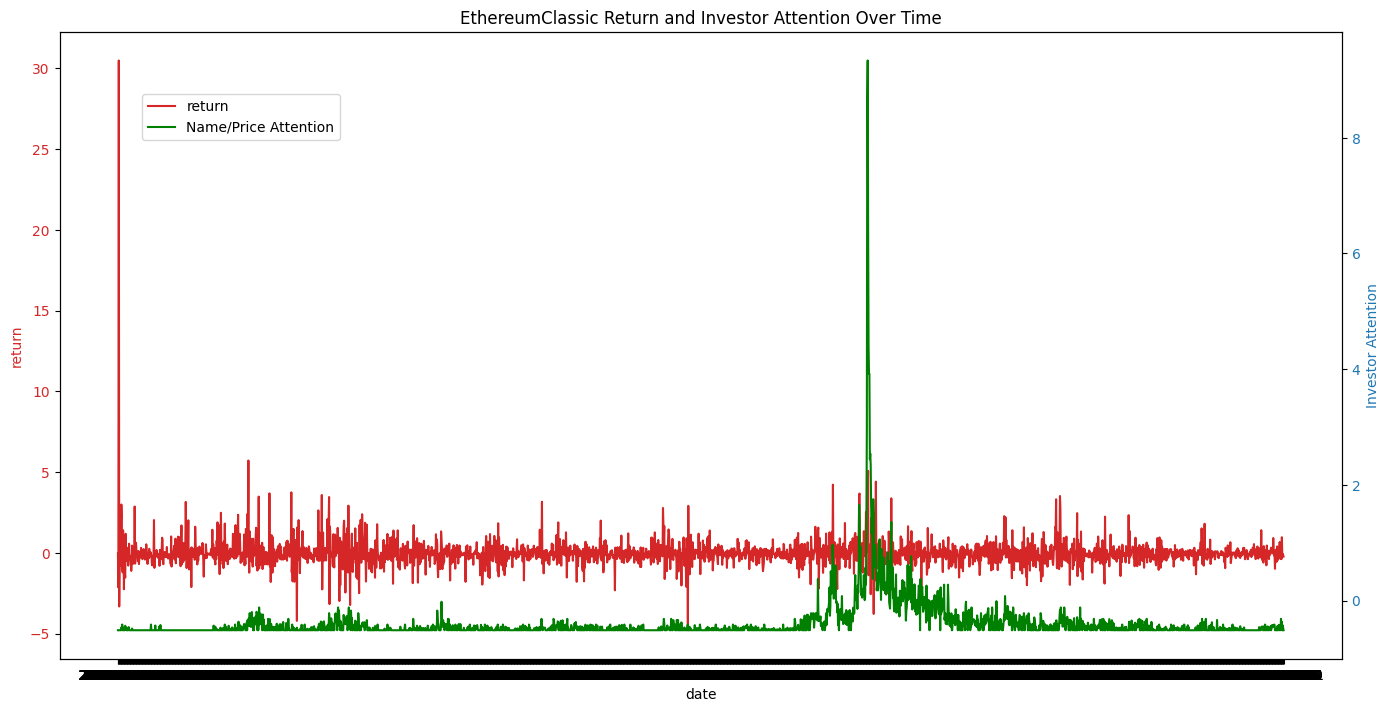

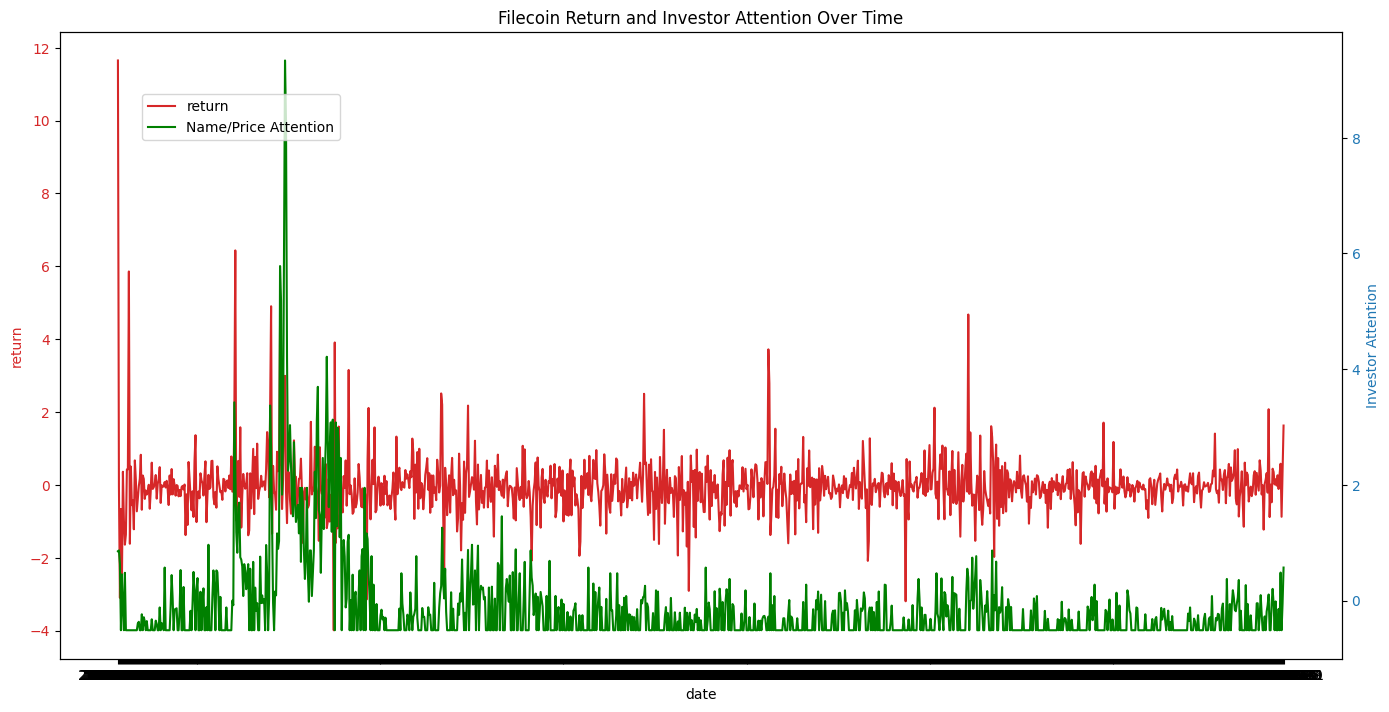

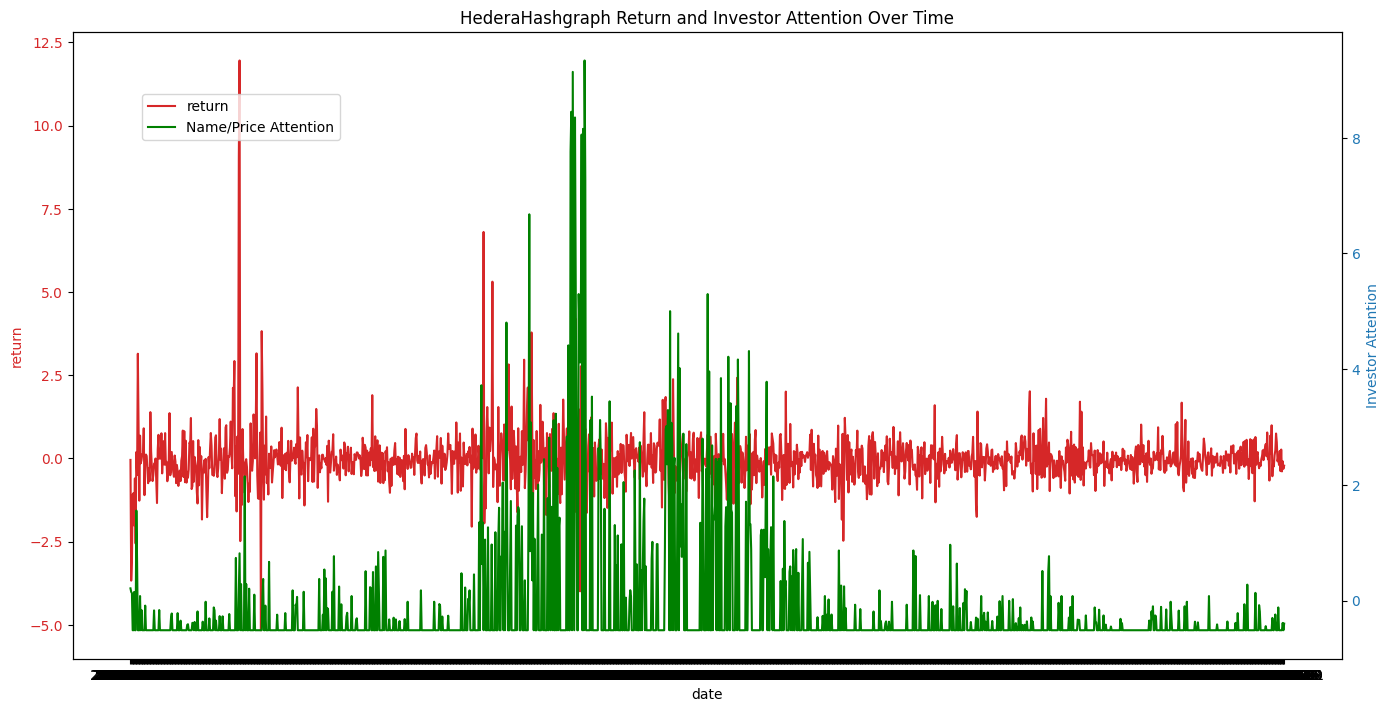

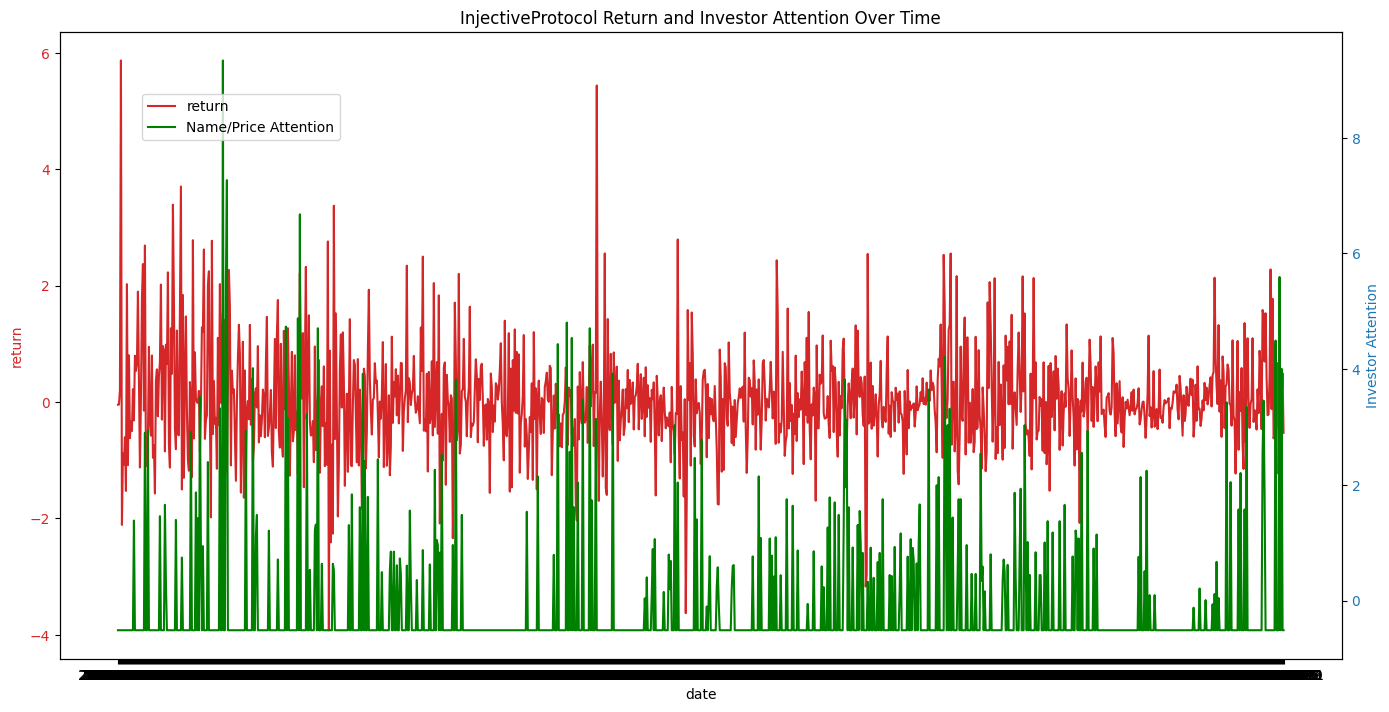

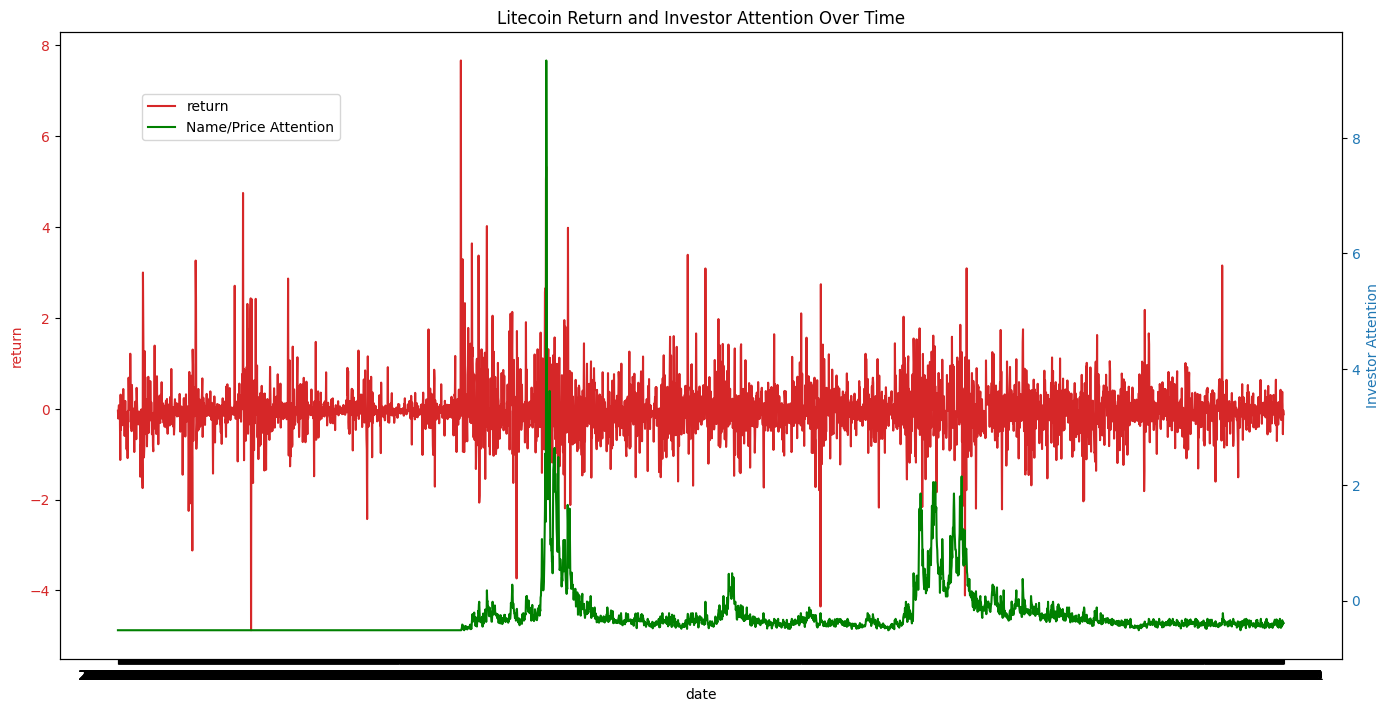

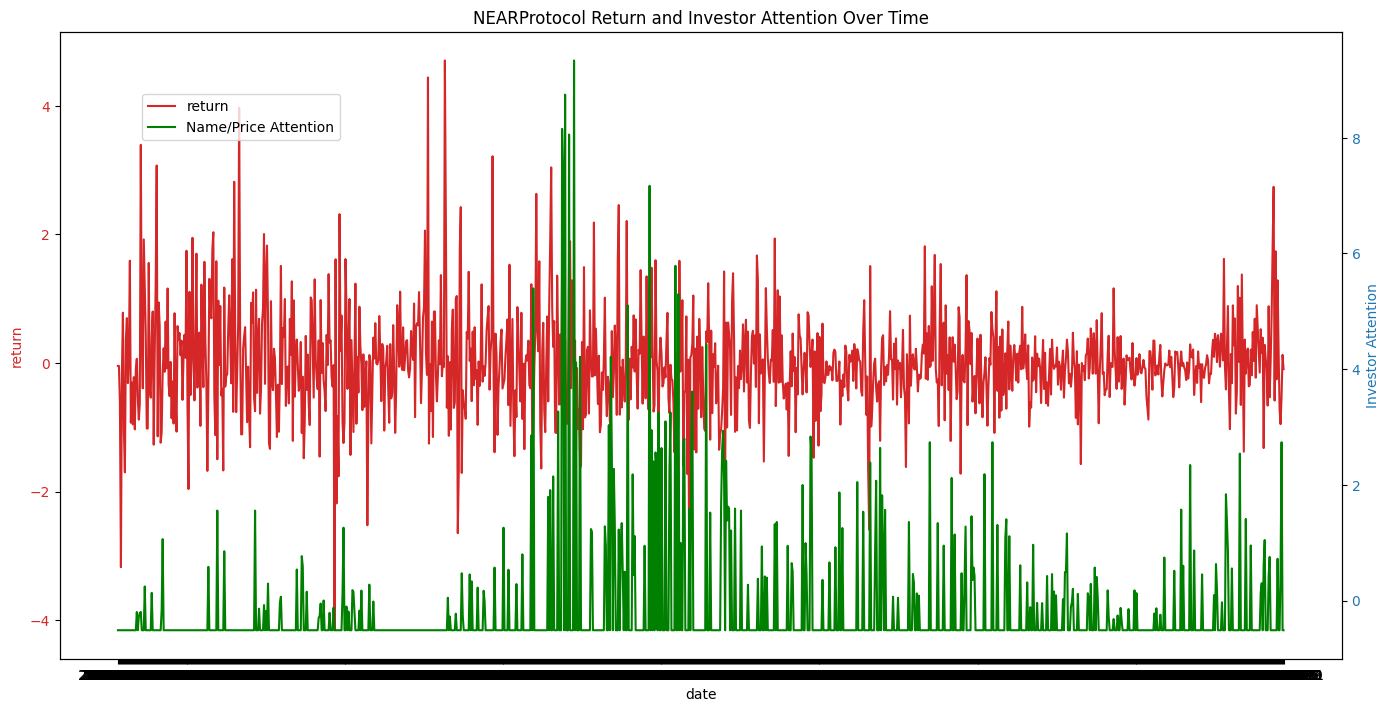

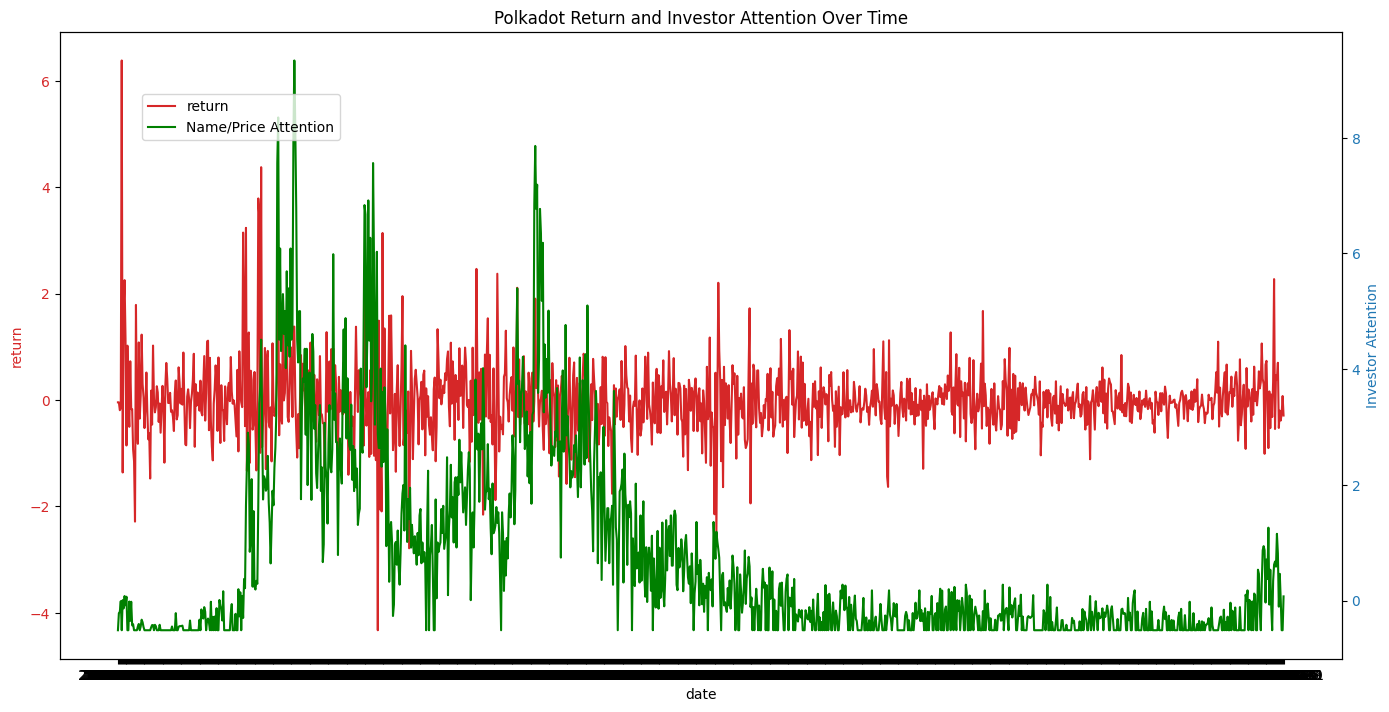

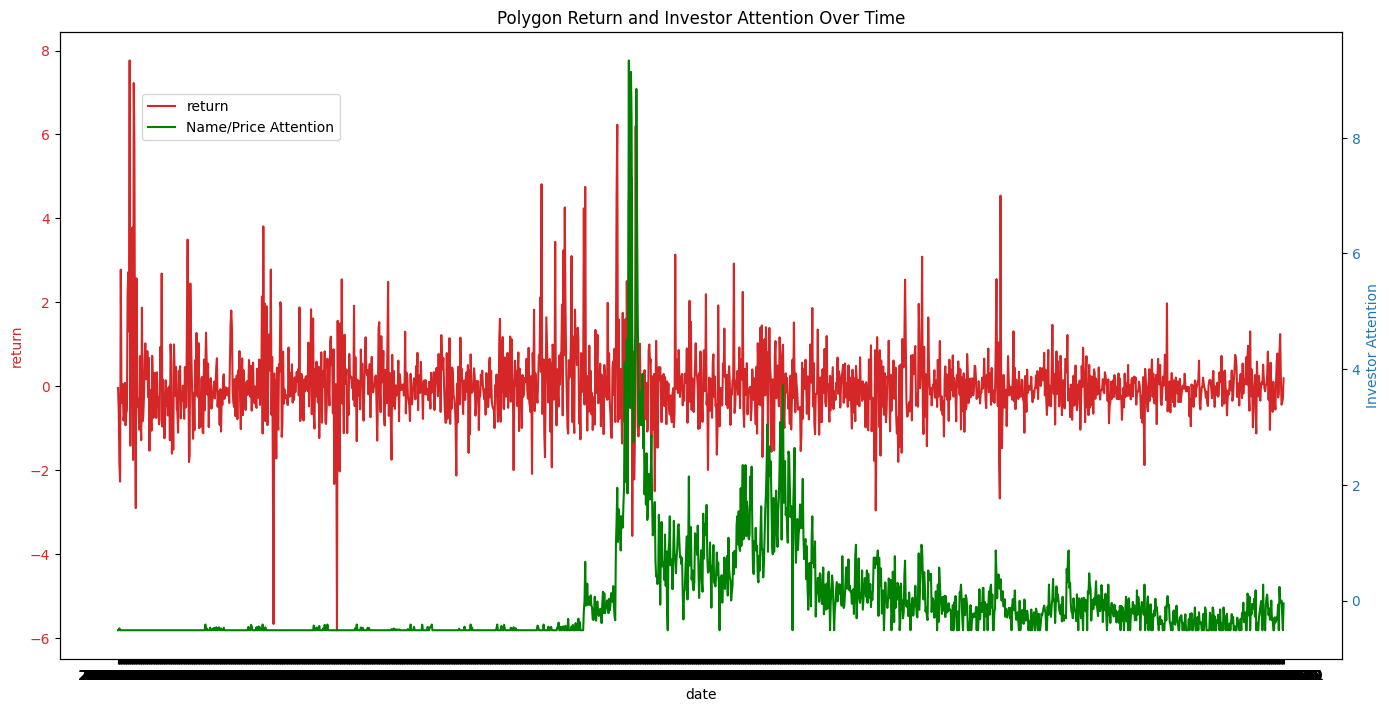

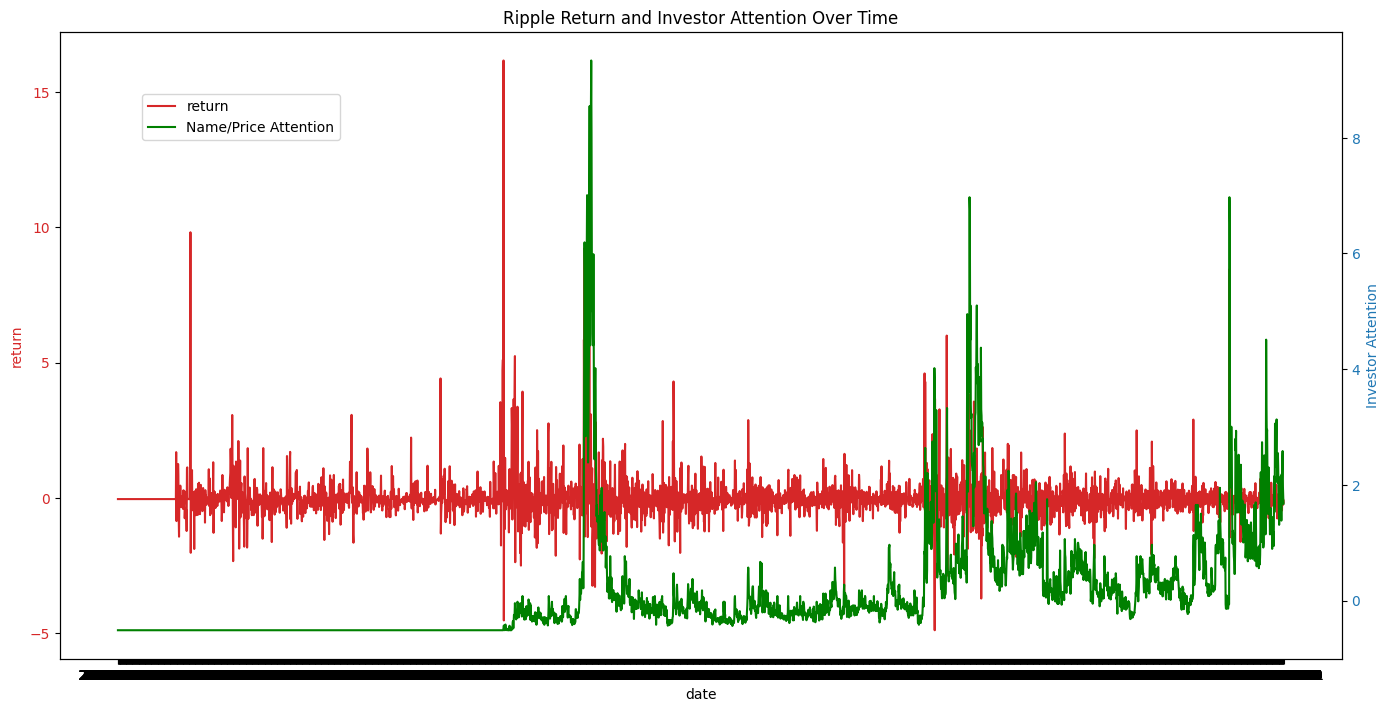

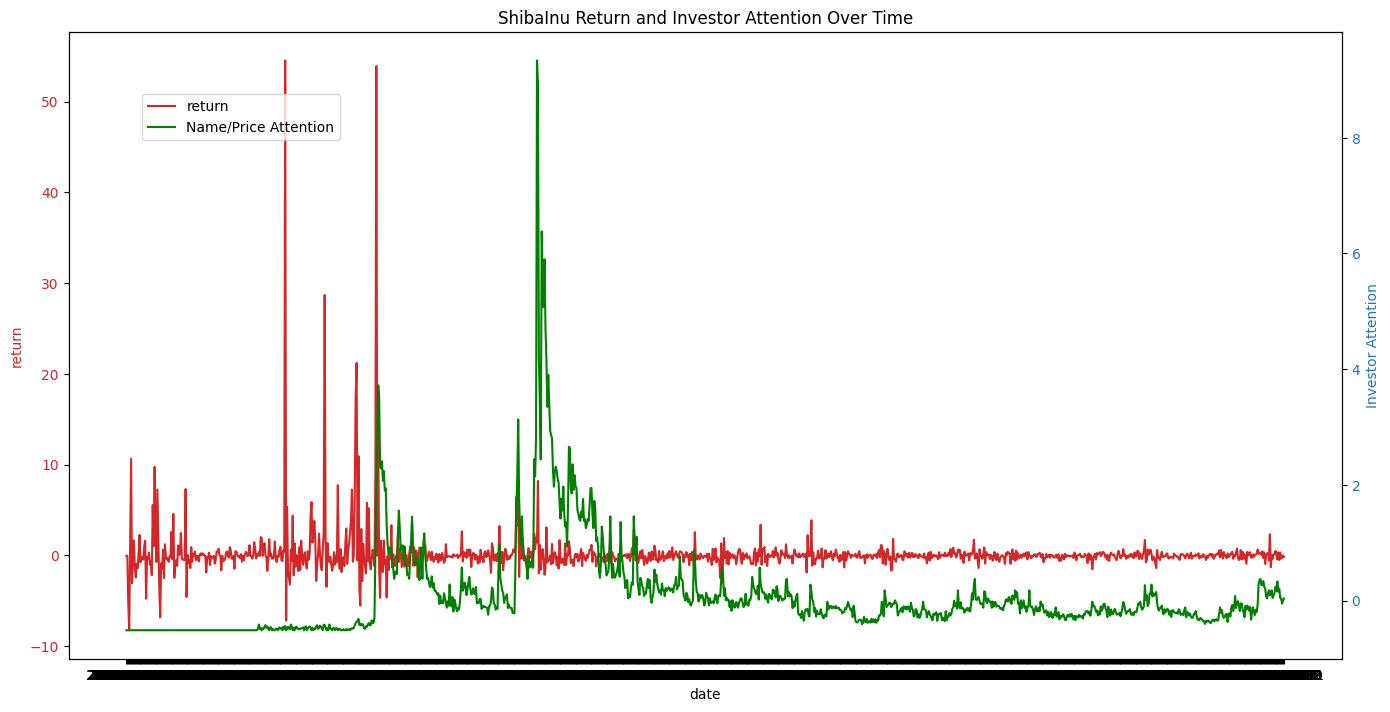

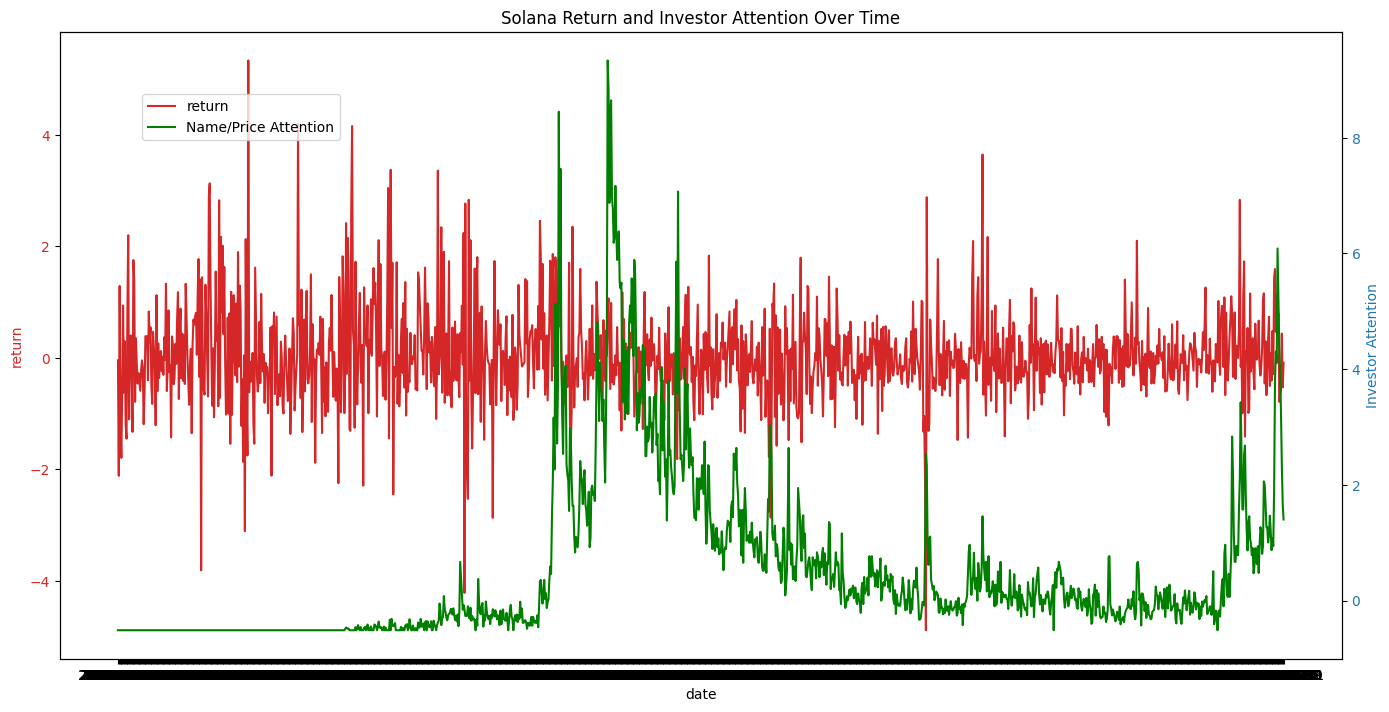

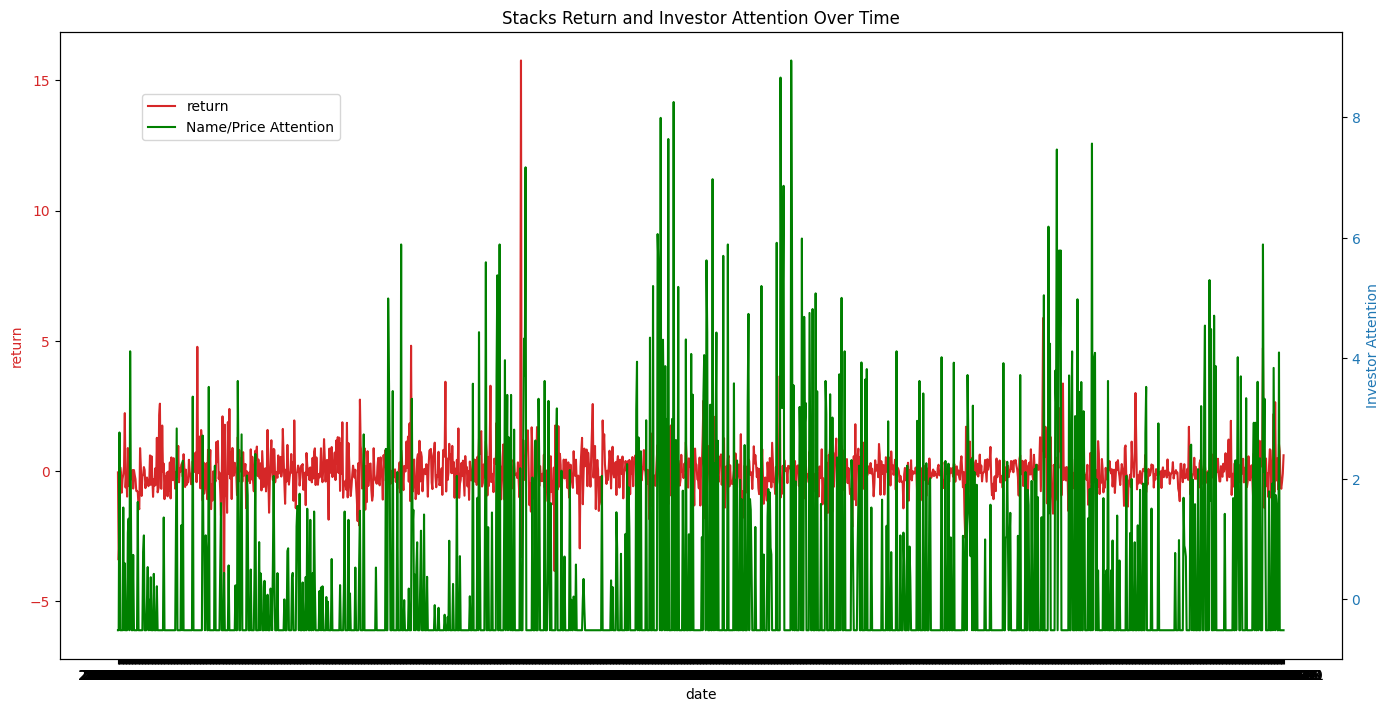

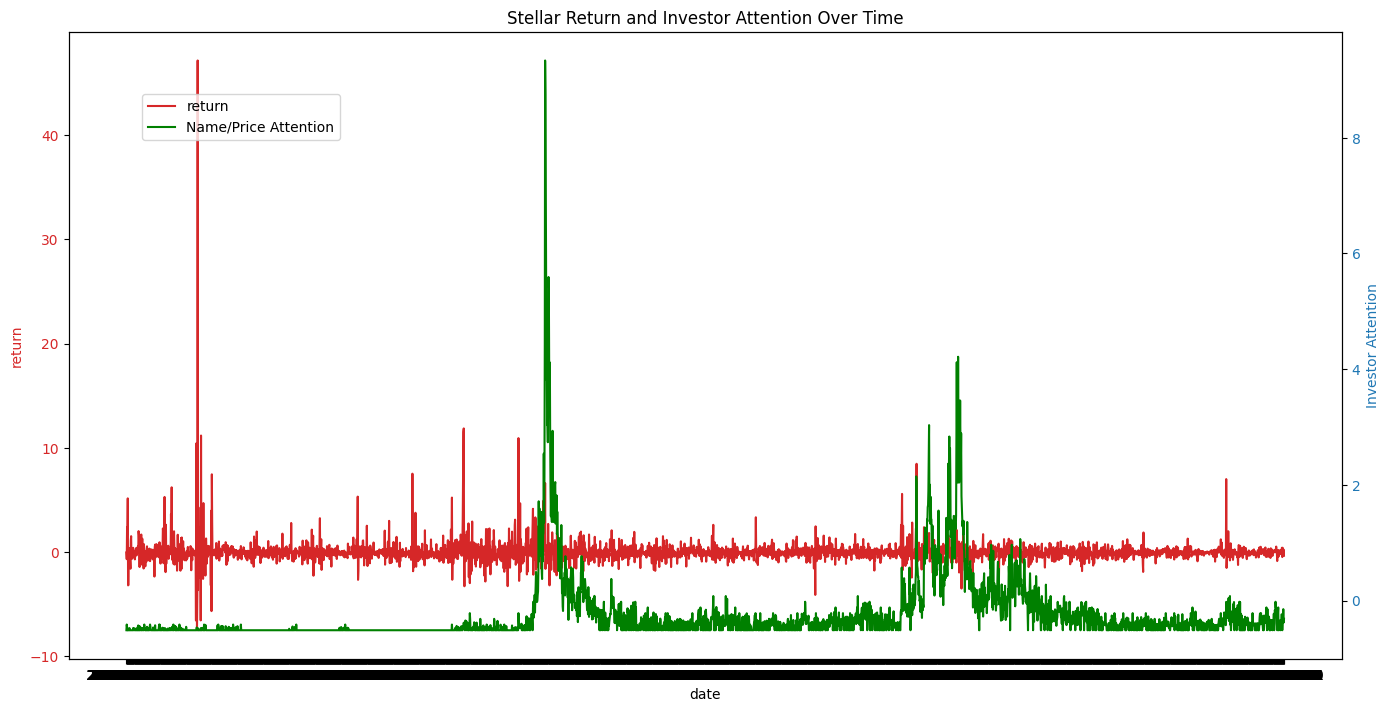

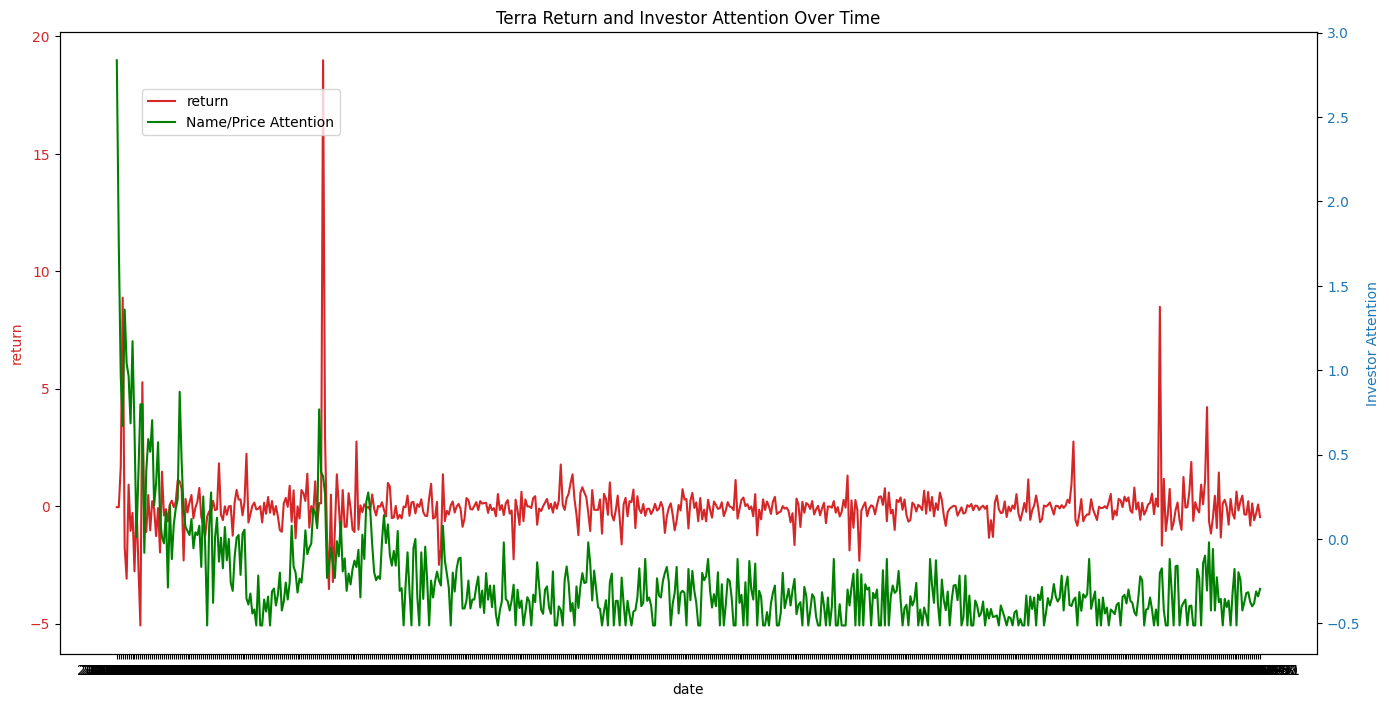

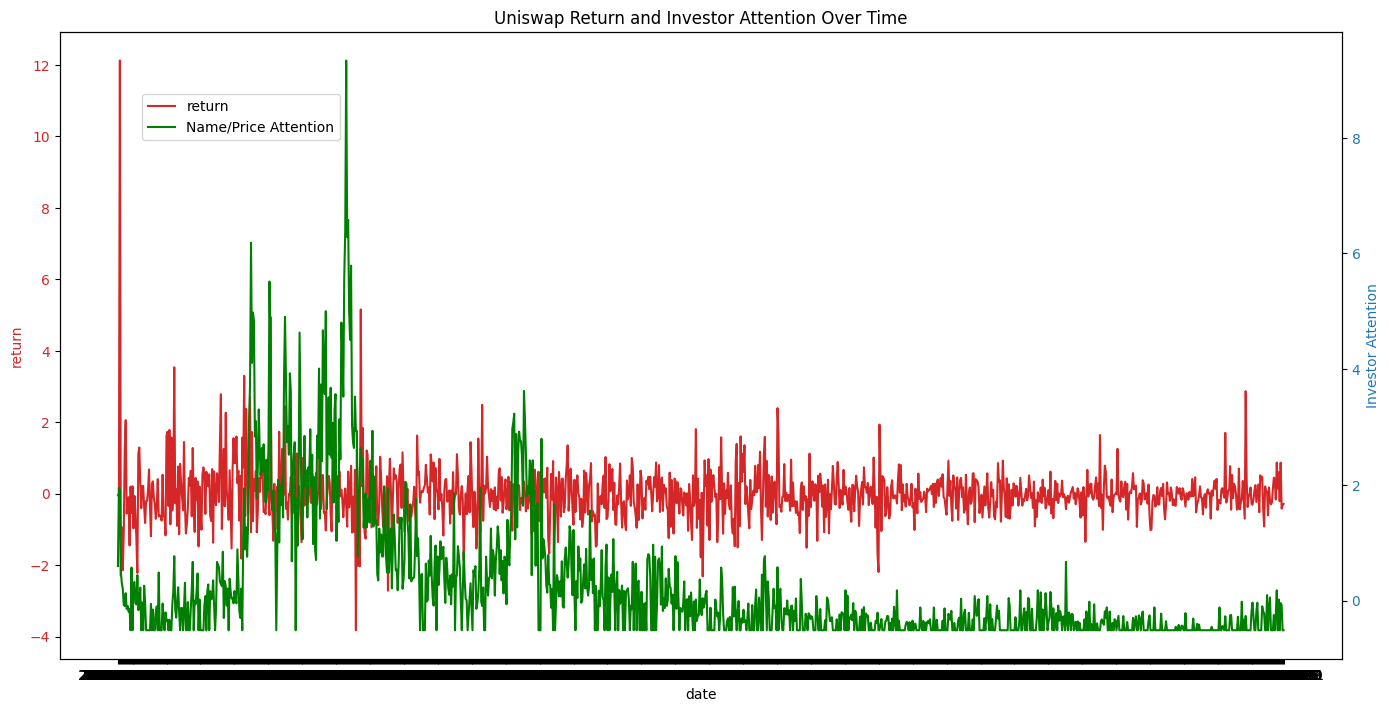

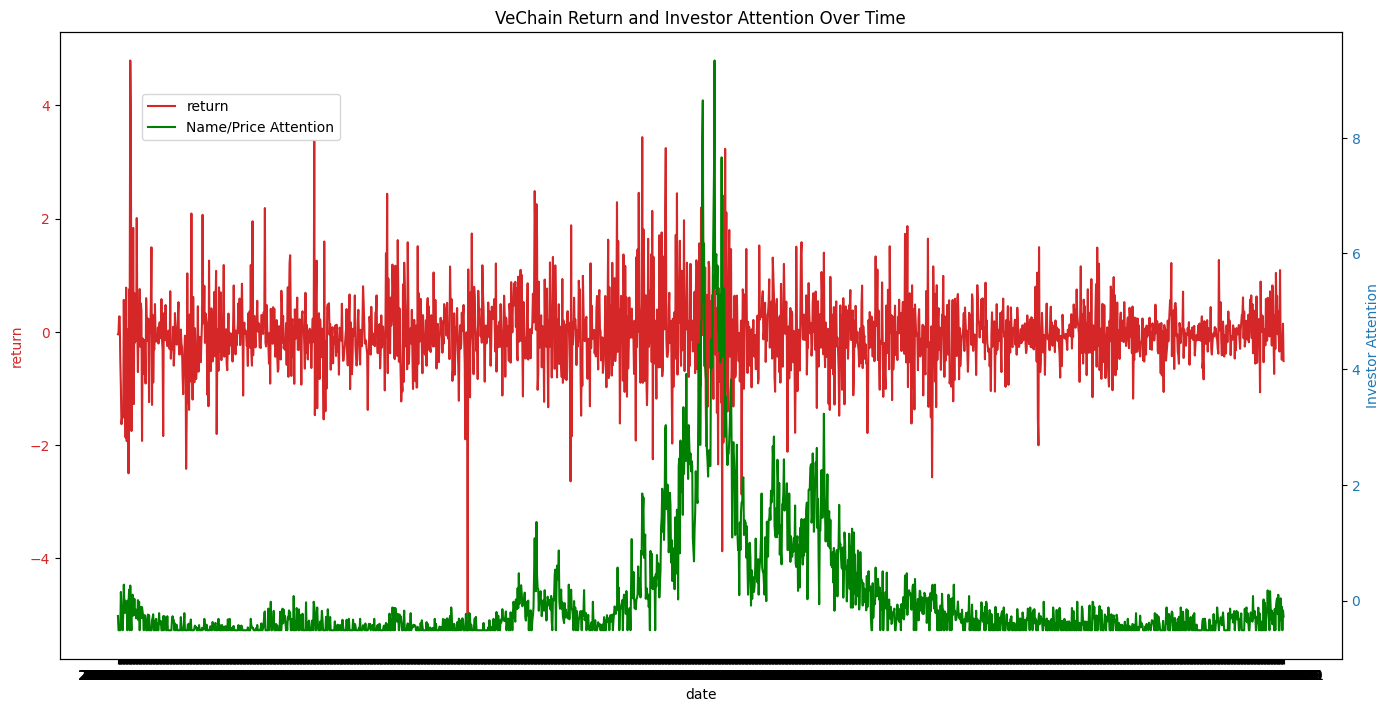

In [16]:
# Creating a time series plot for each crypto currency containing return and name_price_attention

crypto = data['crypto_name'].unique()

for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('return', color=color)
    ax1.plot(stock_data['date'], stock_data['return'], color=color, label='return')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Investor Attention', color=color)  # we already handled the x-label with ax1
    ax2.plot(stock_data['date'], stock_data['name_price_attention'], color='green', label='Name/Price Attention')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'{currency} Return and Investor Attention Over Time')
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
    plt.show()

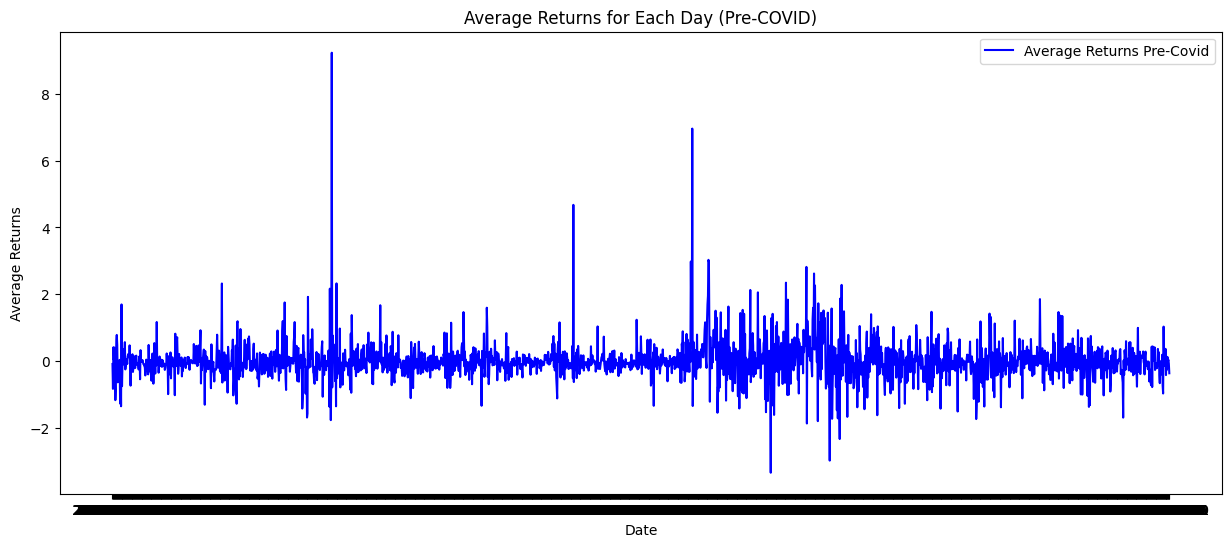

In [18]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 

average_returns_pre_covid = data[data['Post-covid'] == 0].groupby('date')['return'].mean()
average_attention_pre_covid = data[data['Post-covid'] == 0].groupby('date')['name_price_attention'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid',color='blue')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

In [11]:
data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.180101 -0.269505   -0.235414    Algorand   
1  2019-06-22 -0.179815 -0.240548   -0.234446    Algorand   
2  2019-06-23 -0.180000 -0.227594   -0.234680    Algorand   
3  2019-06-24 -0.180048 -0.235517   -0.234777    Algorand   
4  2019-06-25 -0.180137 -0.244048   -0.234885    Algorand   

   name_price_attention     return  crypto_dummy  log_attention  log_return  \
0             -0.364255  -0.045227             0       0.405465    0.000000   
1             -0.511961  11.153287             0       0.000000    4.581523   
2             -0.376071  -3.707394             0       0.322083    0.000000   
3             -0.511961  -1.423728             0       0.000000    0.000000   
4             -0.511961  -3.004727             0       0.000000    0.000000   

   Post-covid  
0           0  
1           0  
2           0  
3           0  
4           0

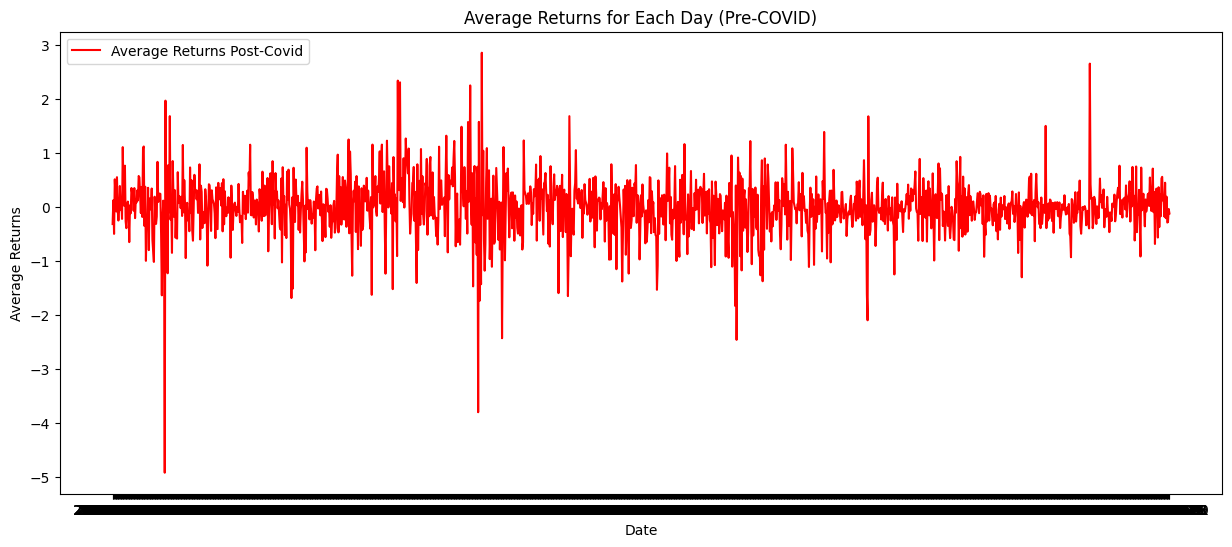

In [19]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 
average_returns_post_covid = data[data['Post-covid'] == 1].groupby('date')['return'].mean()
average_attention_post_covid = data[data['Post-covid'] == 1].groupby('date')['name_price_attention'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns Post-Covid',color='red')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

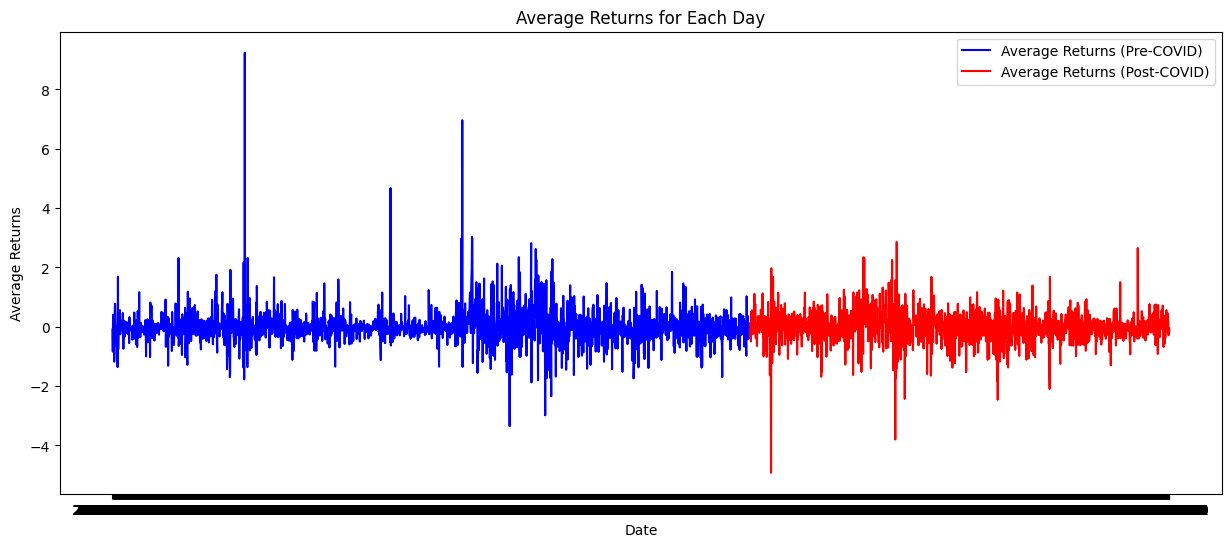

In [17]:
#Putting both together to see the on the same scale
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns (Pre-COVID)', color='blue')
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns (Post-COVID)', color='red')
plt.title('Average Returns for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()


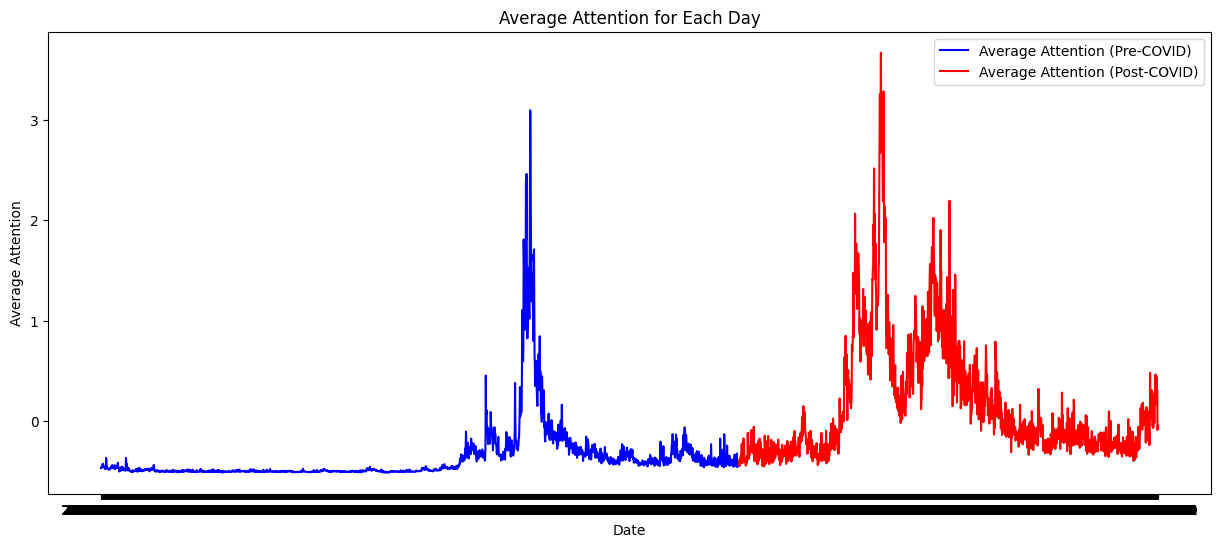

In [21]:
#Putting both together to see the on the same scale
plt.figure(figsize=(15, 6))
plt.plot(average_attention_pre_covid.index, average_attention_pre_covid, label='Average Attention (Pre-COVID)', color='blue')
plt.plot(average_attention_post_covid.index, average_attention_post_covid, label='Average Attention (Post-COVID)', color='red')
plt.title('Average Attention for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Attention')
plt.legend()
plt.show()


### 2. Distributions of Independent Variables

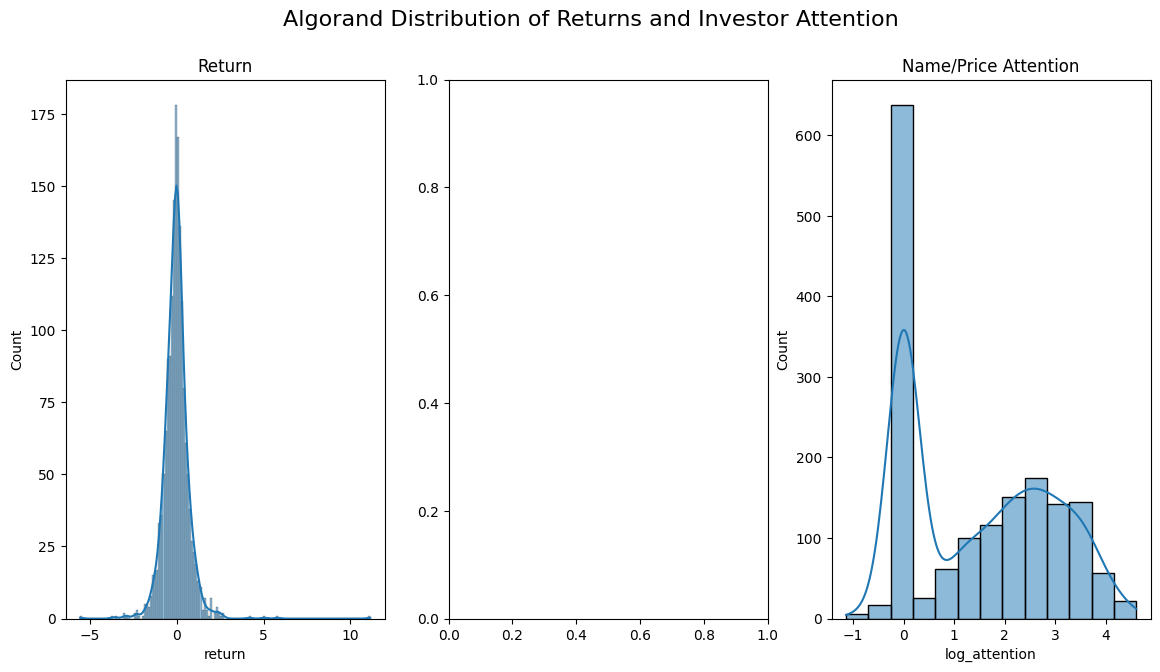

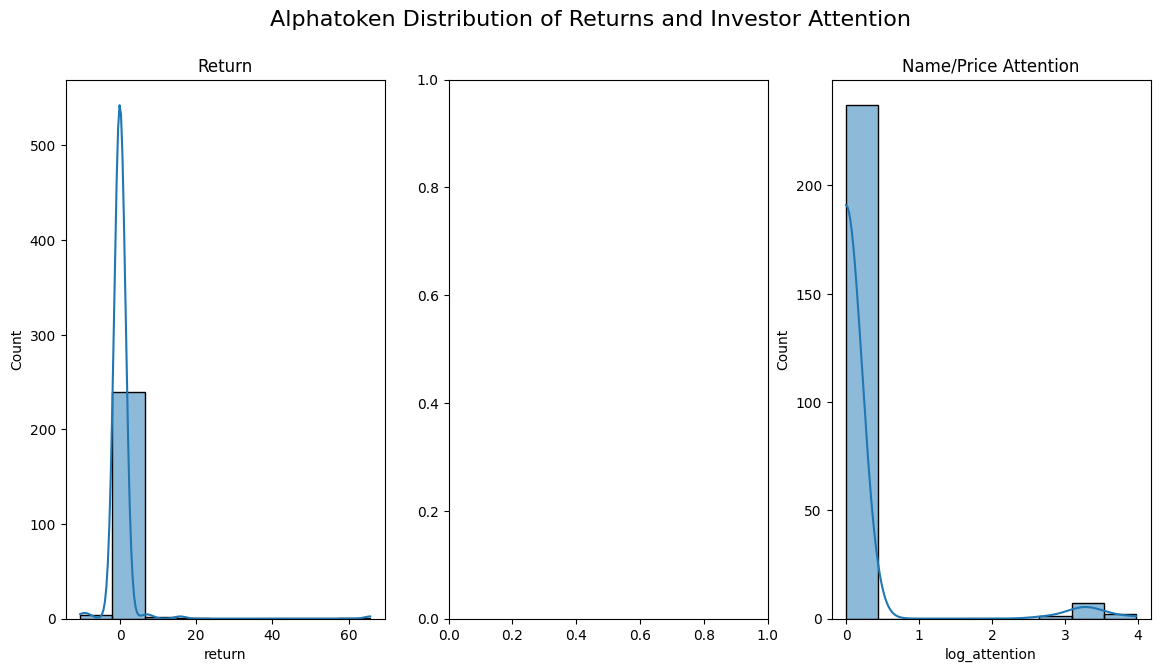

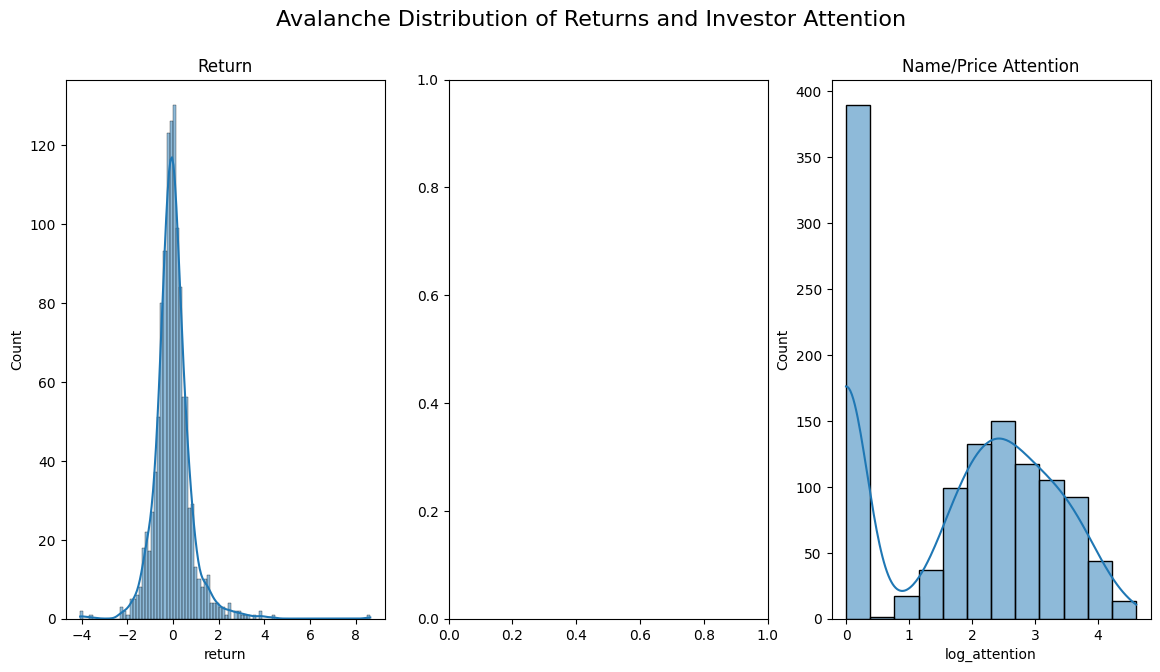

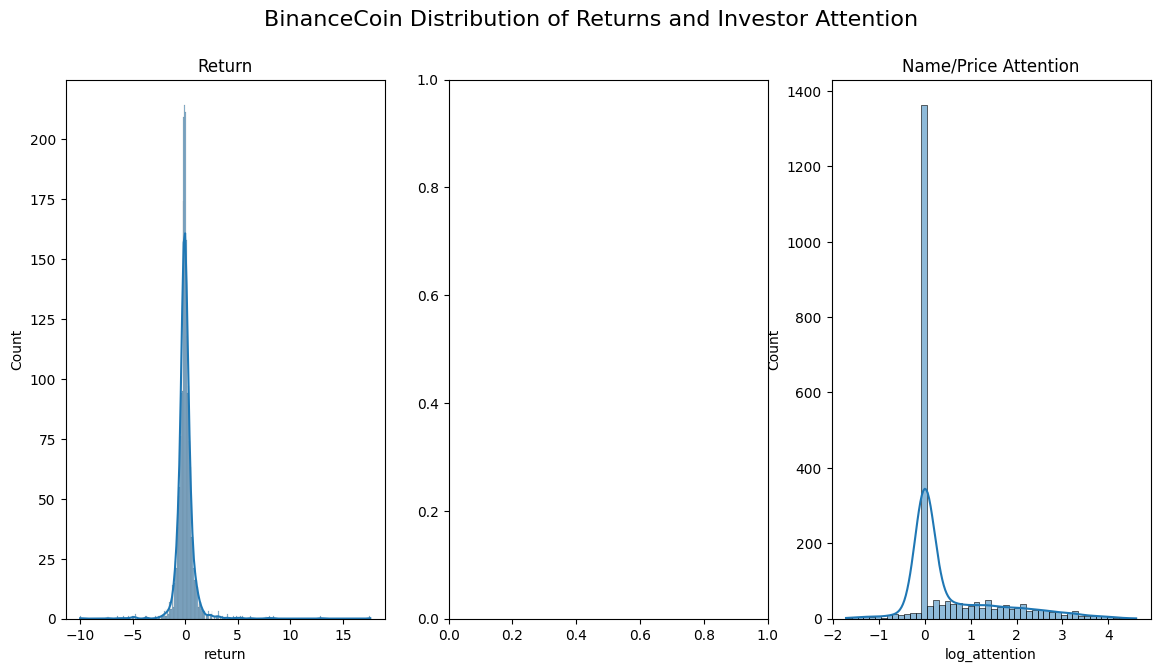

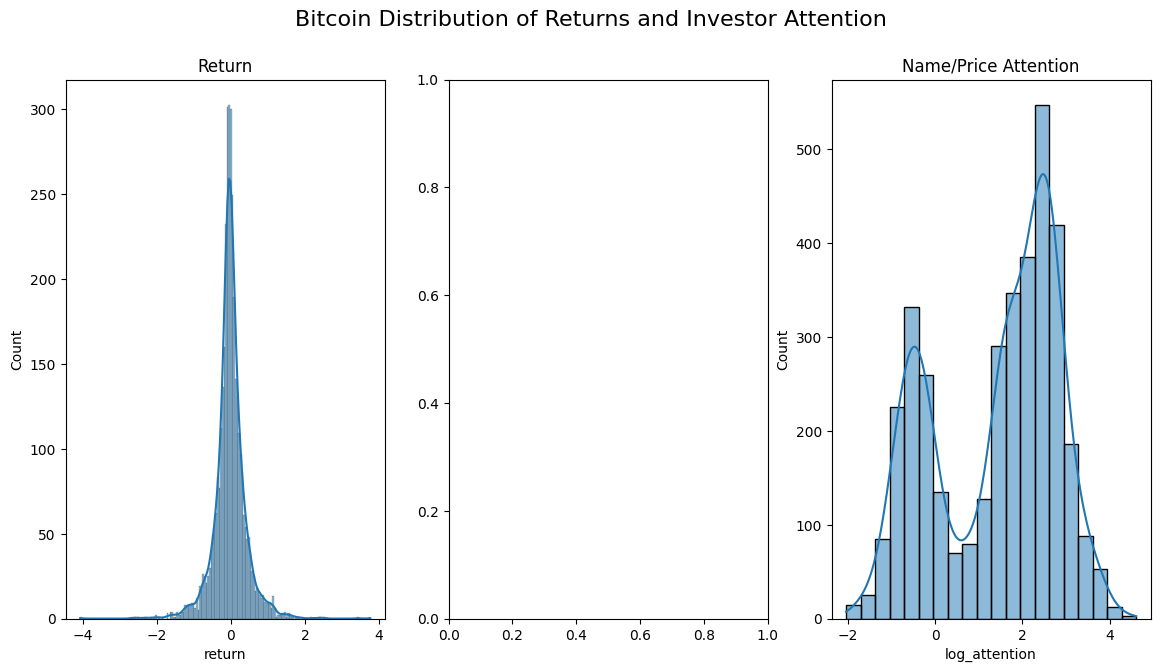

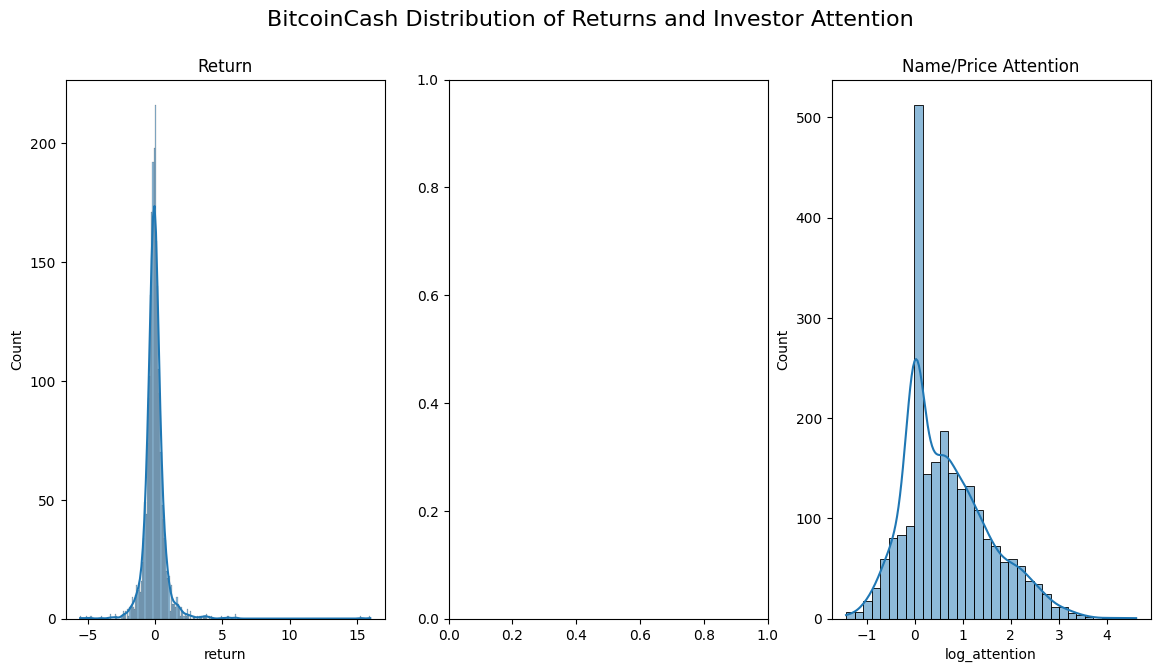

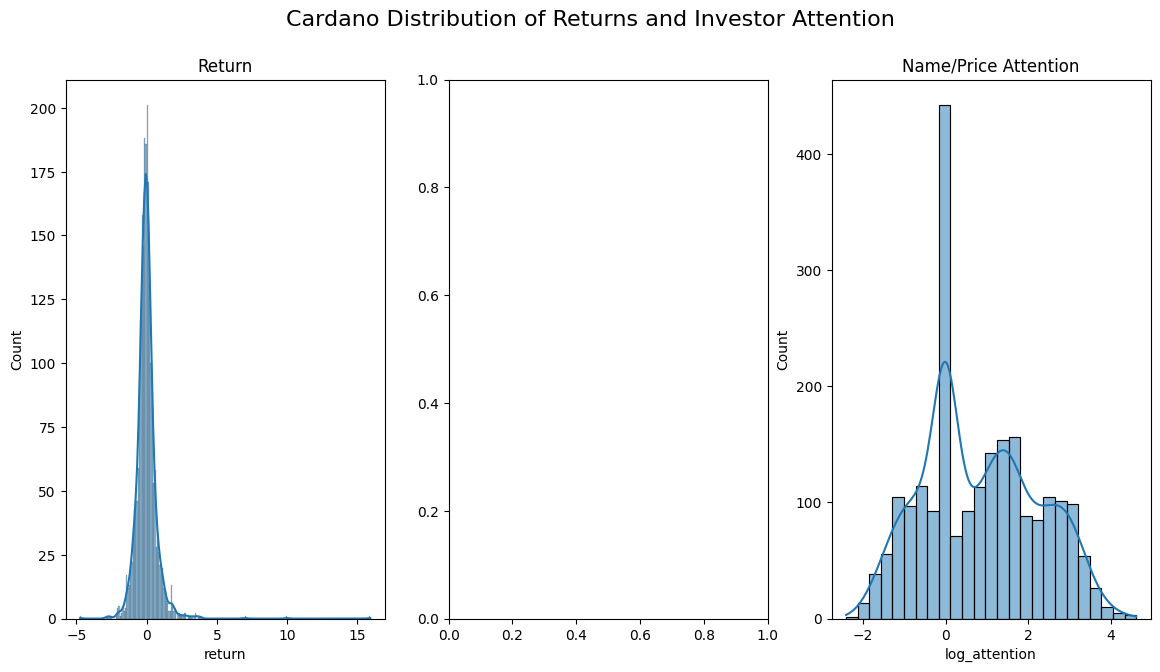

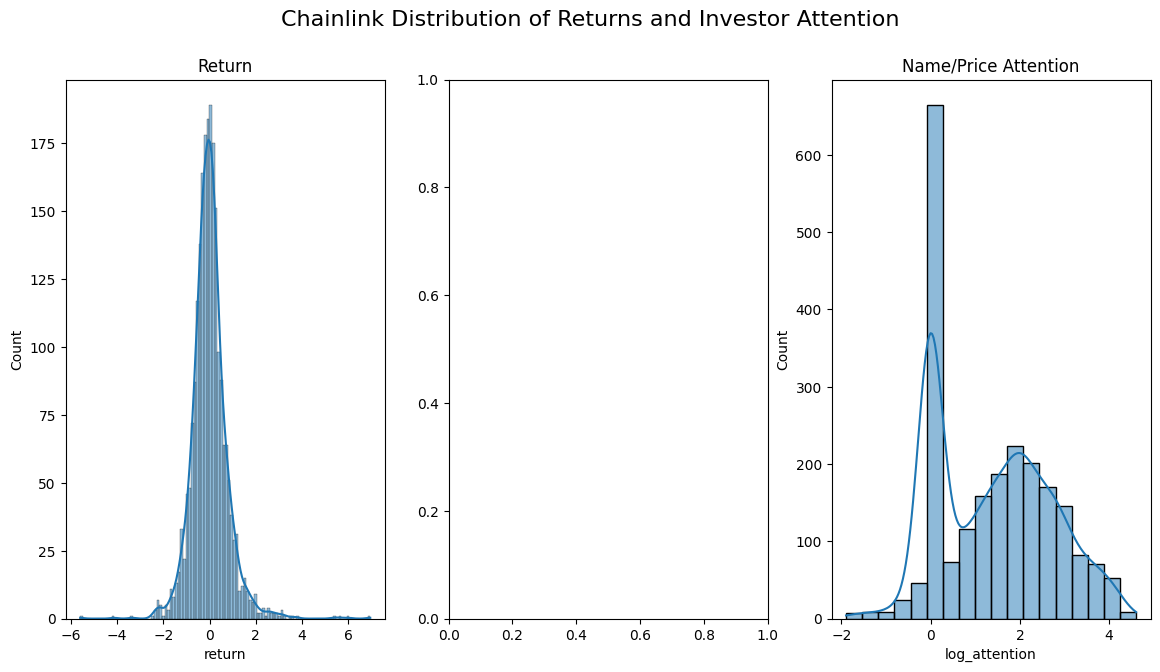

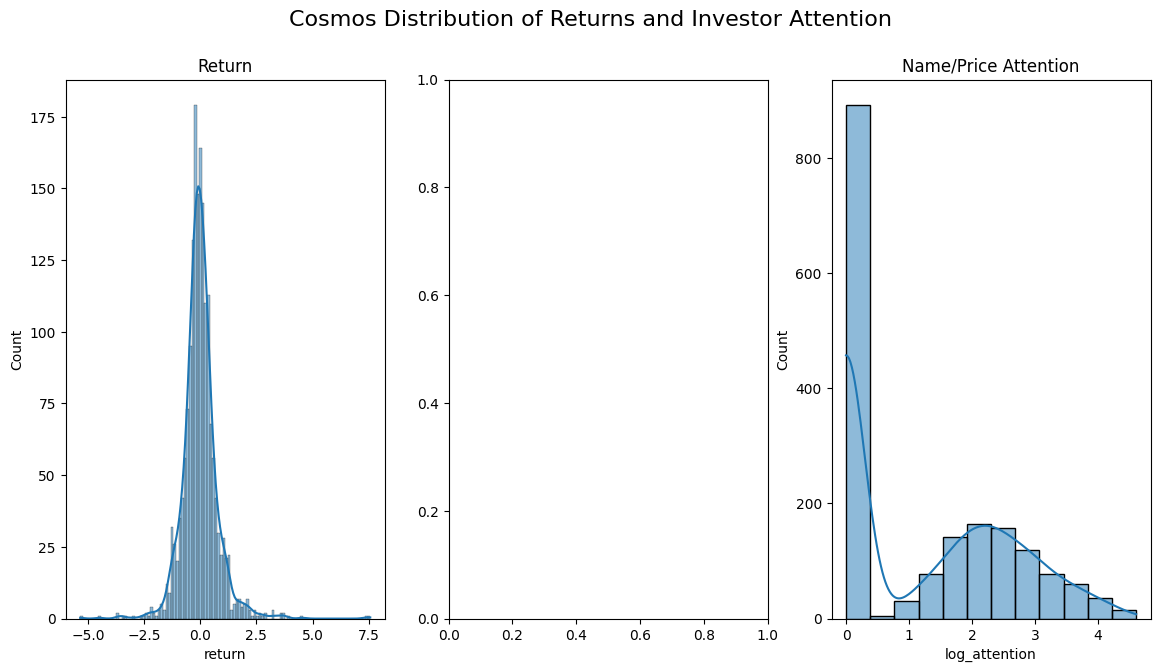

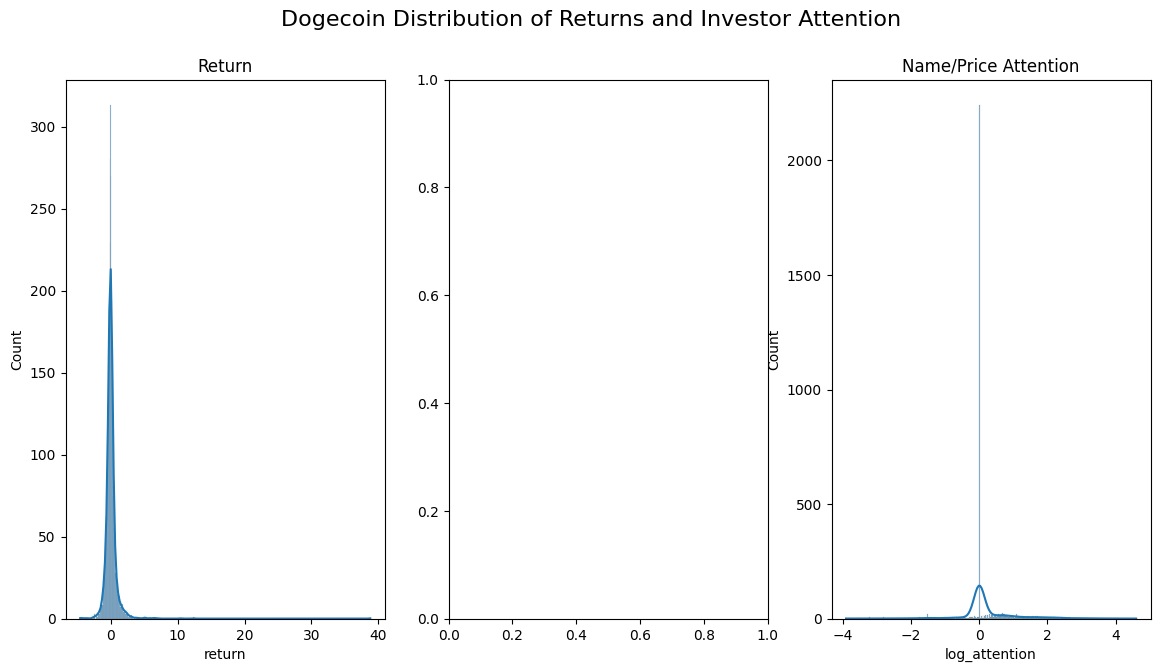

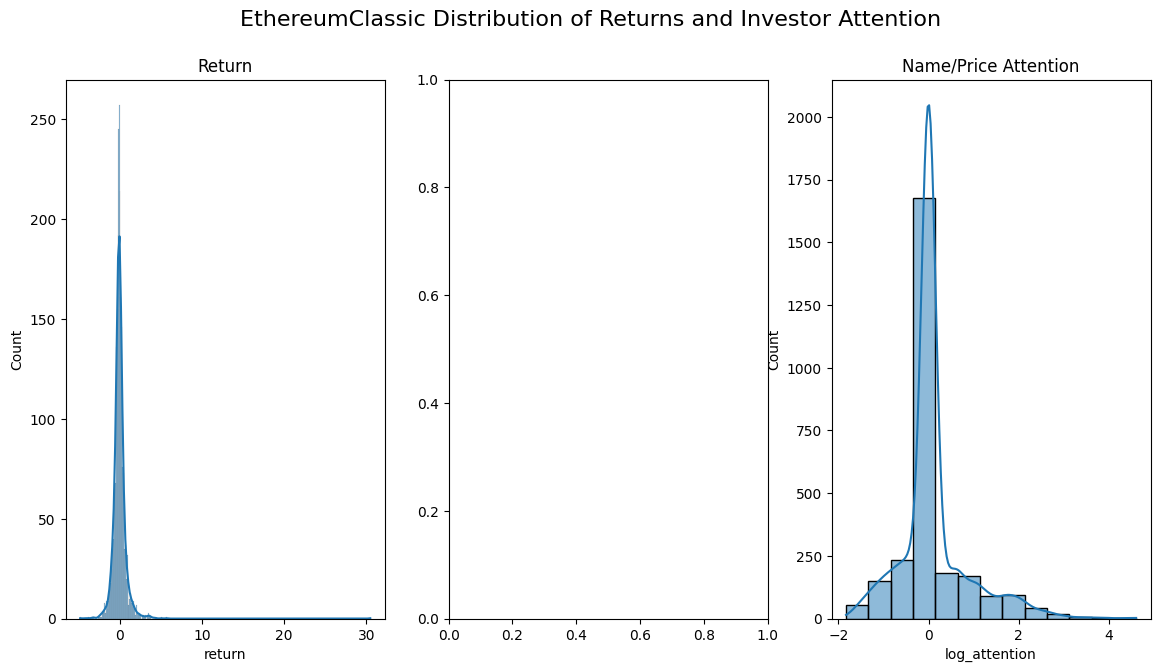

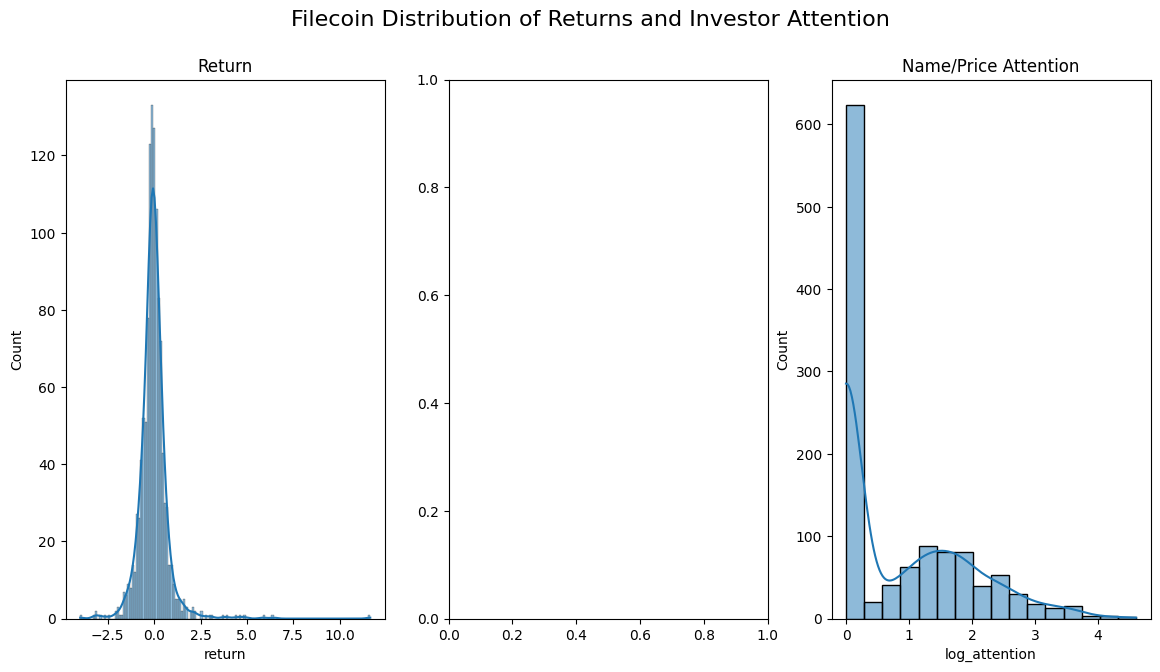

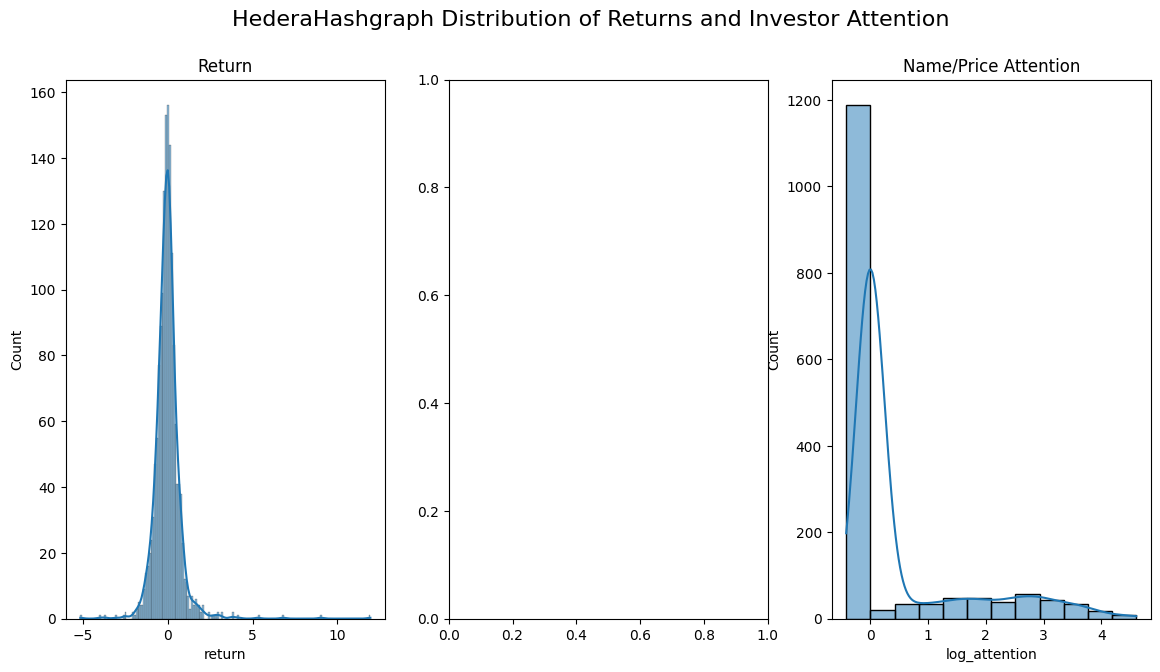

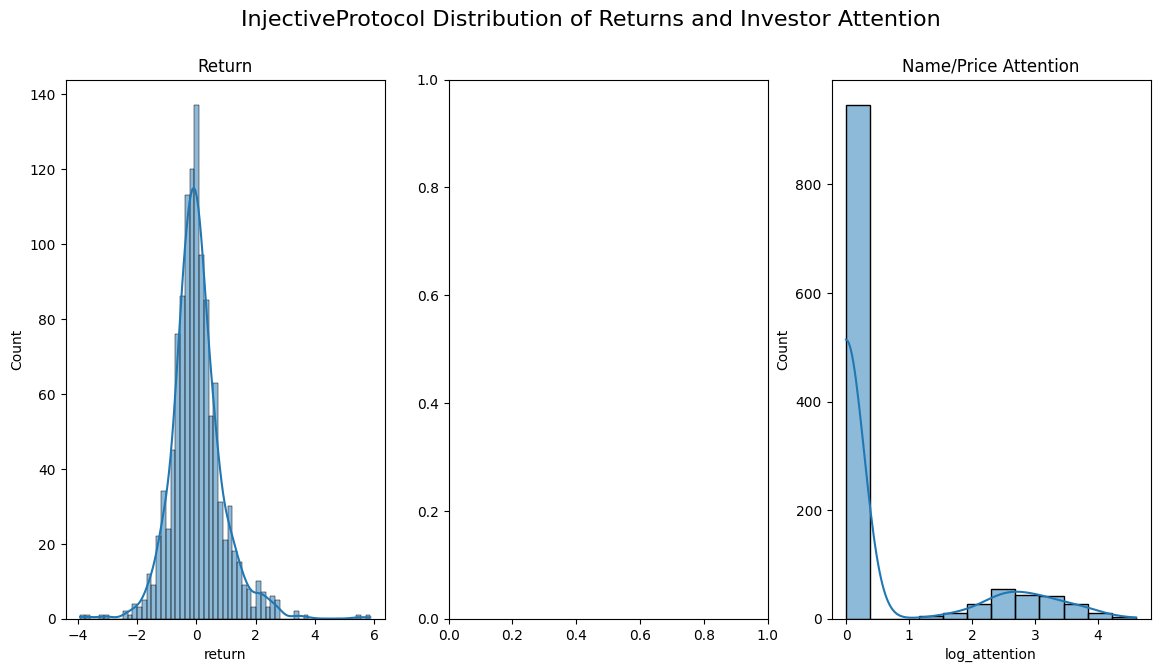

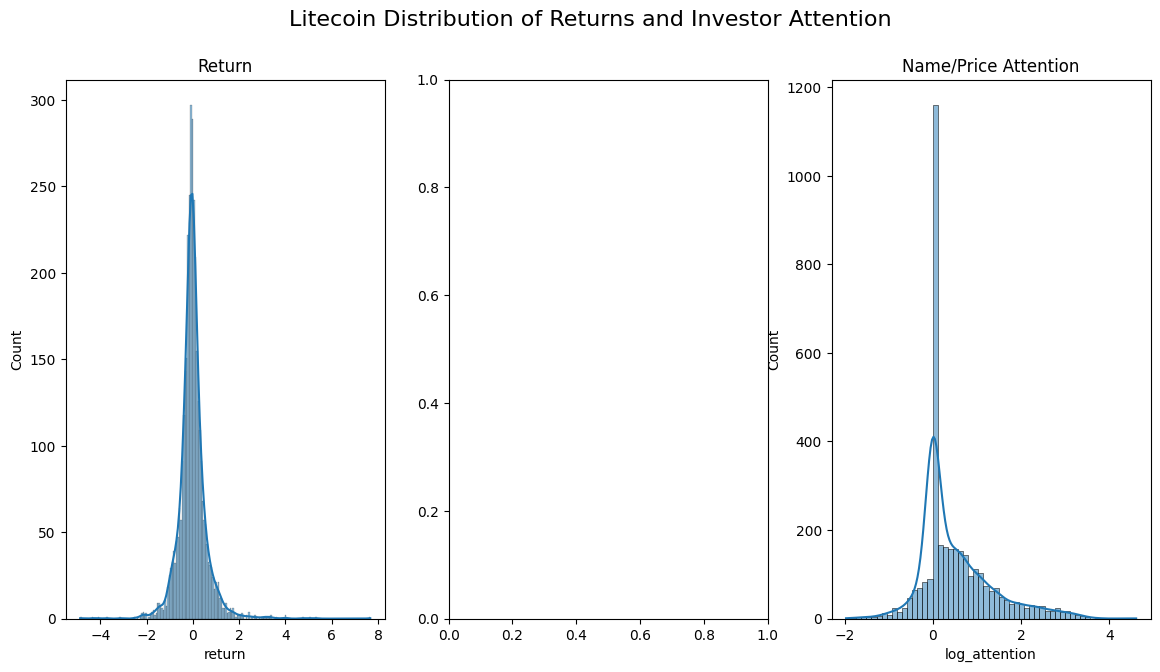

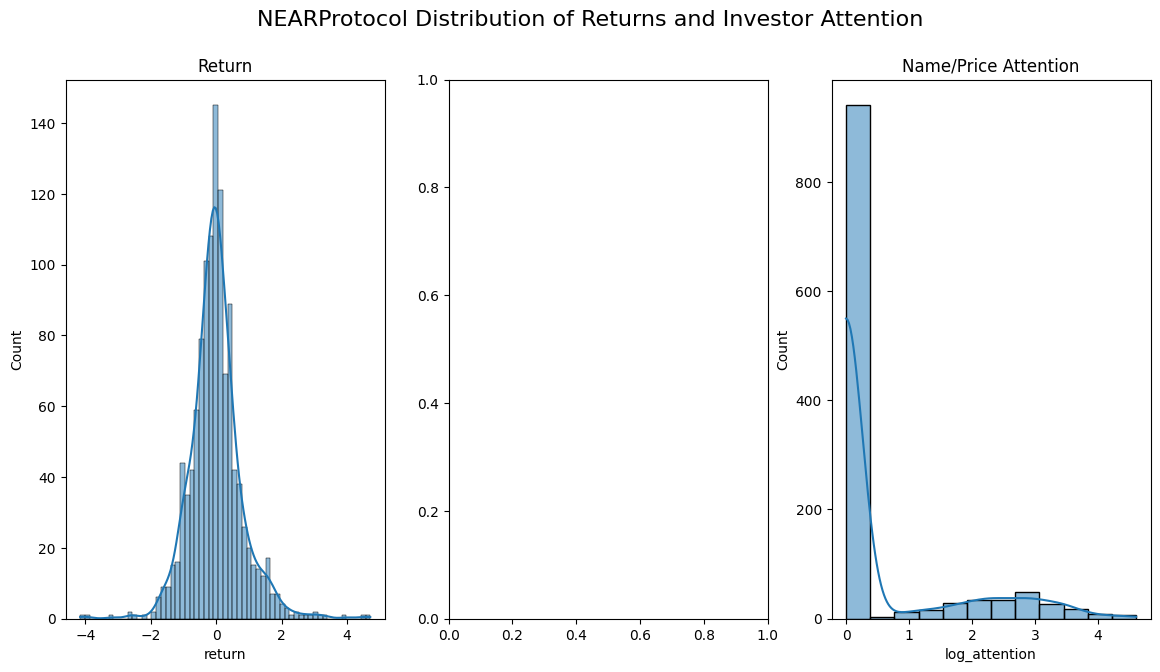

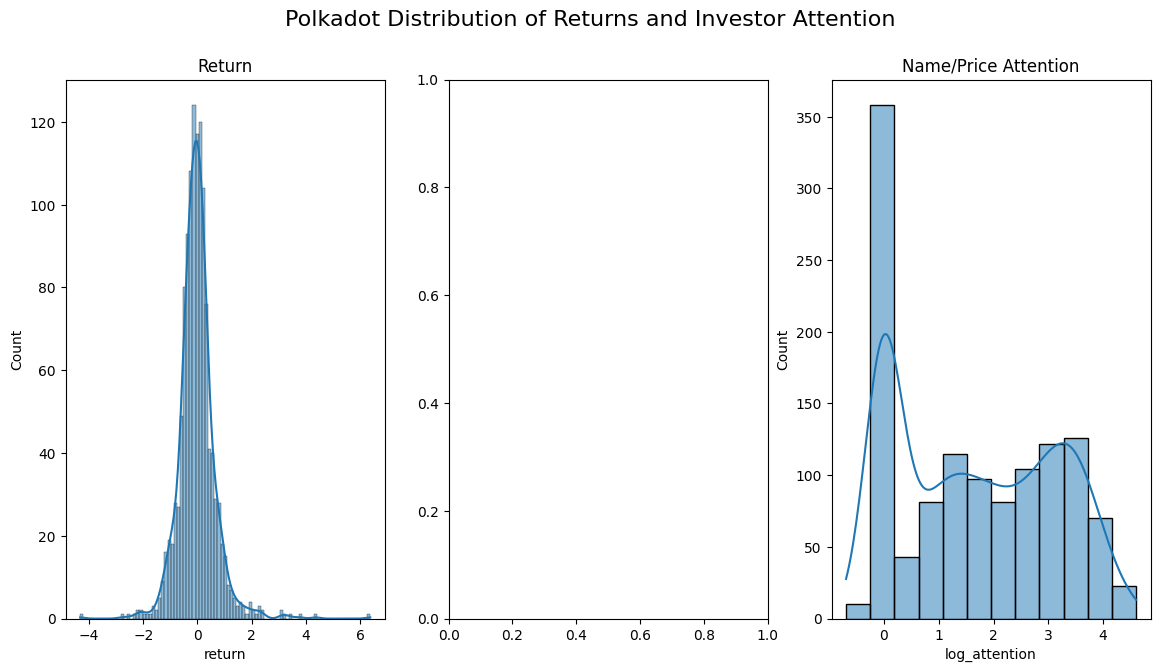

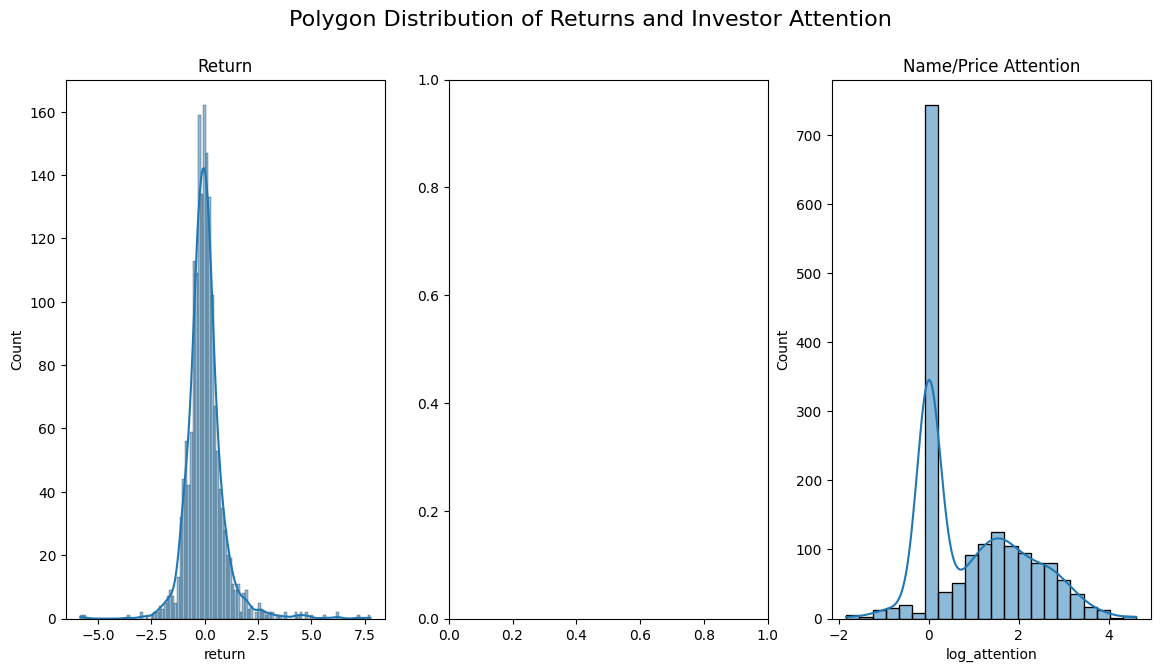

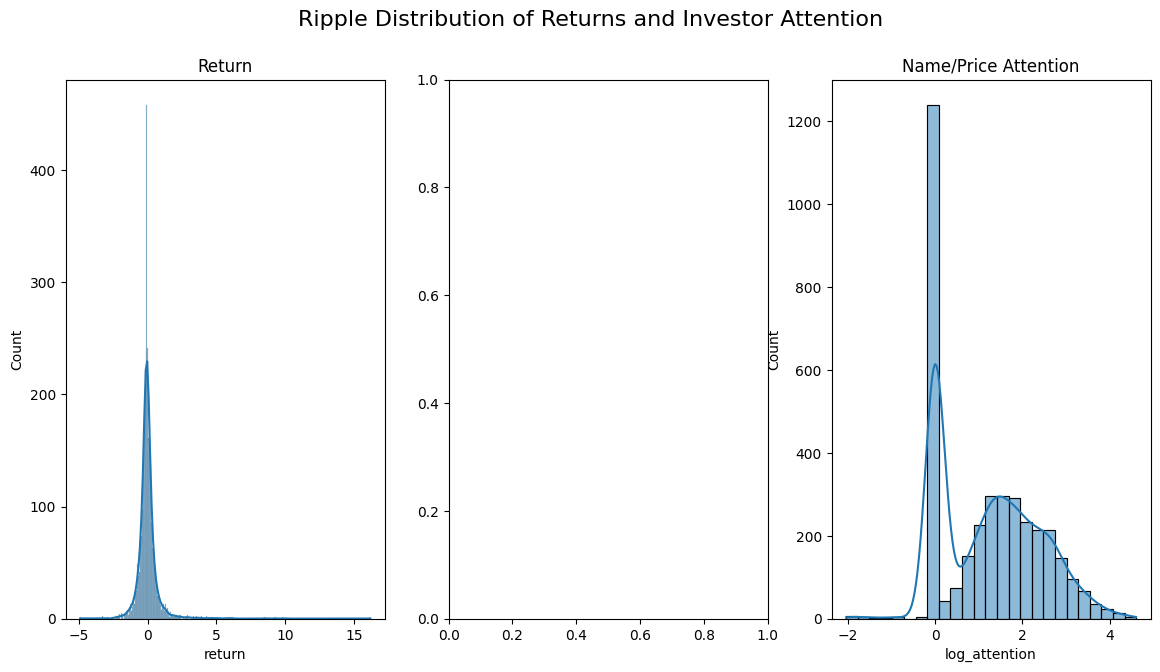

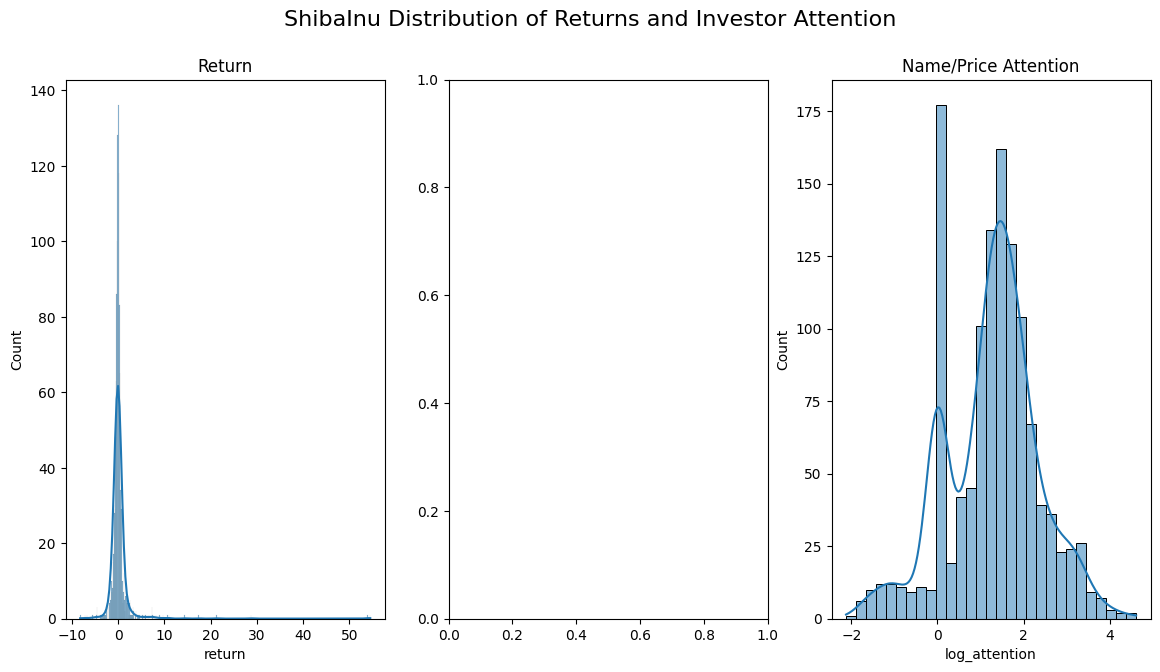

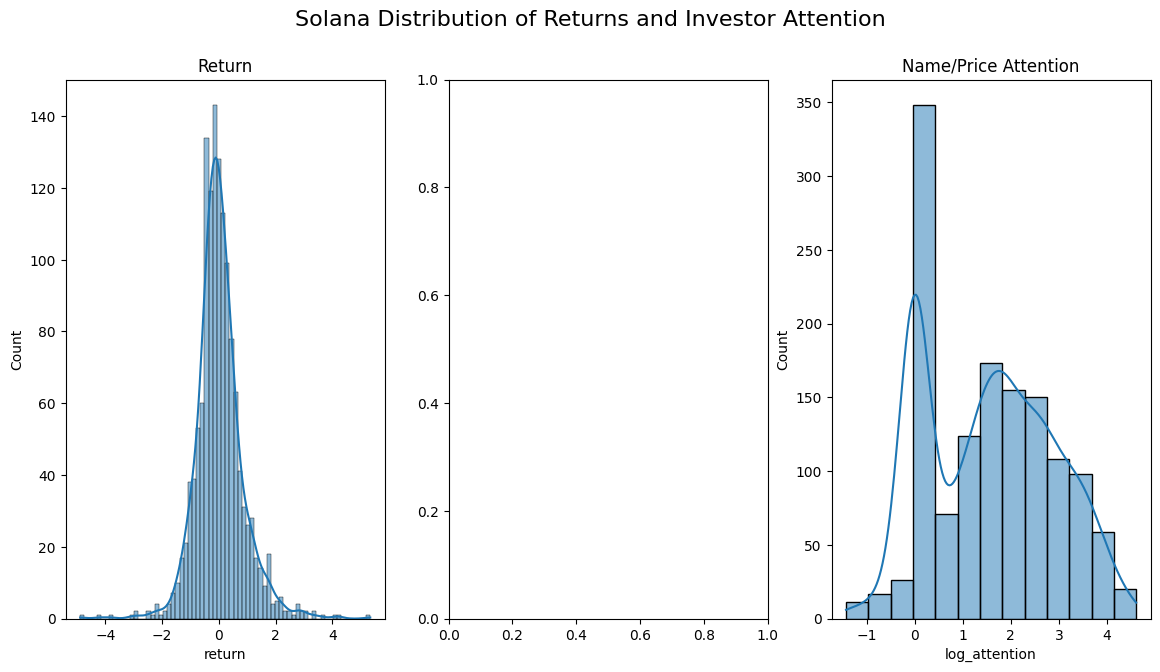

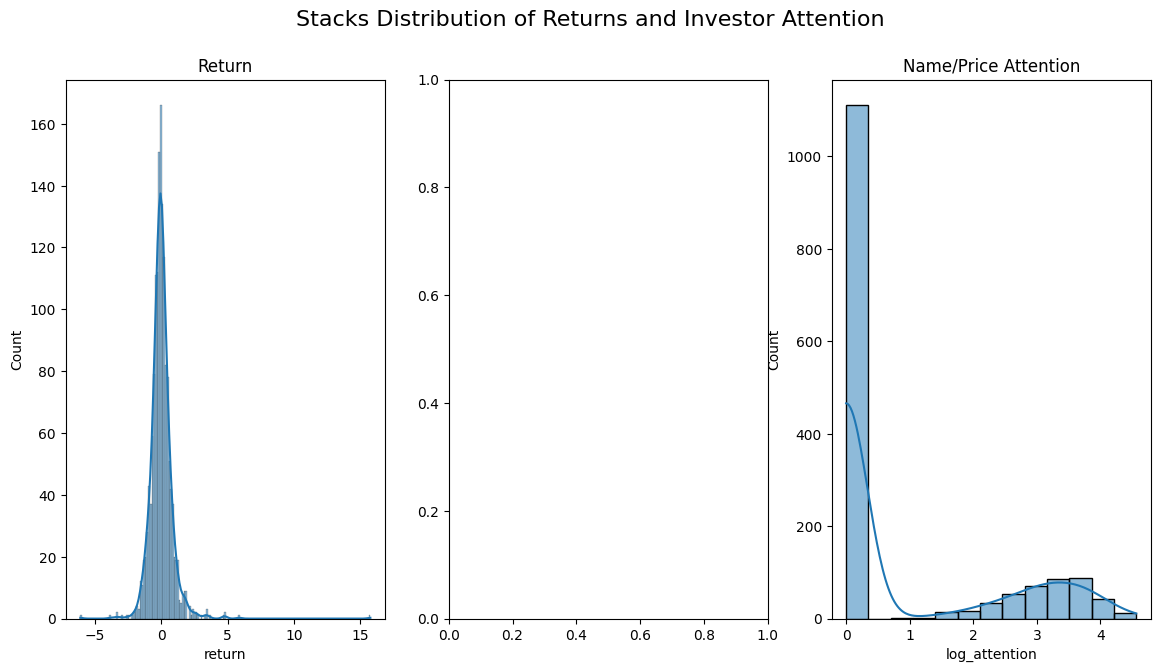

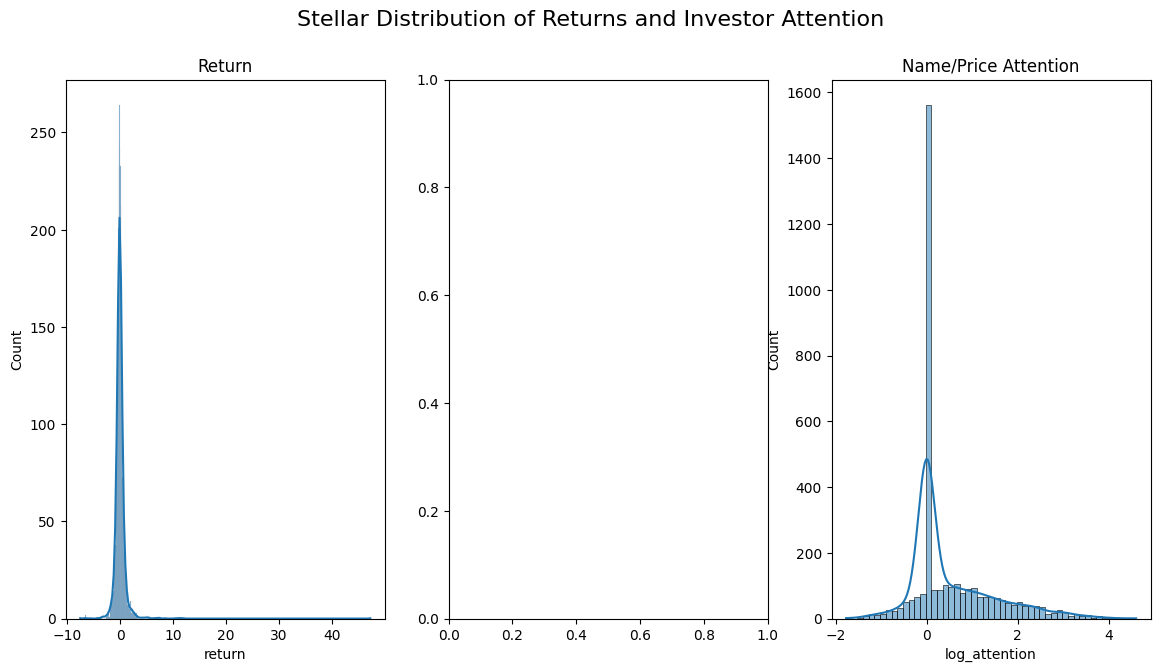

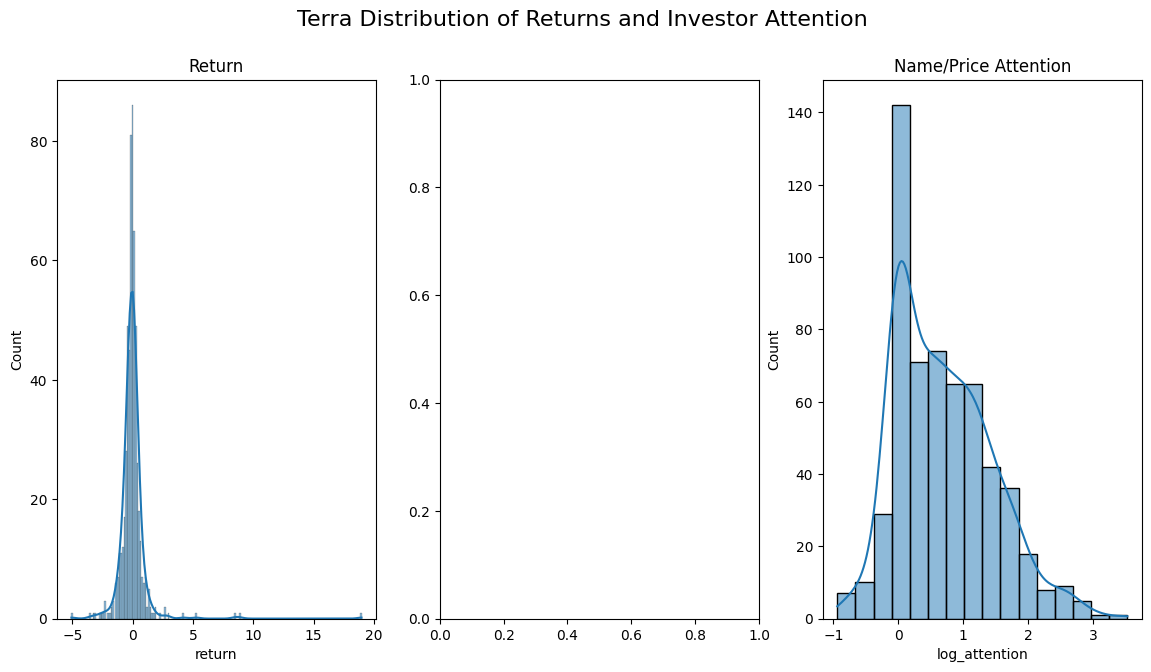

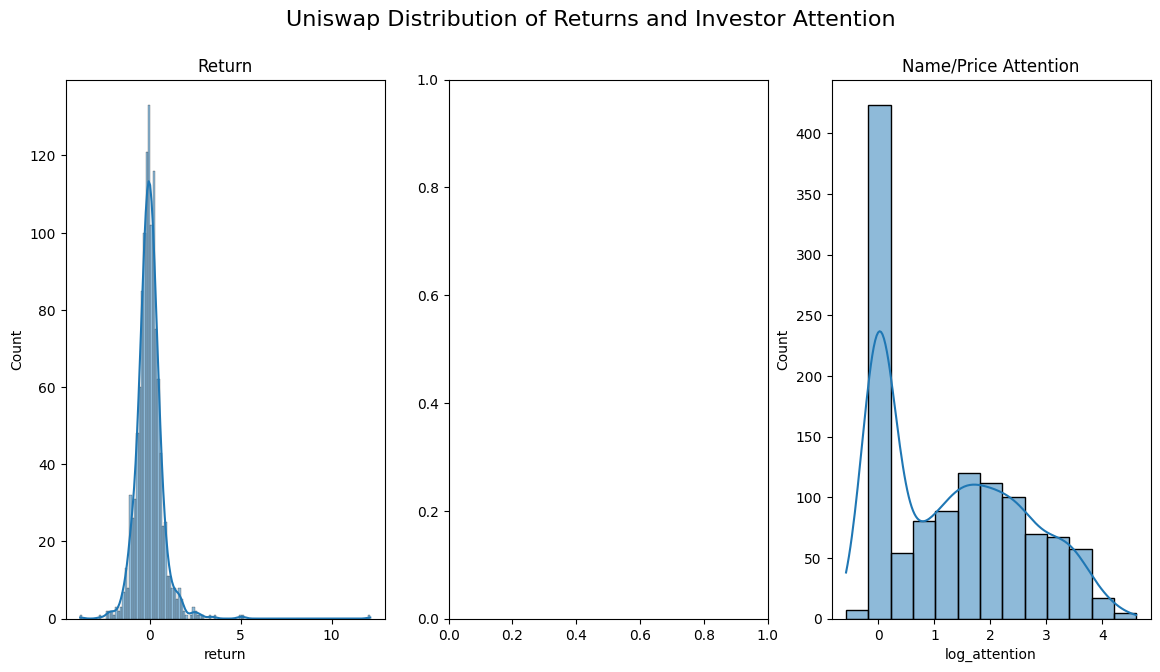

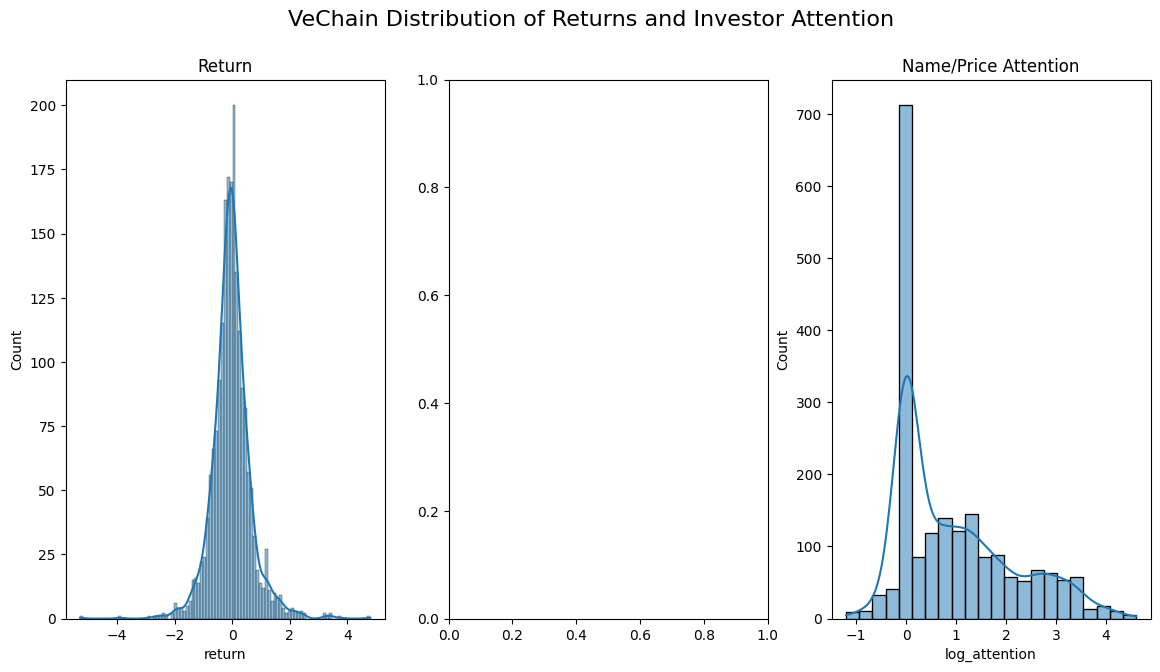

In [14]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, 3, figsize=(14, 7))
    fig.suptitle(f'{currency} Distribution of Returns and Investor Attention', fontsize=16)
    sns.histplot(stock_data['return'], kde=True, ax=ax[0])
    ax[0].set_title('Return')
    sns.histplot(stock_data['log_attention'], kde=True, ax=ax[2])
    ax[2].set_title('Name/Price Attention')
    plt.show()



### 3. Scatter plots with the Relationships 

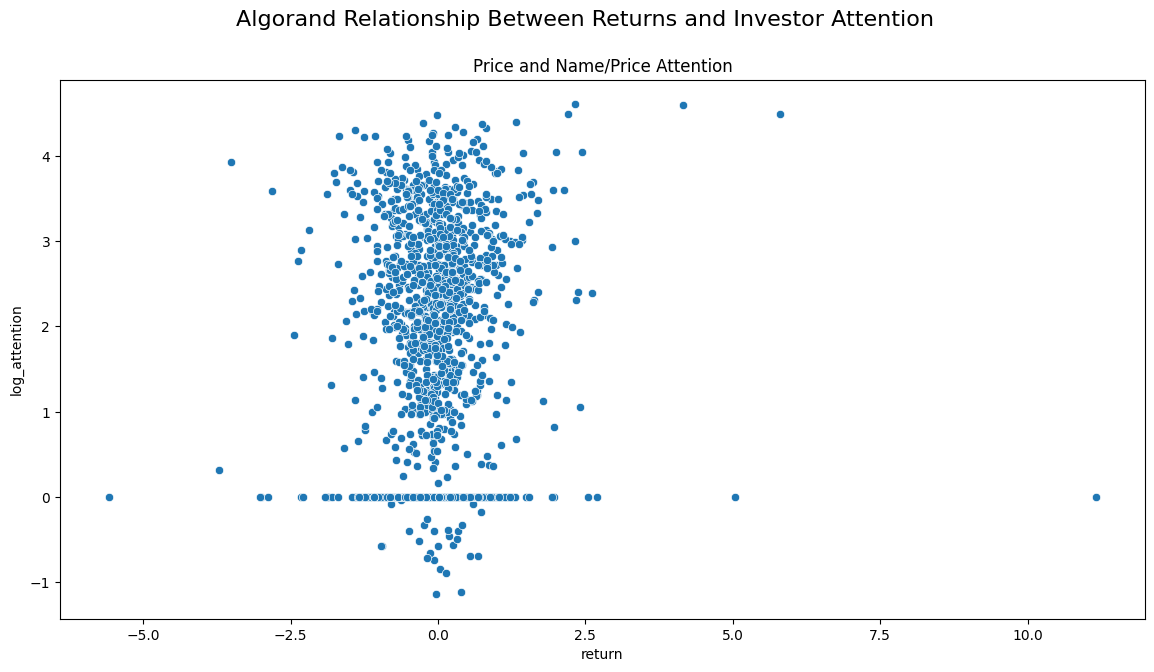

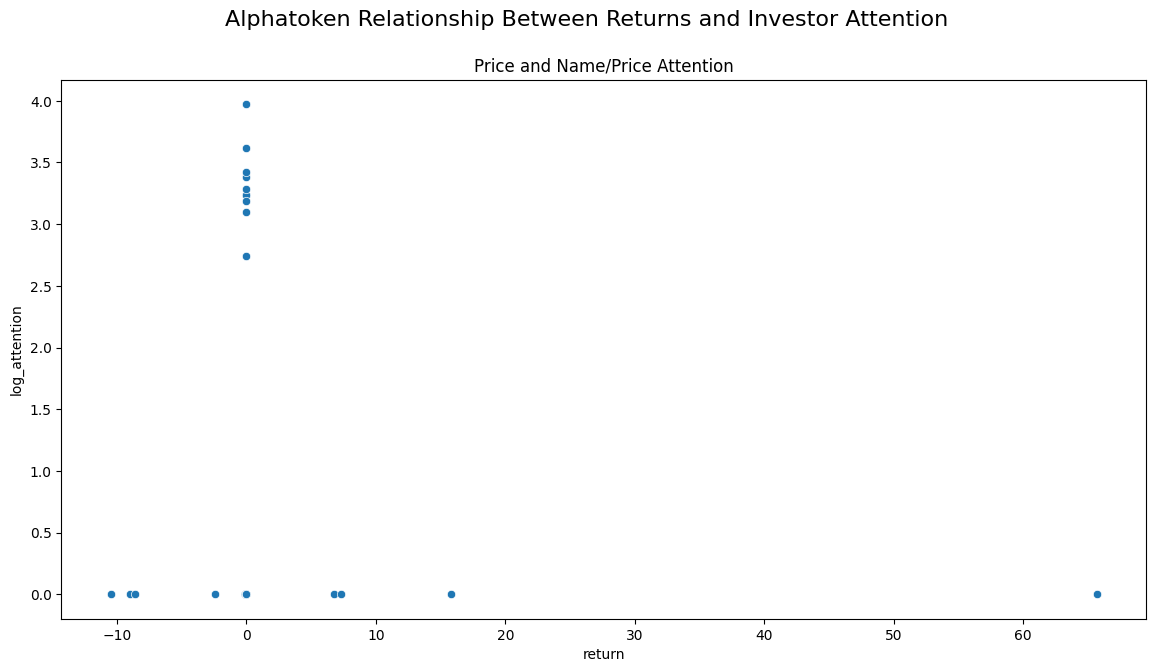

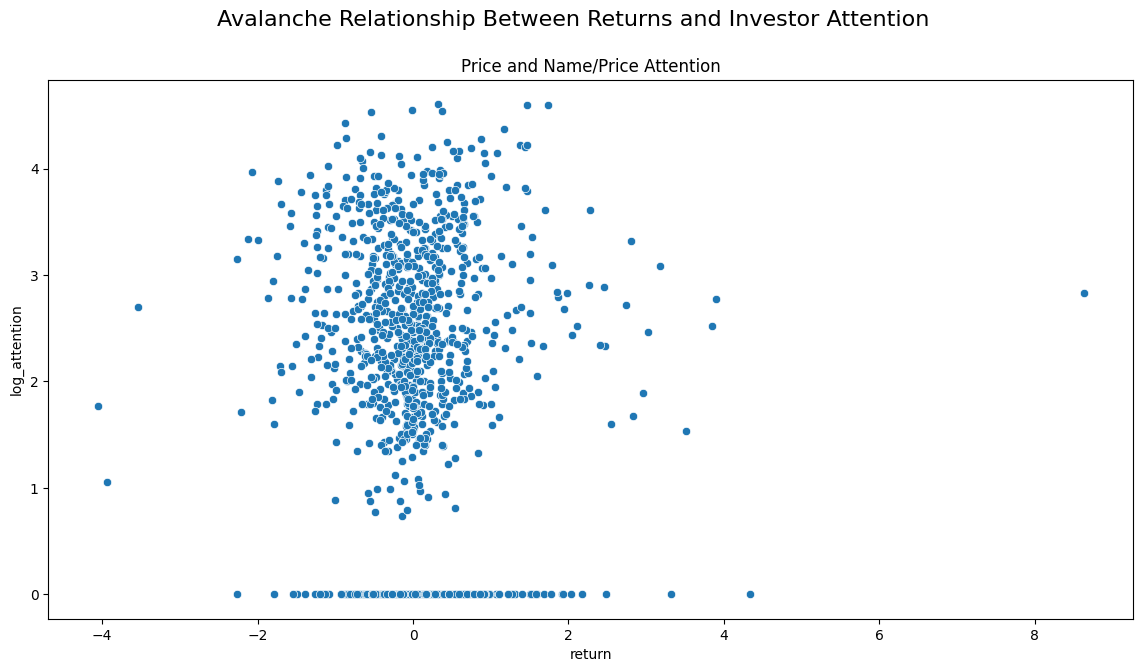

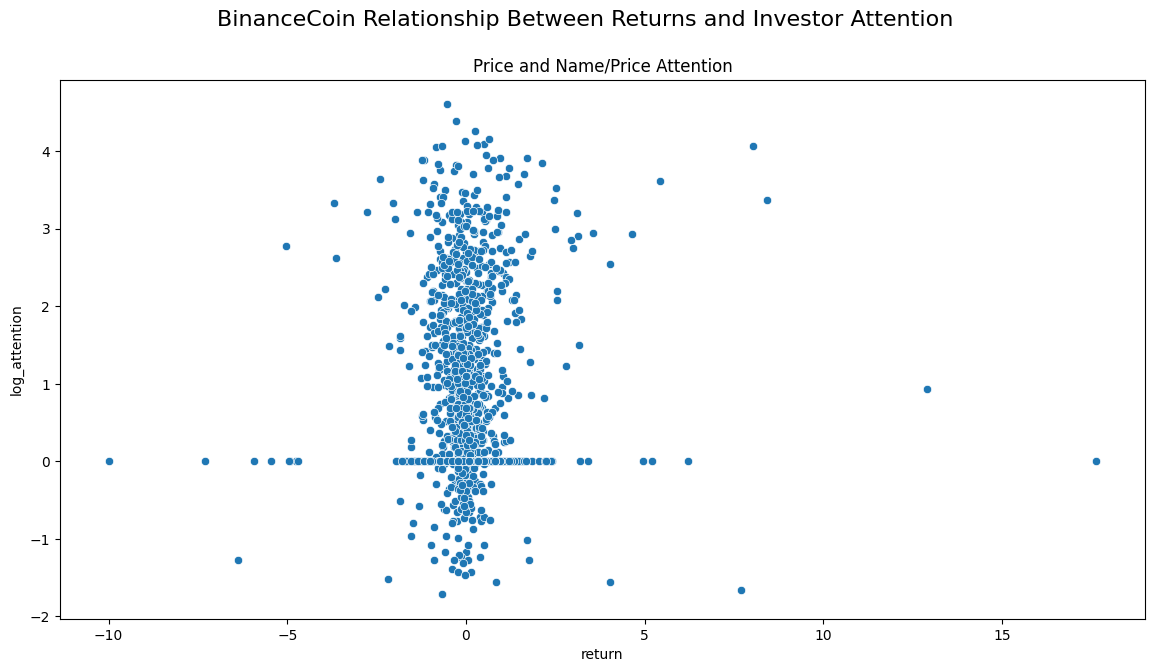

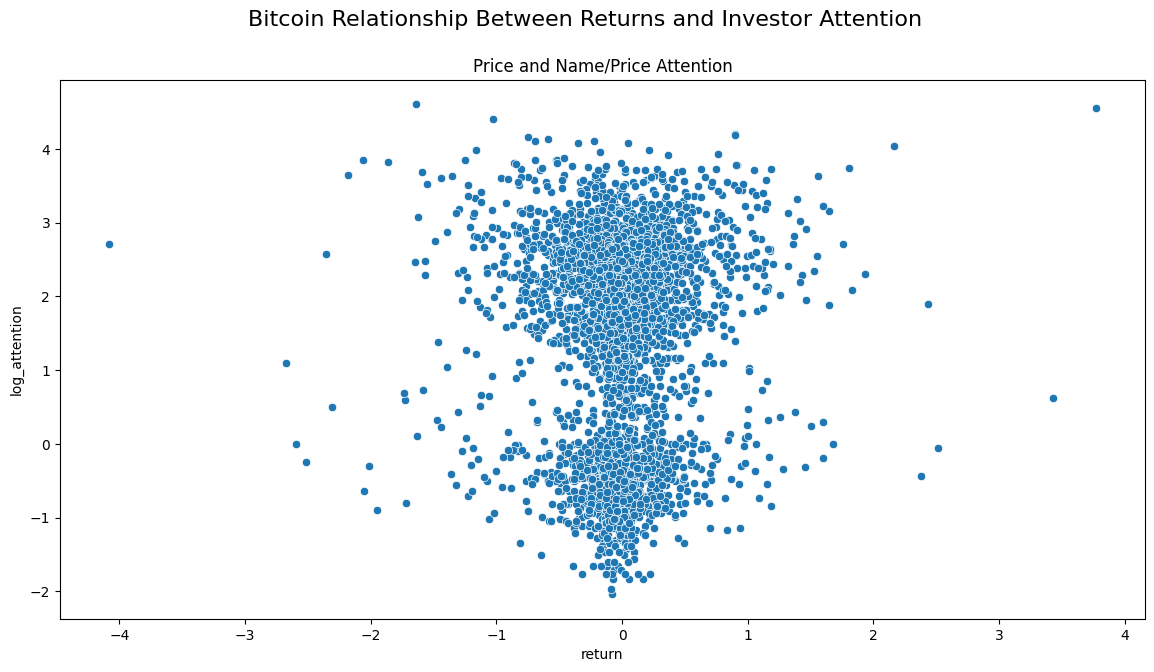

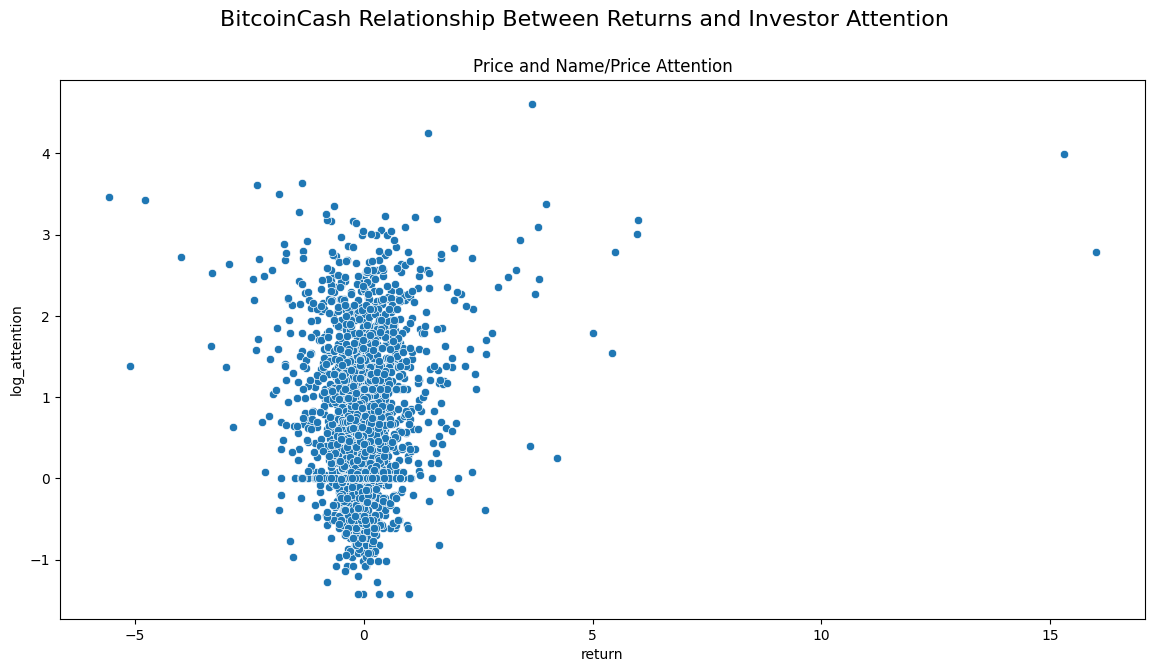

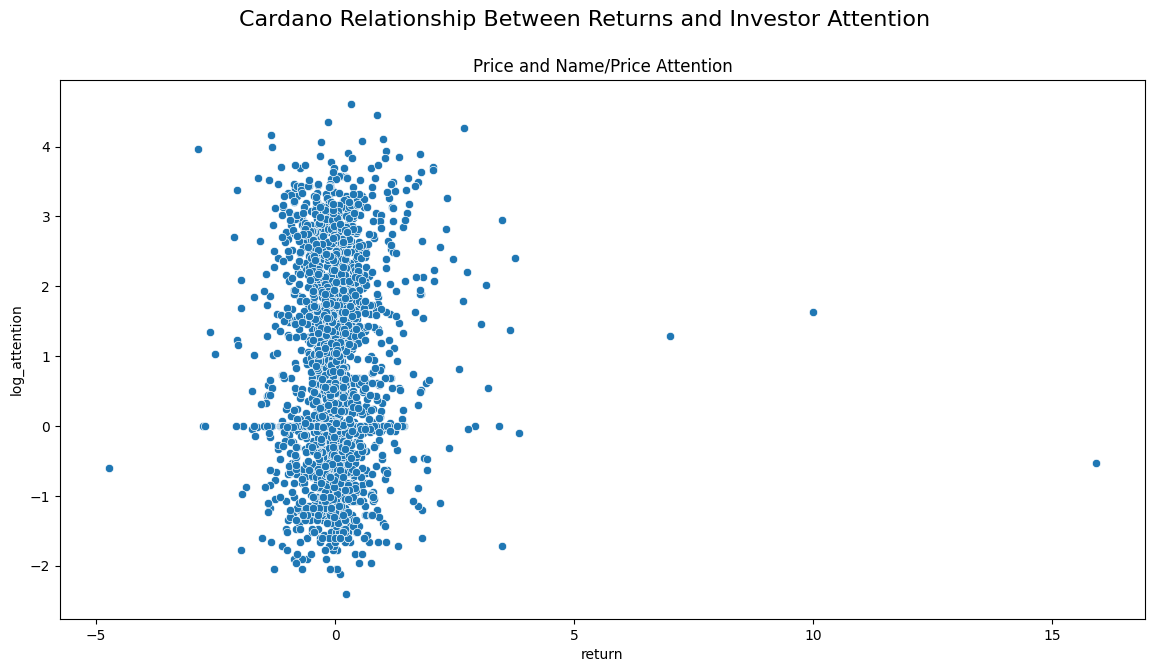

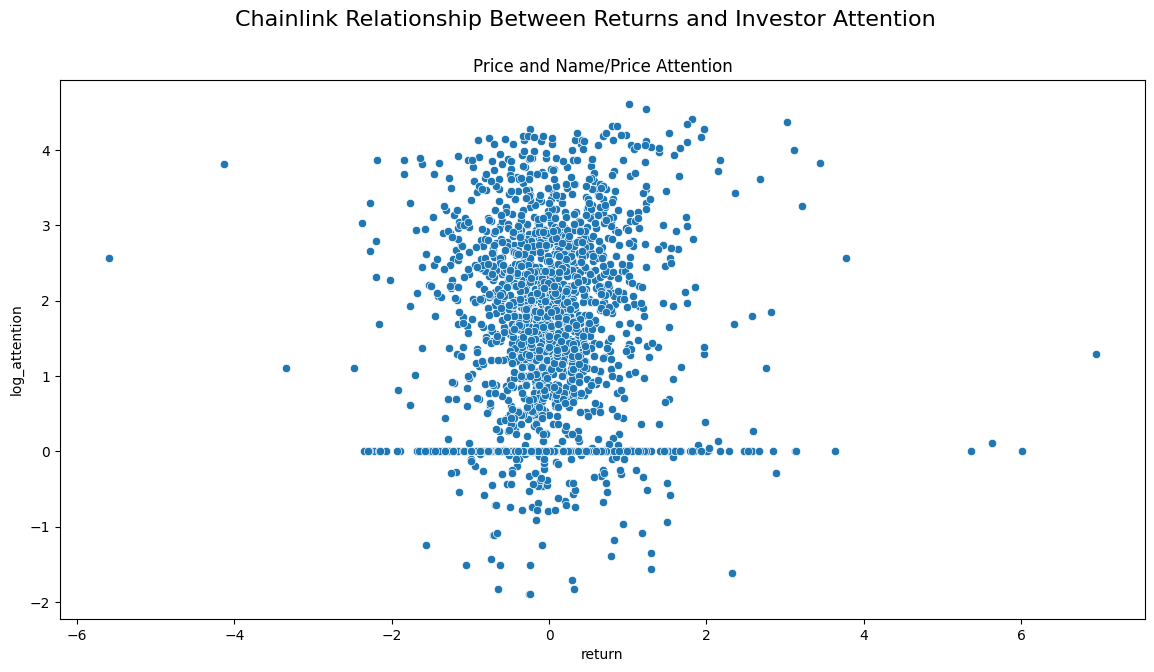

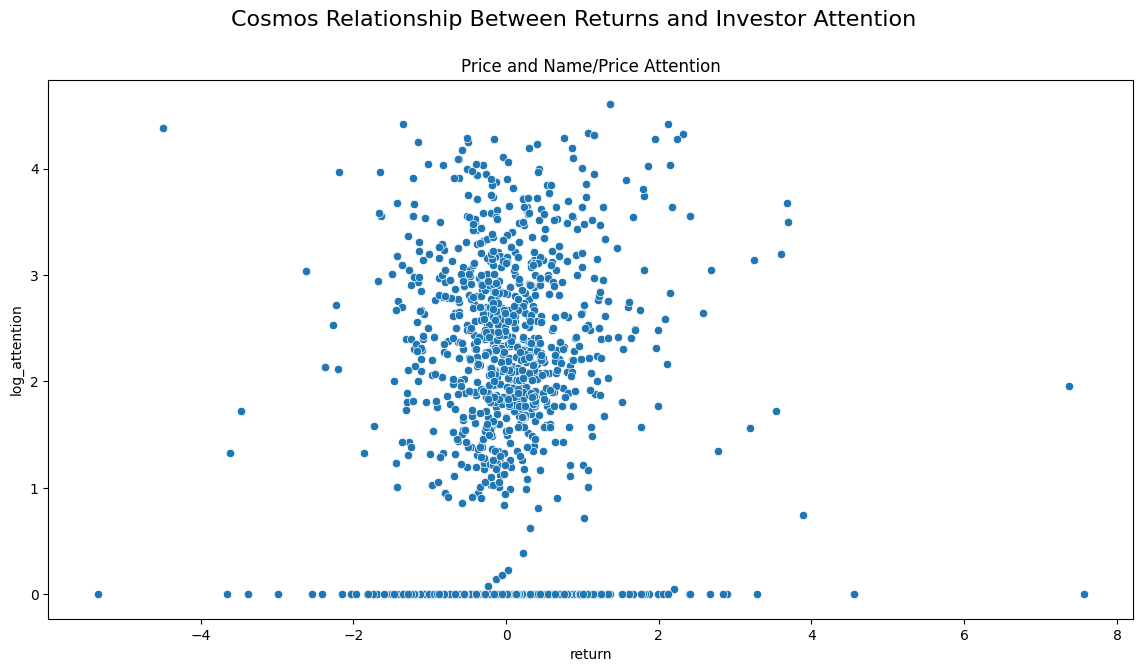

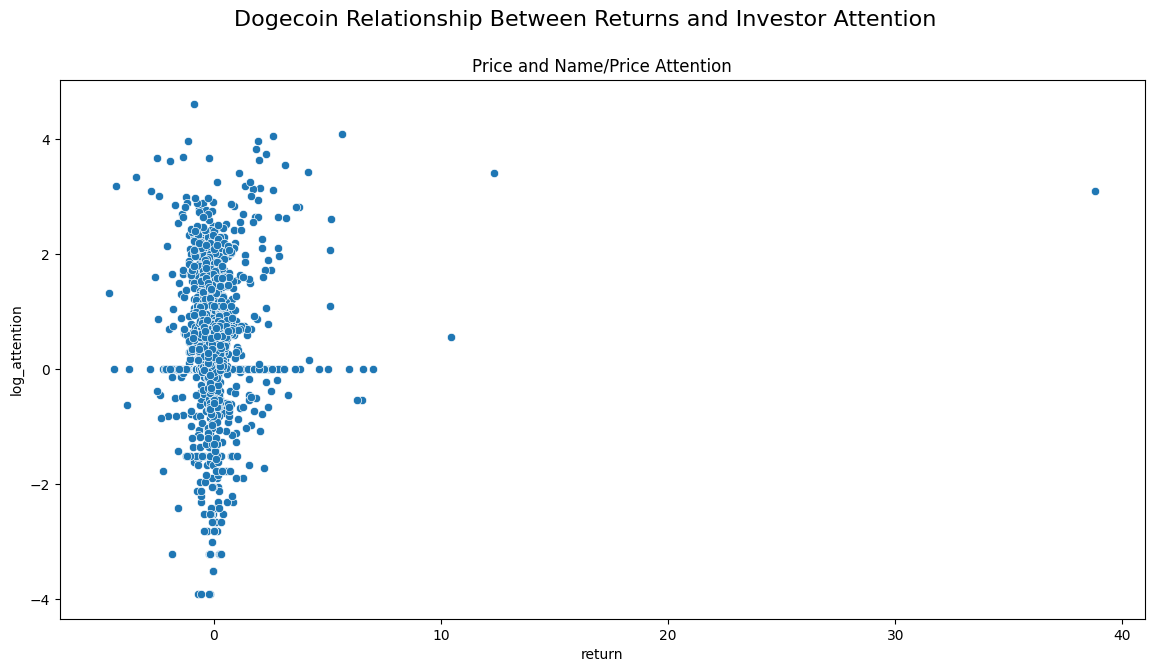

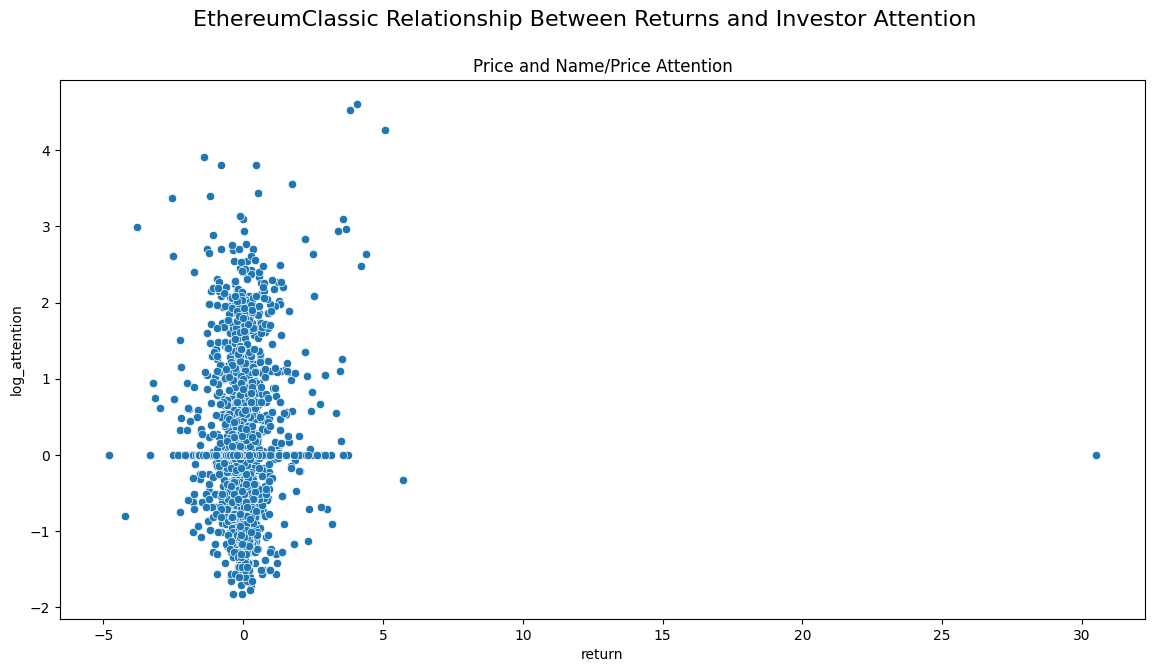

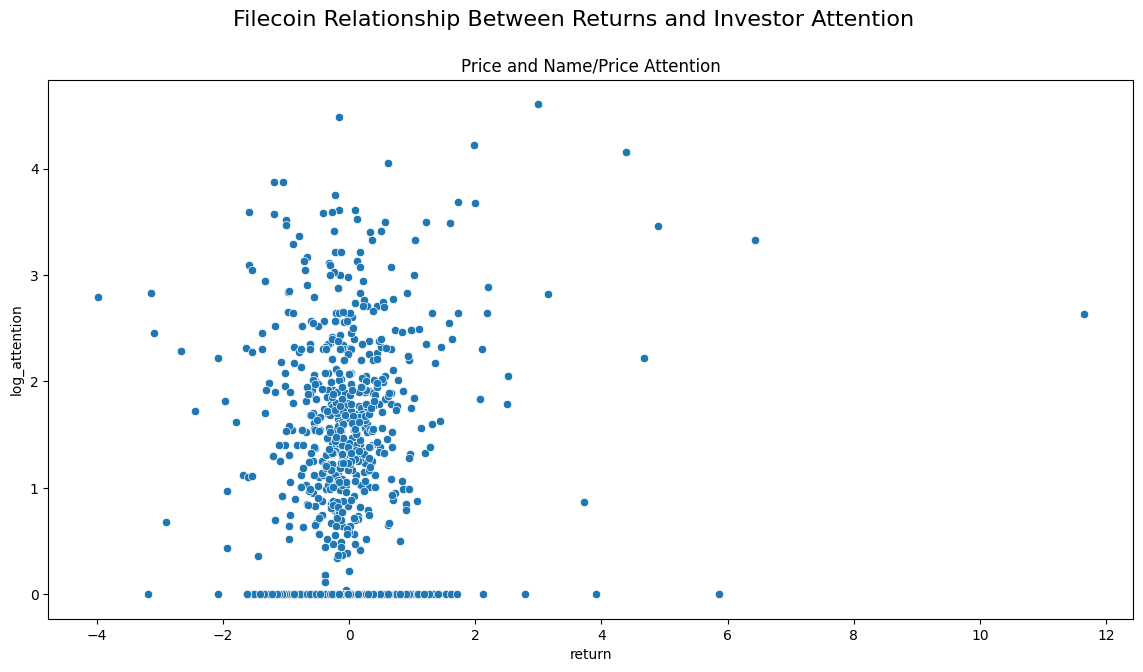

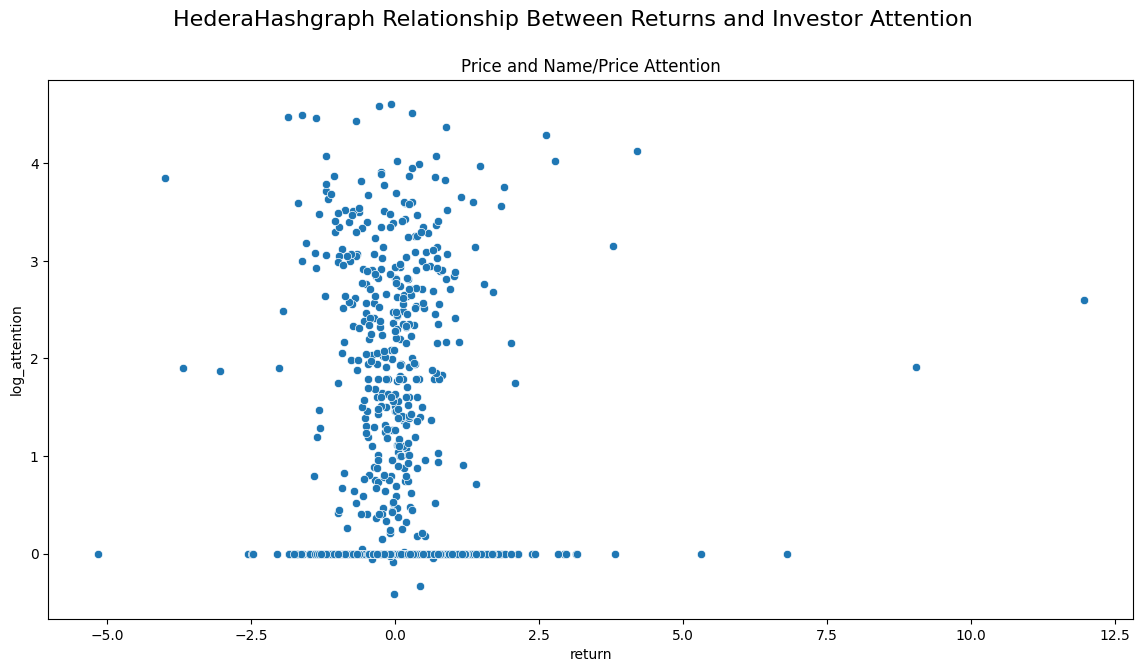

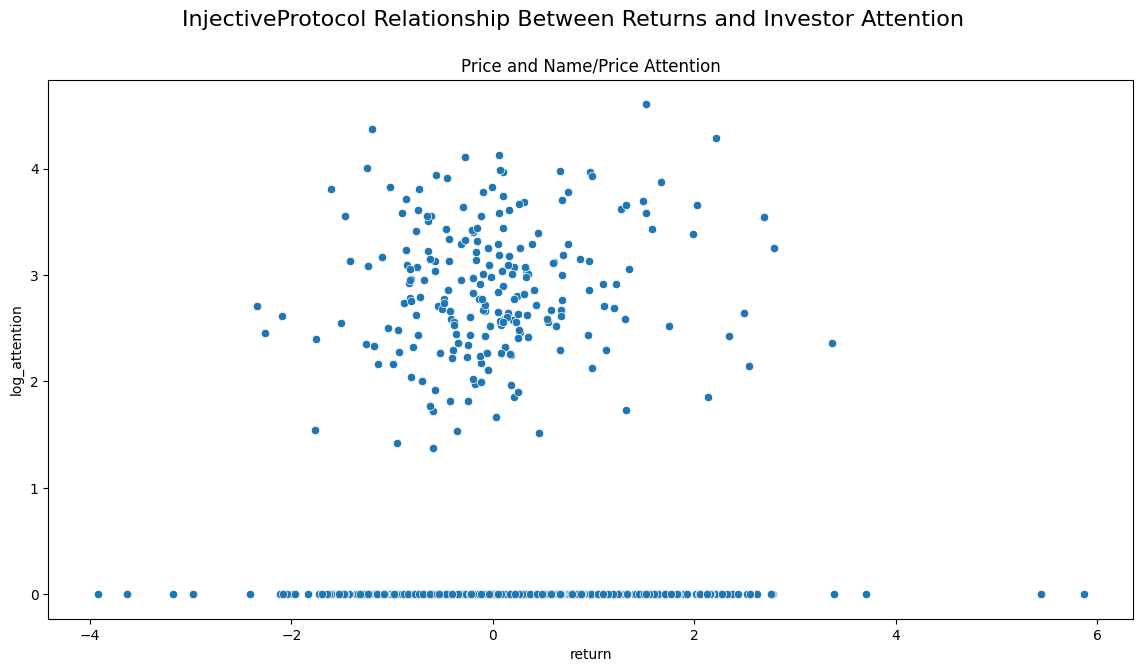

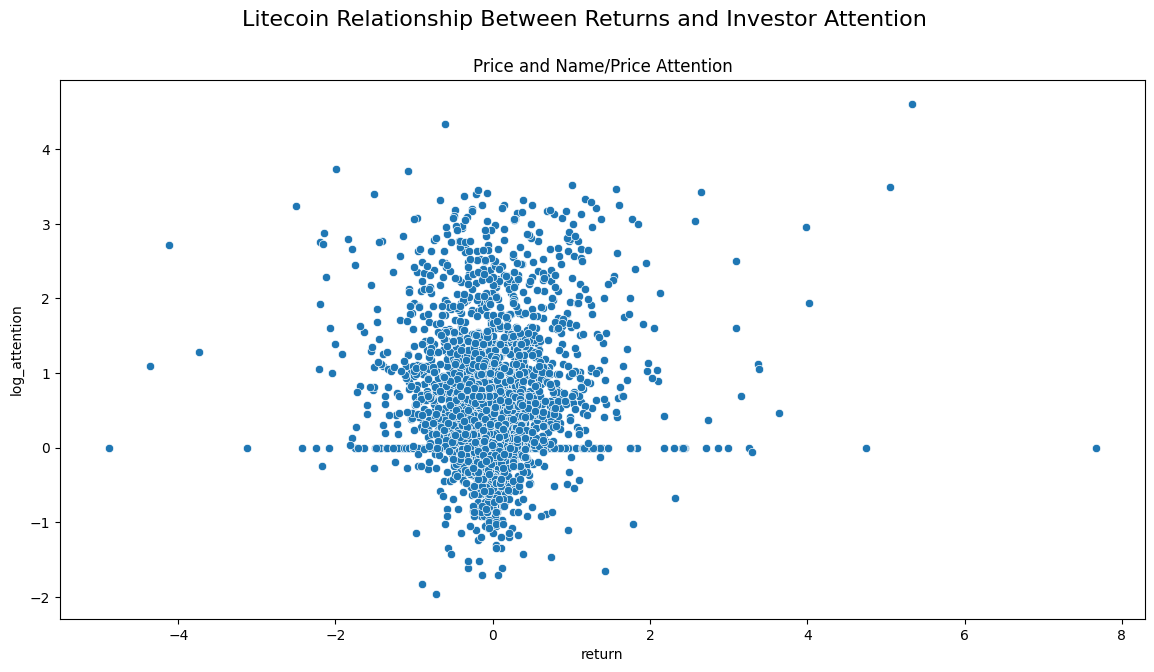

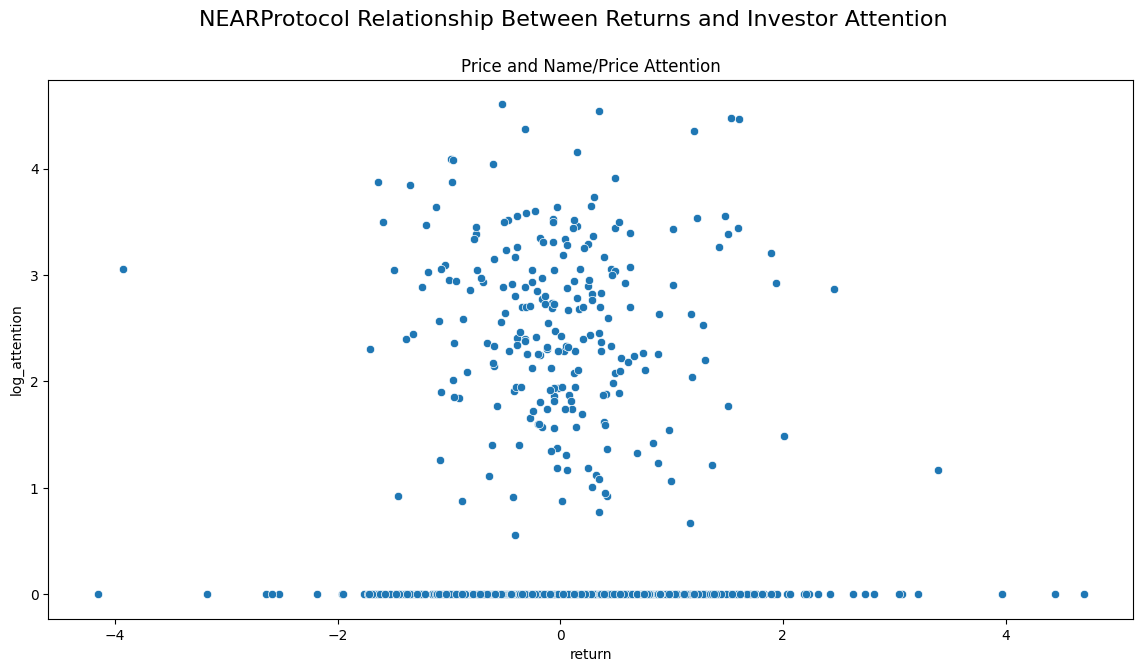

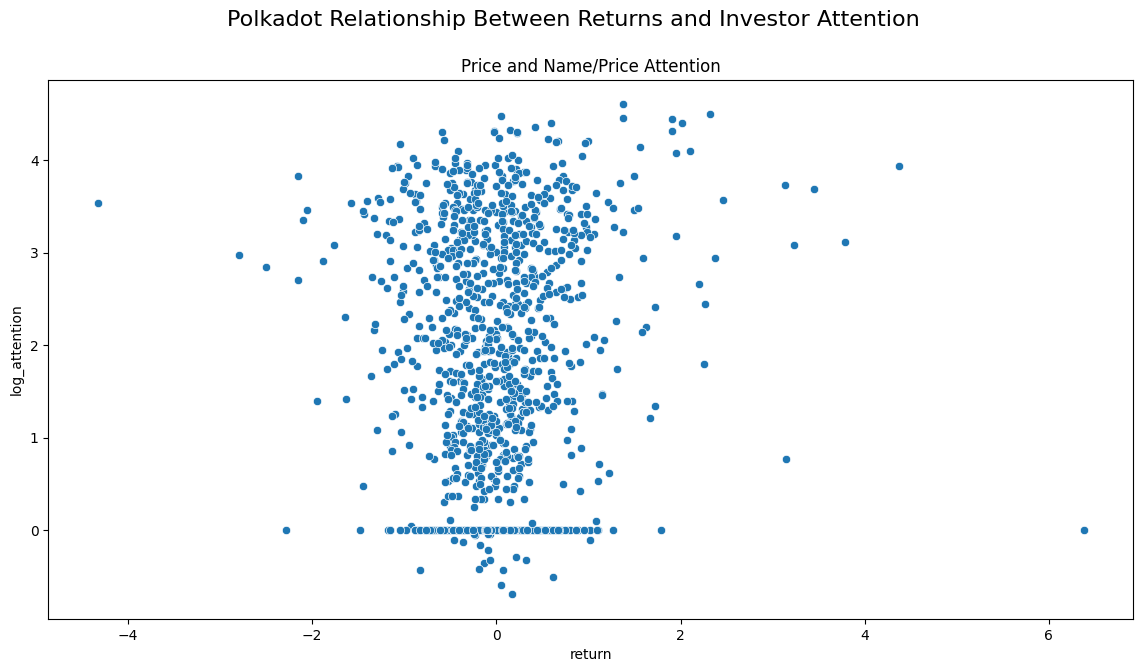

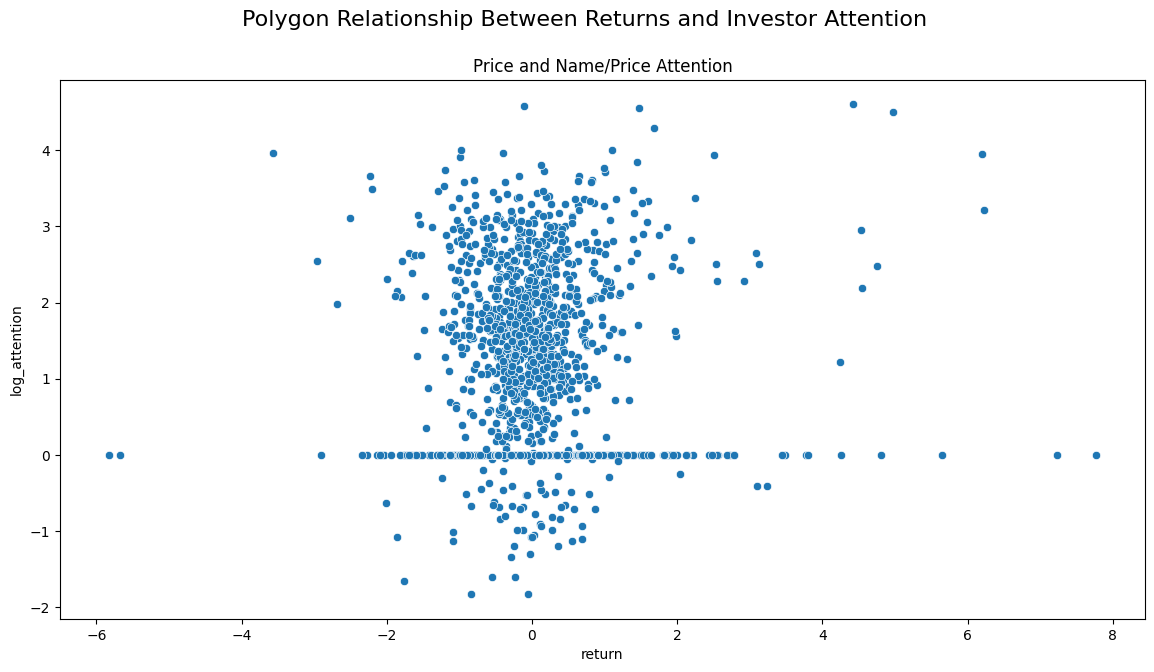

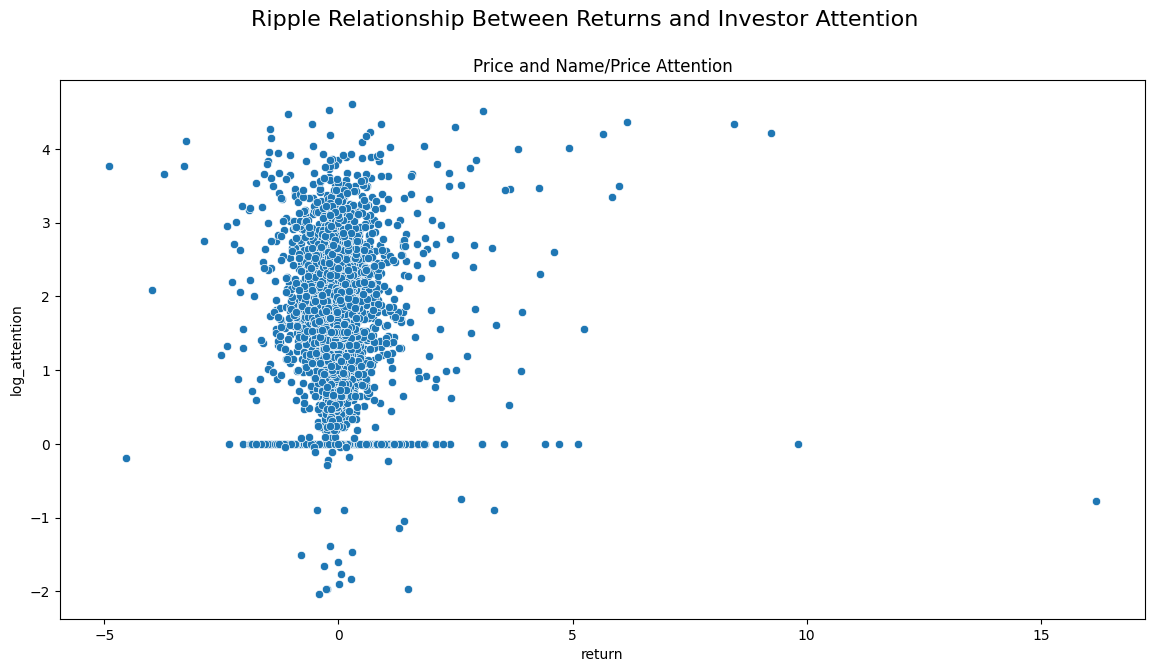

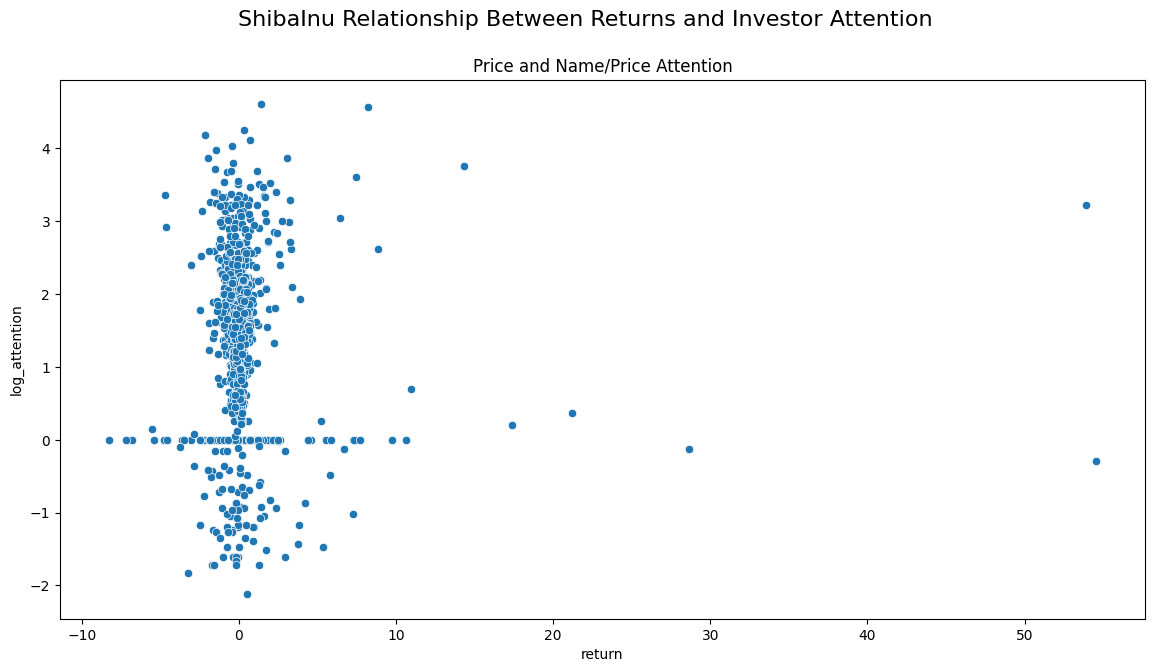

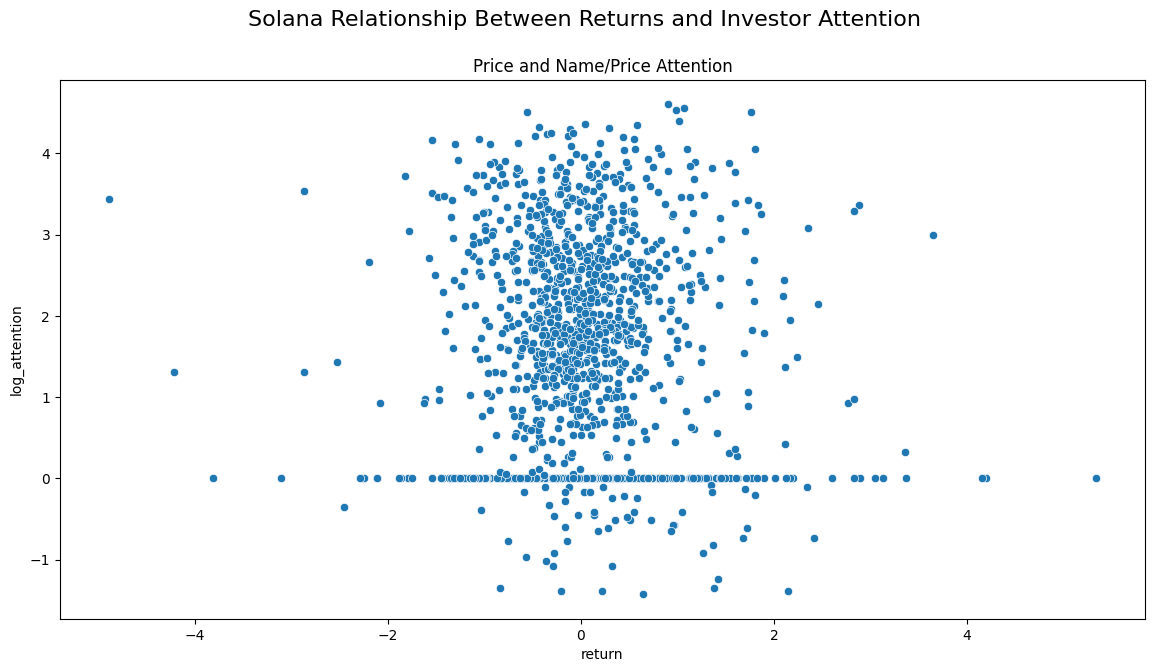

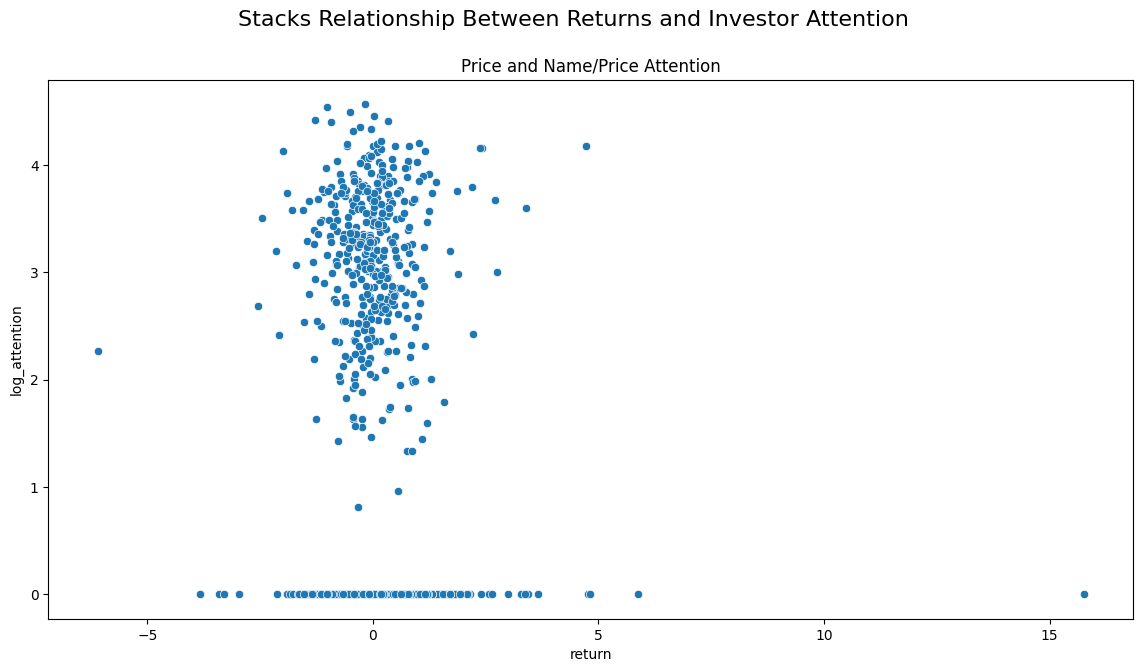

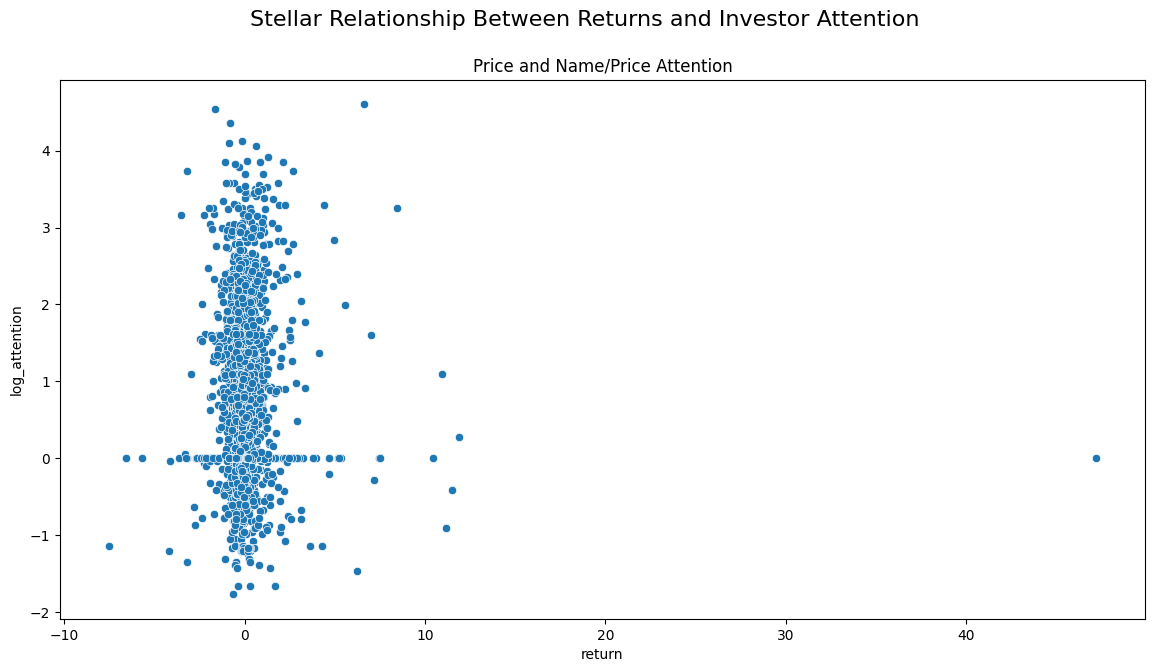

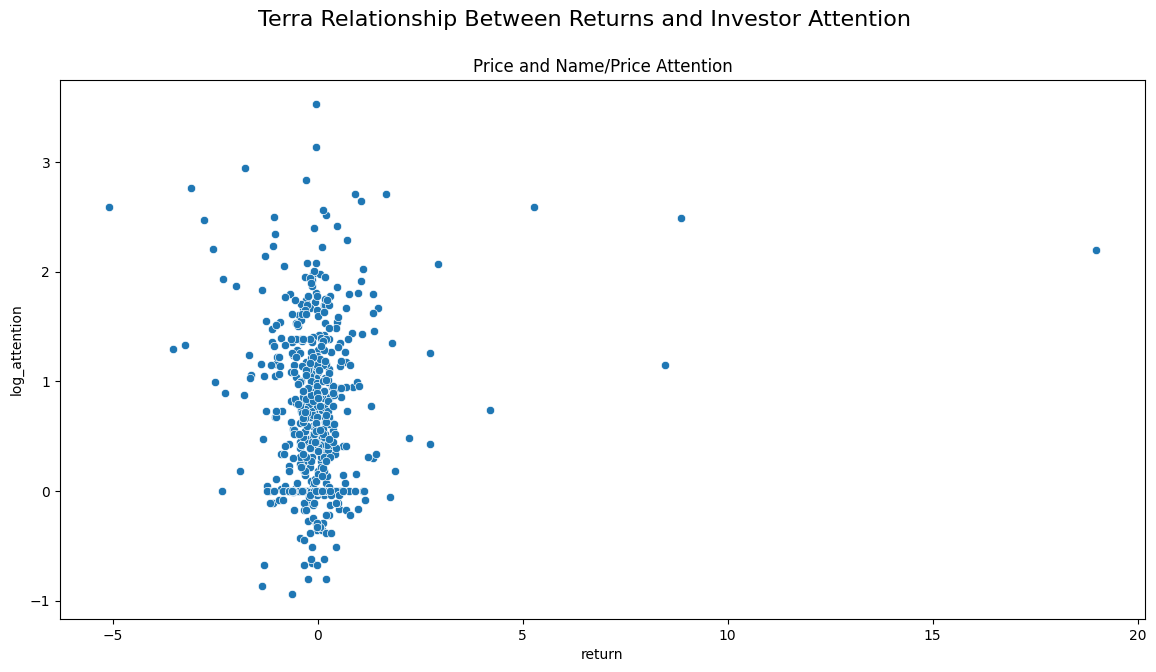

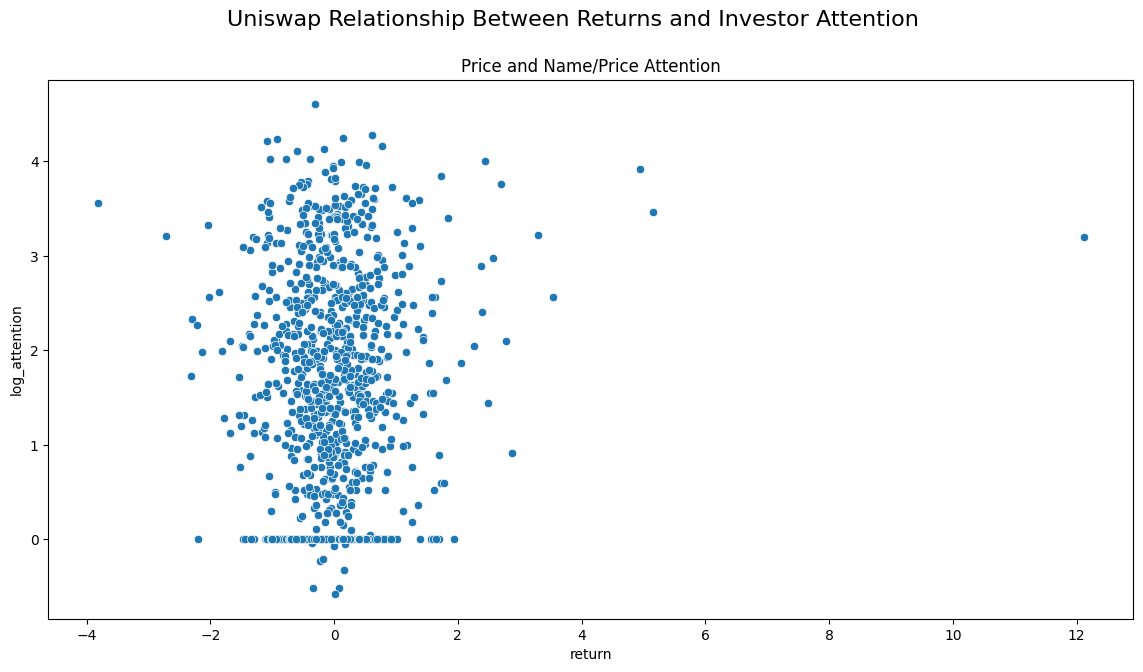

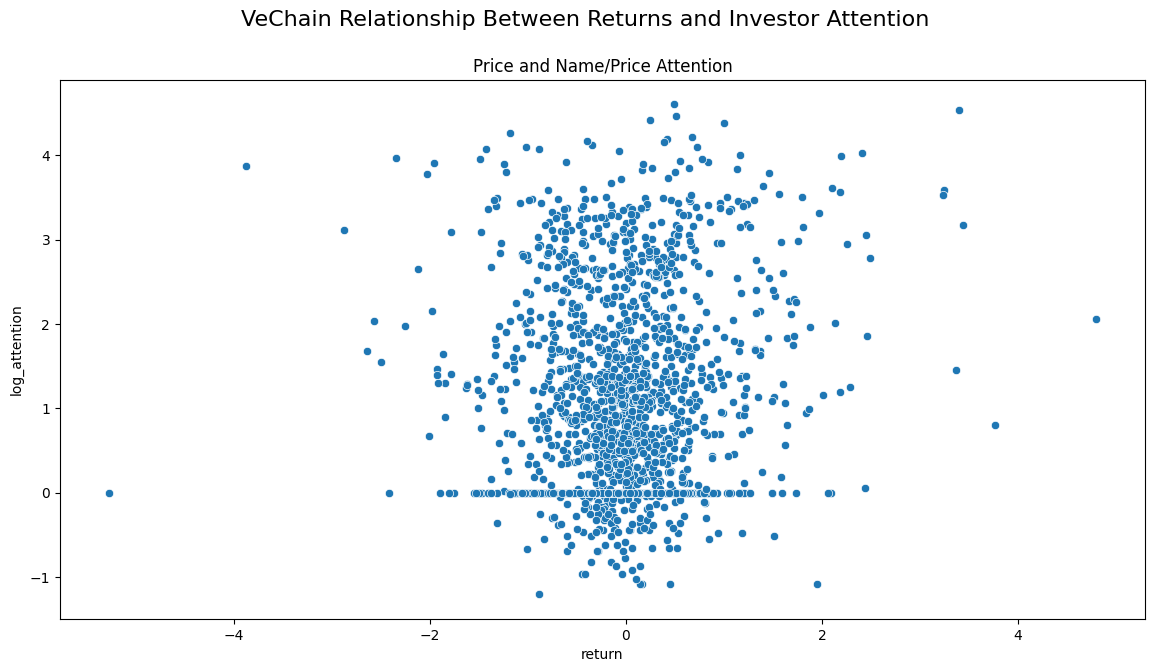

In [15]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, figsize=(14, 7))
    fig.suptitle(f'{currency} Relationship Between Returns and Investor Attention', fontsize=16)
    sns.scatterplot(x=stock_data['return'], y=stock_data['log_attention'], ax=ax)
    ax.set_title('Price and Name/Price Attention')
    plt.show()

In [28]:
data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.180101 -0.269505   -0.235414    Algorand   
1  2019-06-22 -0.179815 -0.240548   -0.234446    Algorand   
2  2019-06-23 -0.180000 -0.227594   -0.234680    Algorand   
3  2019-06-24 -0.180048 -0.235517   -0.234777    Algorand   
4  2019-06-25 -0.180137 -0.244048   -0.234885    Algorand   

   name_price_attention     return  crypto_dummy  log_attention  log_return  \
0             -0.364255  -0.045227             0       0.405465    0.000000   
1             -0.511961  11.153287             0       0.000000    4.581523   
2             -0.376071  -3.707394             0       0.322083    0.000000   
3             -0.511961  -1.423728             0       0.000000    0.000000   
4             -0.511961  -3.004727             0       0.000000    0.000000   

   Post-covid  
0           0  
1           0  
2           0  
3           0  
4           0

In [27]:
unscaled = pd.read_csv("final_crypto_data_unscaled.csv", index_col=0)
unscaled.head()
#numerical = ['price', 'volume', 'return', 'high', 'low', 'open', 'avg_price', 'mkt_cap', 'pct_return', 'daily_spread']


Date     Price        Volume    Market_cap crypto_name  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand   

   name_price_attention  return  crypto_dummy  log_attention  log_return  
0                  1.50   0.000             0       0.405465    0.000000  
1                  0.00  97.663             0       0.000000    4.581523  
2                  1.38 -31.938             0       0.322083    0.000000  
3                  0.00 -12.022             0       0.000000    0.000000  
4                  0.00 -25.810             0       0.000000    0.000000

In [29]:
unscaled = unscaled.drop(columns=['crypto_dummy', 'log_attention', 'log_return'])
unscaled.head()

Date     Price        Volume    Market_cap crypto_name  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand   

   name_price_attention  return  
0                  1.50   0.000  
1                  0.00  97.663  
2                  1.38 -31.938  
3                  0.00 -12.022  
4                  0.00 -25.810

In [30]:
order = ['Date', 'Price', 'Volume', 'Market_cap', 'crypto_name', 'return', 'name_price_attention']
unscaled = unscaled[order]
unscaled.head()

Date     Price        Volume    Market_cap crypto_name  return  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   0.000   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand  97.663   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand -31.938   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand -12.022   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand -25.810   

   name_price_attention  
0                  1.50  
1                  0.00  
2                  1.38  
3                  0.00  
4                  0.00

In [31]:
unscaled.describe()

Price        Volume    Market_cap        return  \
count  50427.000000  5.042700e+04  5.042700e+04  50427.000000   
mean    1022.535010  1.701812e+09  2.474961e+10      0.378412   
std     5564.872000  6.230277e+09  1.048135e+11      8.672981   
min        0.000000  0.000000e+00  0.000000e+00    -90.957000   
25%        0.110251  4.261000e+07  5.682119e+08     -2.516000   
50%        2.144879  1.943117e+08  3.116606e+09      0.000000   
75%       25.532743  7.773529e+08  8.775352e+09      2.521500   
max    67617.015545  1.788941e+11  1.278798e+12    573.435000   

       name_price_attention  
count          50427.000000  
mean               5.386968  
std               10.290581  
min                0.000000  
25%                0.000000  
50%                1.200000  
75%                5.940000  
max              100.000000